# ネットワークを表示する

- networkx: params are designated
- infomap

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from infomap import Infomap
from math import log, log2

In [8]:
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex

# identify colormap and N of separate
cmap = cm.get_cmap('viridis',4)
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    print(rgb2hex(rgb))

#440154
#31688e
#35b779
#fde725


In [9]:
# input: Edge list and community
def plot_community(E, community, figsize=(8,8), node_size=900, with_labels=True):
    
    plt.figure(figsize=figsize)

    G = nx.Graph()
    G.add_edges_from(E)

    N = G.number_of_nodes()
    NC = len(set(community))
    print(f'NC = {NC}')
    print(community)
    cmap = cm.get_cmap('gist_ncar',NC)
    # cmap = cm.get_cmap('tab20c')
    node_color = [rgb2hex(cmap(community[i])[:3]) for i in range(N)]
    # node_color = [cmap(community[i])[:3] for i in range(N)]

    params = {
        'pos' : nx.spring_layout(G),
#         'pos': nx.kamada_kawai_layout(G),
        'node_size' : node_size, #10^1->300, 10^3->30
        'alpha': 0.8,
        'width' : 0.5,
        'with_labels' : with_labels,
    #     'node_color' : ['red' if n in MAX_SCC else '#1f77b4' for n in G.nodes],
    #     'node_color': '#1E80F0',
        'node_color': node_color,
        'edge_color': '#aaaaaa',
    }

    nx.draw_networkx(G, **params)
    # show legend using null plot
    for i in range(NC):
        plt.plot([],[],color=cmap(i),label=i)
    plt.legend()
    plt.show()

## 3 nodes network

In [4]:
stoi = lambda x: int(x)
lst = ['0', '7']
list(map(stoi, lst))

[0, 7]

tau = 0, L = 1.500
NC = 1
[0, 0, 0]


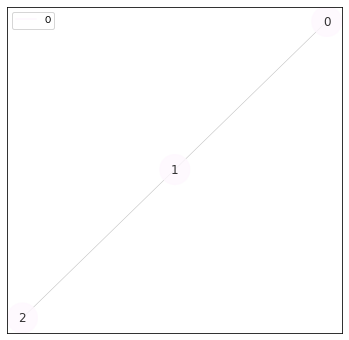

In [6]:
path = 'graphs/3.txt'
with open(path) as f:
    E = [s.strip().split(' ')[:2] for s in f.readlines()]
E_tup = [[int(e[0]), int(e[1])] for e in E]

# set init partition
tau = 0
seed = 1
im = Infomap(directed=False, two_level=True, teleportation_probability=tau, seed=seed)
im.add_nodes(range(3))
im.add_links(E_tup)
im.initial_partition = {i:0 for i in range(3)}
im.no_infomap = True
im.run()
print(f"tau = {tau}, L = {im.codelength:.3f}")

community = [0,0,0]
figsize=(6,6)
plot_community(E, community, figsize)

In [10]:
# set init partition
tau = 0.15
seed = 1
im = Infomap(directed=False, two_level=True, teleportation_probability=tau, seed=seed)
im.add_nodes(range(3))
im.add_links(E_tup)

partitions = [{0: 0, 1:1, 2:2},
              {0: 0, 1:1, 2:1},
              {0: 0, 1:0, 2:0}]

for partition in partitions:
    
    im.initial_partition = partition
    im.no_infomap = True
    im.run()
    # print(f"tau = {tau}")
    print(f"partition = {partition}")
    print(f"L = {im.codelength * log(2):.3f}")

    # community = [0,0,0]
    # figsize=(6,6)
    # plot_community(E, community, figsize)

partition = {0: 0, 1: 1, 2: 2}
L = 2.426
partition = {0: 0, 1: 1, 2: 1}
L = 1.733
partition = {0: 0, 1: 0, 2: 0}
L = 1.040


## 4 nodes network

NC = 2
[0, 1, 1, 1]


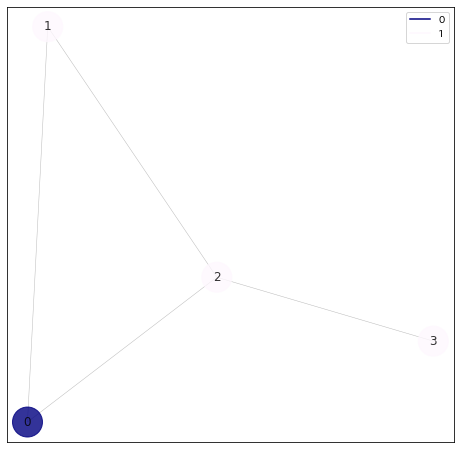

In [10]:
path = 'graphs/4.txt'
with open(path) as f:
    E = [s.strip().split(' ')[:2] for s in f.readlines()]

community = [0,1,1,1]

figsize=(6,6)
plot_community(E, community)

In [16]:
def plogp(x):
    return x * log(x)

plogp(0.25)

-0.34657359027997264

In [13]:
# codelength
tau = 0.15
seed = 1
im = Infomap(directed=False, two_level=True, teleportation_probability=tau, seed=seed)
im.add_nodes(range(4))
im.add_links(((0,1),(0,2),(1,2),(2,3)))

partitions = [{0: 0, 1:1, 2:2, 3:3},
              {0: 0, 1:1, 2:2, 3:2},
              {0: 0, 1:0, 2:0, 3:1},
              {0: 0, 1:0, 2:0, 3:0}]

for partition in partitions:
    
    im.initial_partition = partition
    im.no_infomap = True
    im.run()
    # print(f"tau = {tau}")
    print(f"partition = {partition}")
    print(f"L = {im.codelength:.3f}")

partition = {0: 0, 1: 1, 2: 2, 3: 3}
L = 3.906
partition = {0: 0, 1: 1, 2: 2, 3: 2}
L = 3.283
partition = {0: 0, 1: 0, 2: 0, 3: 1}
L = 2.406
partition = {0: 0, 1: 0, 2: 0, 3: 0}
L = 1.906


In [6]:
# codelength
tau = 0.15
seed = 1
im = Infomap(directed=False, two_level=True, teleportation_probability=tau, seed=seed)
im.add_nodes(range(4))
im.add_links(((0,1),(0,2),(1,2),(2,3)))
im.run()
print(list(im.get_modules().values()), end=',\t')
print(f'L={im.codelength:.3f}')

# tau=0, [1, 1, 1, 1] => L=1.906
# tau=0.15, [1, 1, 1, 1] => L=1.906

[1, 1, 1, 1],	L=1.906


## 16 nodes network

In [41]:
# generation
for i in range(16):
    base = 4 * (i // 4)
    if (i-base < 3):
        print(i, i+1)
    else:
        print(i, base)
print(3, 5)
print(6, 12)
print(15, 11)
print(8, 3)

0 1
1 2
2 3
3 0
4 5
5 6
6 7
7 4
8 9
9 10
10 11
11 8
12 13
13 14
14 15
15 12
3 5
6 12
15 11
8 3


NC = 4
[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]


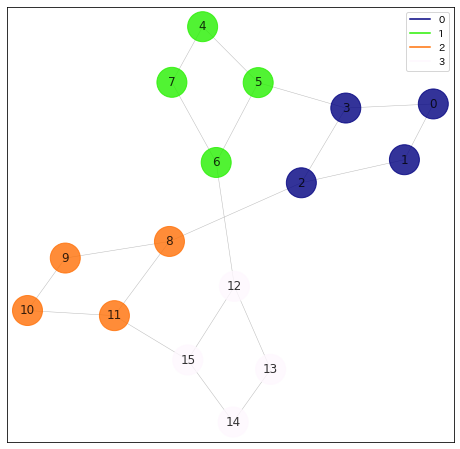

In [46]:
path = 'graphs/16.txt'
with open(path) as f:
    E = [s.strip().split(' ')[:2] for s in f.readlines()]
E_tup = [[int(e[0]), int(e[1])] for e in E]

community = [i//4 for i in range(16)]

figsize=(6,6)
plot_community(E, community)

In [56]:
# set init partition
N = 16
tau = 0
im = Infomap(directed=True, two_level=True, teleportation_probability=tau, seed=seed)
im.add_nodes(range(N))
im.add_links(E_tup)
im.initial_partition = {i:i//4 for i in range(N)}
im.no_infomap = True
im.run()
print(f"tau = {tau}, L = {im.codelength:.3f}")

tau = 0, L = 2.903


## 27 nodes network

In [82]:
path = 'graphs/27.txt'
with open(path) as f:
    E = [s.strip().split(' ')[:2] for s in f.readlines()]
    
E_tup = [[int(e[0]), int(e[1])] for e in E]

community = [0,0,0,1,1,1,0,0,0,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7]
community = [0,0,0,1,1,1,2,2,2,4,4,4,3,3,3,4,4,4,5,5,5,5,5,5,6,6,6]
figsize=(8,8)
# plot_community(E, community, figsize)

# set init partition
tau = 0.15
im = Infomap(directed=False, two_level=True, teleportation_probability=tau, seed=seed)
im.add_nodes(range(27))
im.add_links(E_tup)
im.initial_partition = {i:i//3 for i in range(27)}
im.no_infomap = True
im.run()
print(f"tau = {tau}, L = {im.codelength:.3f}")

tau = 0.15, L = 3.572


## USAir97

NC = 27
[0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 4, 3, 1, 3, 3, 1, 4, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 14, 9, 5, 5, 5, 5, 5, 9, 5, 5, 7, 9, 5, 5, 1, 11, 9, 7, 10, 7, 11, 7, 9, 9, 5, 5, 5, 8, 5, 5, 10, 10, 6, 5, 5, 5, 8, 14, 5, 12, 5, 5, 22, 5, 11, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 11, 5, 5, 5, 5, 5, 5, 11, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 8, 5, 5, 5, 5, 14, 16, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 21, 5, 13, 5, 5, 5, 13, 5, 5, 14, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 15, 17, 17, 5, 5, 5, 5, 5, 5, 5, 16, 5, 5, 5, 5, 5, 5, 5, 17, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 18, 5, 5, 5, 5, 22, 5, 5, 5, 5, 5, 5, 18, 5, 5, 5, 5, 5, 5, 5, 5, 14, 5, 5, 5, 5, 5, 5, 5, 22, 5, 5, 5, 5, 14, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 22, 22, 5, 5, 5, 5, 22, 5, 5, 5, 5, 5, 5, 19, 5, 5, 22, 5, 5, 12, 5, 20, 5, 5, 5, 24, 24, 22, 5, 23, 5, 5, 5, 5, 20, 5, 5, 5, 5, 5, 24, 22, 5, 5, 5, 5, 5, 19, 5, 22, 22, 5, 5, 22, 5, 5, 5, 15, 5, 5, 5, 5, 22, 22, 5, 5, 5, 5, 5, 5, 5, 5, 5, 25

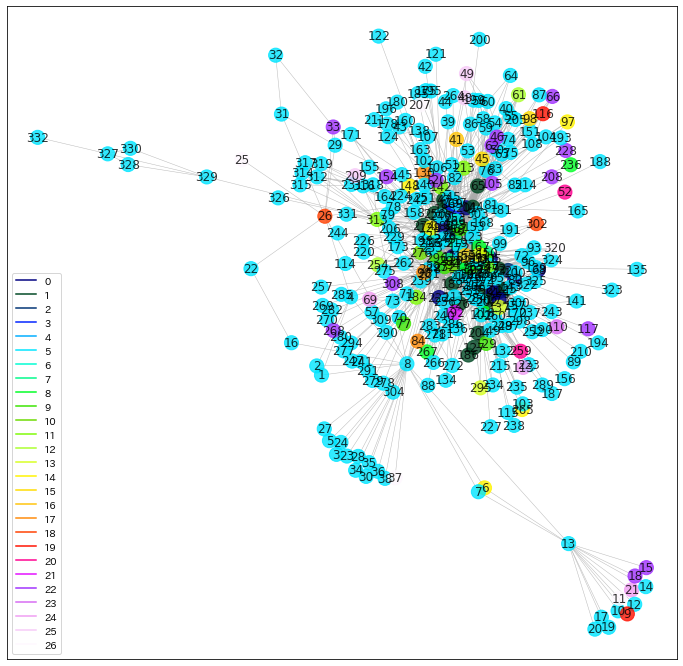

In [9]:
path = 'graphs/USAir97_edges.txt'
with open(path) as f:
    E = [s.strip().split(' ')[:2] for s in f.readlines()]

community = [0,0,1,0,1,1,1,1,2,2,2,2,1,1,1,3,1,1,1,1,1,3,1,1,0,0,1,1,5,1,0,4,4,1,1,1,1,1,16,1,1,5,1,1,1,1,5,1,7,1,5,1,17,9,1,7,6,9,9,7,1,1,1,1,1,8,1,5,6,6,6,5,5,8,8,16,5,11,11,25,5,17,9,1,5,5,8,11,24,5,5,5,15,5,5,5,9,16,5,15,25,5,5,9,27,17,10,5,5,5,6,1,24,11,5,8,5,5,5,5,16,12,5,5,5,5,15,5,25,5,5,37,5,14,15,1,15,28,15,17,5,16,5,5,22,5,5,22,1,5,8,5,19,21,21,5,1,5,5,13,5,18,12,5,5,5,5,5,5,1,21,5,5,5,22,25,5,31,5,26,5,5,5,5,29,5,5,5,5,35,5,5,31,5,30,27,5,5,5,33,5,5,5,5,5,25,30,38,25,5,32,5,5,36,5,16,5,5,5,5,5,5,37,5,16,5,35,5,5,5,5,5,5,35,34,5,18,5,25,5,5,5,18,36,5,1,39,5,18,11,5,5,5,44,5,5,5,5,18,18,5,5,5,5,37,40,42,39,41,5,25,40,5,5,5,5,5,5,5,5,42,43,5,5,5,5,20,5,37,5,5,18,5,5,5,5,5,19,5,19,5,23,5,45,5,5,5,5,5,5,20,5,5,46,46,5,46,5,5,5,5,20,47,20,5,5,48,48,48,48,5,48]
community = [0,0,1,0,1,1,1,1,2,2,2,2,1,1,1,4,3,1,3,3,1,4,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,14,9,5,5,5,5,5,9,5,5,7,9,5,5,1,11,9,7,10,7,11,7,9,9,5,5,5,8,5,5,10,10,6,5,5,5,8,14,5,12,5,5,22,5,11,5,5,5,8,5,5,5,5,5,5,5,5,5,11,5,5,5,5,5,5,11,5,5,5,5,5,5,6,5,5,5,5,8,5,5,5,5,14,16,5,5,5,5,5,5,5,5,5,5,21,5,13,5,5,5,13,5,5,14,5,5,5,5,5,5,5,5,8,5,15,17,17,5,5,5,5,5,5,5,16,5,5,5,5,5,5,5,17,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,18,5,5,5,5,22,5,5,5,5,5,5,18,5,5,5,5,5,5,5,5,14,5,5,5,5,5,5,5,22,5,5,5,5,14,5,5,5,5,5,5,5,5,5,5,5,22,22,5,5,5,5,22,5,5,5,5,5,5,19,5,5,22,5,5,12,5,20,5,5,5,24,24,22,5,23,5,5,5,5,20,5,5,5,5,5,24,22,5,5,5,5,5,19,5,22,22,5,5,22,5,5,5,15,5,5,5,5,22,22,5,5,5,5,5,5,5,5,5,25,25,5,25,5,5,5,5,5,5,5,5,5,26,26,26,26,5,26]
figsize=(12,12)
node_size = 200
with_labels = True
plot_community(E, community, figsize, node_size, with_labels)

Text(0.5, 1.0, 'USAir97 community detected by my inplementation')

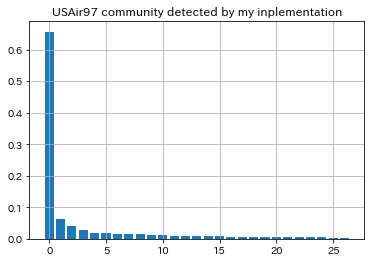

In [10]:
def hist(lst):
    d = {k: 0 for k in list(set(lst))}
    for x in lst:
        d[x] += 1
    return list(d.values())

def pdf(lst):
    d = {k: 0 for k in list(set(lst))}
    for x in lst:
        d[x] += 1
    counts = d.values()
    s = sum(counts)
    return [c/s for c in counts]

y = sorted(pdf(community), reverse=True)
plt.bar(range(len(y)), y)
plt.grid()
plt.title('USAir97 community detected by my inplementation')

## Test on LFR Benchmark

[1, 7, 13, 14, 20, 23, 24, 27, 28, 29, 31, 33, 37, 38, 39, 40, 46, 54, 55, 58, 62, 69, 71, 72, 75, 76, 78, 80, 83, 86, 90, 91, 96, 102, 103, 106, 107, 109, 113, 114, 116, 117, 120, 125, 128, 132, 135, 152, 153, 160, 165, 166, 168, 169, 177, 181, 182, 188, 192, 194, 202, 204, 205, 217, 228, 235, 240, 243, 244, 247, 248, 249]
[0, 2, 3, 4, 5, 6, 9, 10, 11, 15, 17, 25, 26, 30, 32, 35, 36, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 56, 57, 59, 60, 63, 64, 66, 67, 68, 73, 74, 77, 79, 81, 82, 85, 87, 88, 89, 92, 93, 94, 95, 97, 98, 99, 100, 101, 104, 105, 108, 110, 111, 112, 115, 118, 119, 121, 122, 123, 124, 126, 127, 129, 131, 133, 134, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 167, 170, 171, 172, 173, 175, 176, 178, 179, 184, 185, 187, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 203, 206, 207, 208, 210, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 229, 230, 231, 232, 

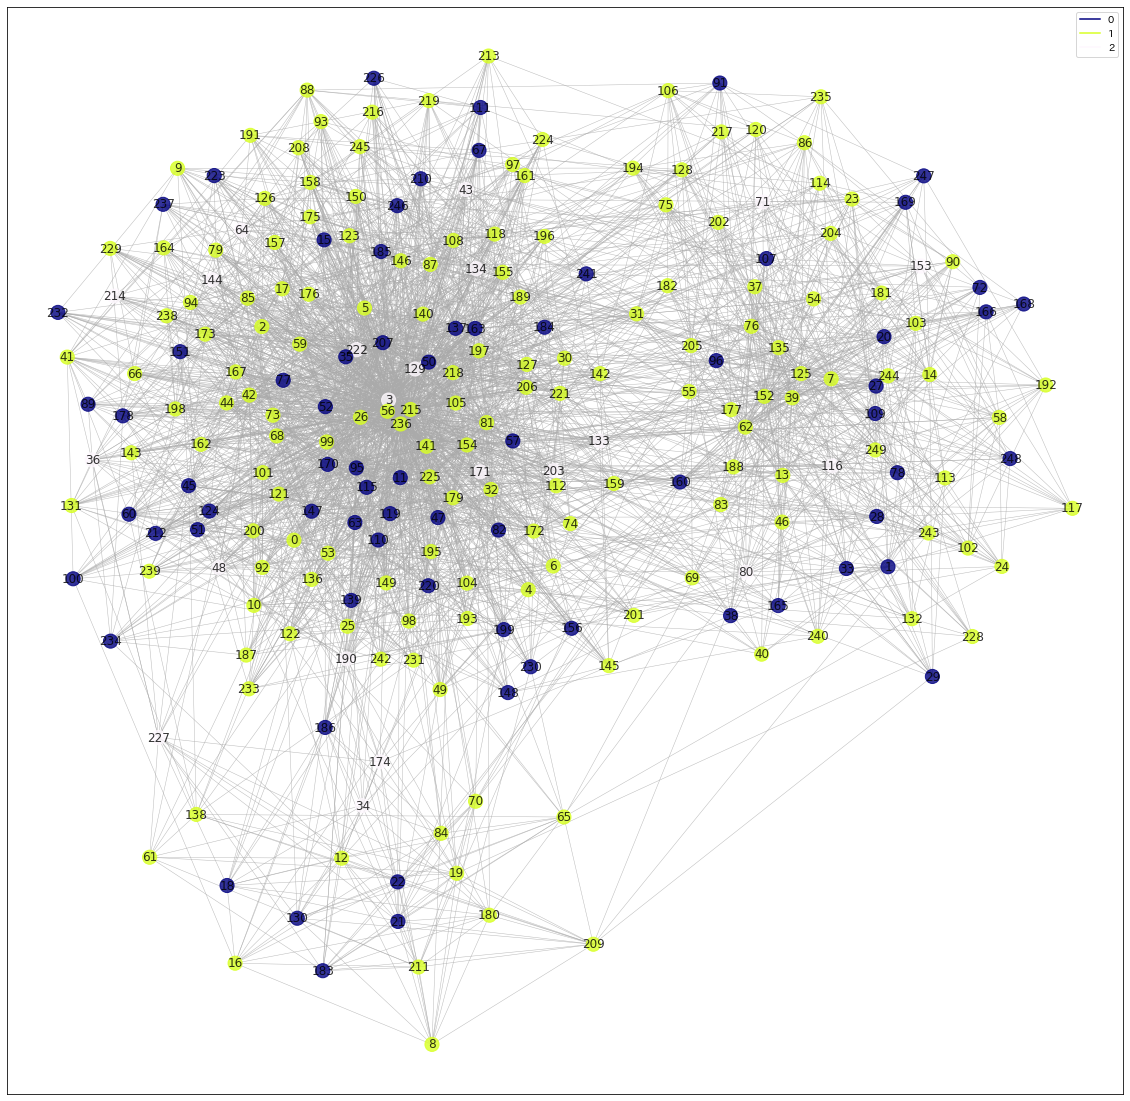

In [17]:
from networkx.generators.community import LFR_benchmark_graph
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=20, min_community=20, seed=10
)

ans_community = {frozenset(G.nodes[v]["community"]) for v in G}
community = [0] * n
for i,c in enumerate(ans_community):
    print(sorted(list(c)))
    for a in list(c):
        community[a] = i
          

E = list(G.edges())
# for e in E:
#     print(f"{e[0]} {e[1]}")
          
figsize=(20,20)
node_size = 200
with_labels = True
plot_community(E, community, figsize, node_size, with_labels)

In [10]:
# C = [[1, 7, 13, 14, 20, 23, 24, 27, 28, 29, 31, 33, 37, 38, 39, 40, 46, 54, 55, 58, 62, 69, 71, 72, 75, 76, 78, 80, 83, 86, 90, 91, 96, 102, 103, 106, 107, 109, 113, 114, 116, 117, 120, 125, 128, 132, 135, 152, 153, 160, 165, 166, 168, 169, 177, 181, 182, 188, 192, 194, 202, 204, 205, 217, 228, 235, 240, 243, 244, 247, 248, 249],[0, 2, 3, 4, 5, 6, 9, 10, 11, 15, 17, 25, 26, 30, 32, 35, 36, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 56, 57, 59, 60, 63, 64, 66, 67, 68, 73, 74, 77, 79, 81, 82, 85, 87, 88, 89, 92, 93, 94, 95, 97, 98, 99, 100, 101, 104, 105, 108, 110, 111, 112, 115, 118, 119, 121, 122, 123, 124, 126, 127, 129, 131, 133, 134, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 167, 170, 171, 172, 173, 175, 176, 178, 179, 184, 185, 187, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 203, 206, 207, 208, 210, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 241, 242, 245, 246],[8, 12, 16, 18, 19, 21, 22, 34, 61, 65, 70, 84, 130, 138, 174, 180, 183, 186, 209, 211, 227]]

# for i in range(len(C)):
#     for j in range(len(C[i])):
#         C[i][j] -= 1
# C

[[0,
  6,
  12,
  13,
  19,
  22,
  23,
  26,
  27,
  28,
  30,
  32,
  36,
  37,
  38,
  39,
  45,
  53,
  54,
  57,
  61,
  68,
  70,
  71,
  74,
  75,
  77,
  79,
  82,
  85,
  89,
  90,
  95,
  101,
  102,
  105,
  106,
  108,
  112,
  113,
  115,
  116,
  119,
  124,
  127,
  131,
  134,
  151,
  152,
  159,
  164,
  165,
  167,
  168,
  176,
  180,
  181,
  187,
  191,
  193,
  201,
  203,
  204,
  216,
  227,
  234,
  239,
  242,
  243,
  246,
  247,
  248],
 [-1,
  1,
  2,
  3,
  4,
  5,
  8,
  9,
  10,
  14,
  16,
  24,
  25,
  29,
  31,
  34,
  35,
  40,
  41,
  42,
  43,
  44,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  55,
  56,
  58,
  59,
  62,
  63,
  65,
  66,
  67,
  72,
  73,
  76,
  78,
  80,
  81,
  84,
  86,
  87,
  88,
  91,
  92,
  93,
  94,
  96,
  97,
  98,
  99,
  100,
  103,
  104,
  107,
  109,
  110,
  111,
  114,
  117,
  118,
  120,
  121,
  122,
  123,
  125,
  126,
  128,
  130,
  132,
  133,
  135,
  136,
  138,
  139,
  140,
  141,
  142,
  143,
  144

NC = 4
[1, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 2, 3, 2, 2, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 2, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 2, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 3, 3, 2, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3]


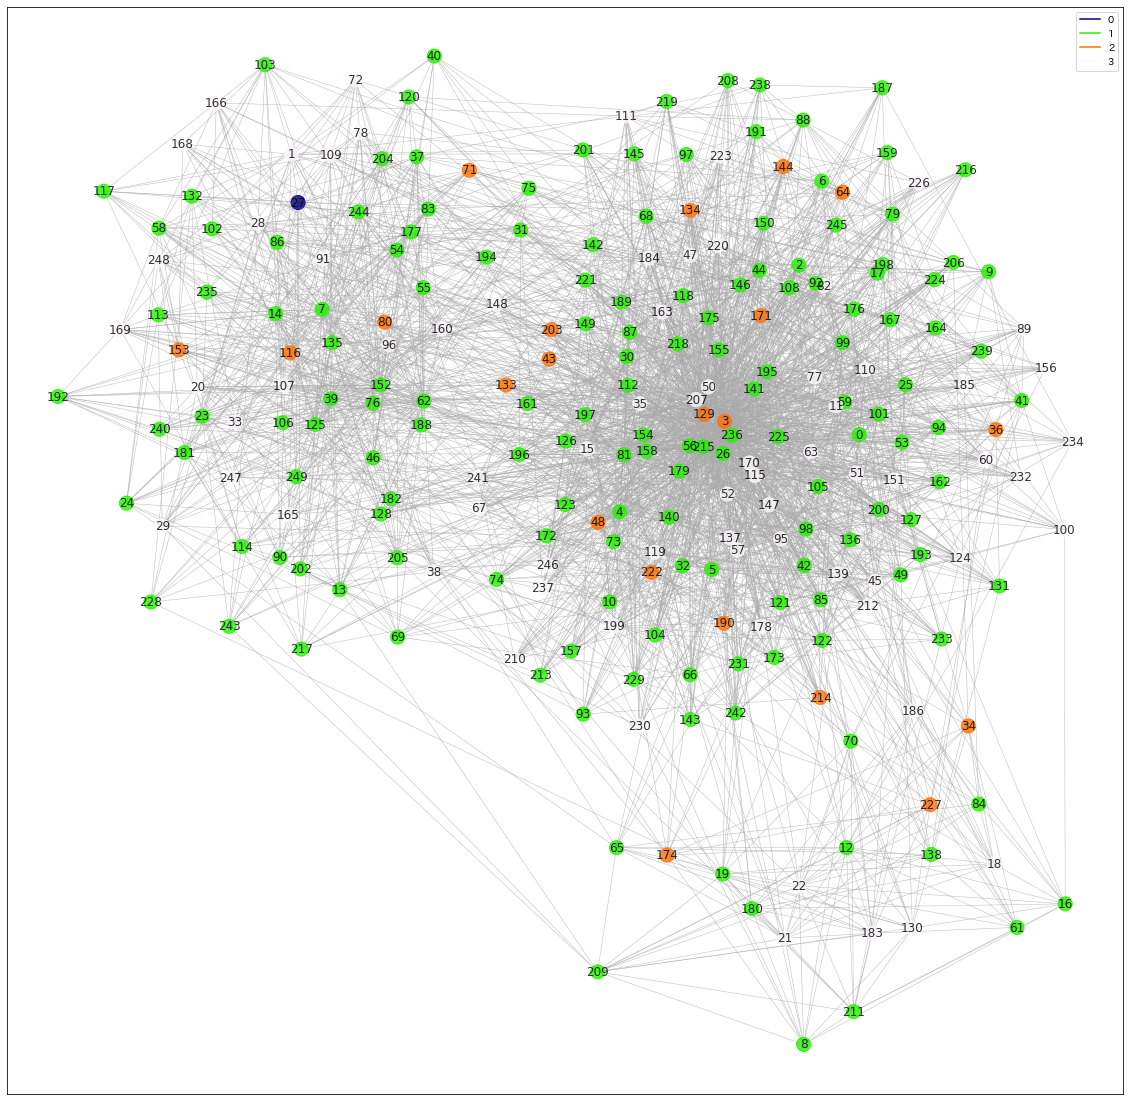

In [18]:
# community = [12,0,2,35,1,23,2,3,4,47,5,6,17,7,41,19,8,50,9,29,41,10,17,11,14,49,2,3,41,41,54,13,55,10,17,2,14,7,10,14,22,36,16,23,10,17,7,18,2,28,19,20,46,53,41,41,2,2,24,37,2,10,38,41,23,11,12,25,41,24,4,25,41,2,2,7,48,12,41,2,4,1,48,41,26,7,27,2,2,48,41,19,28,11,1,2,47,43,2,54,2,19,29,27,50,48,41,20,2,53,21,40,2,27,24,31,12,41,41,12,33,14,7,54,24,13,50,24,2,35,2,2,39,41,7,6,41,37,38,47,36,1,11,2,7,0,39,2,2,47,31,40,54,14,47,6,2,48,41,12,12,36,24,16,2,26,43,44,48,45,36,43,46,13,16,7,39,20,41,2,48,5,15,47,34,49,38,21,12,49,41,2,19,7,47,50,2,2,51,12,2,2,39,41,52,50,2,1,53,41,3,2,18,53,19,32,7,18,2,7,46,54,50,54,41,10,10,55,12,13,2,1,19,54,51,52,2,17,2,30,27,2,2,38,2,2,42,17,13,7]
# community = [5,5,5,5,5,5,5,8,2,5,5,5,2,5,8,5,2,5,2,2,10,2,2,5,7,5,5,5,5,5,5,5,5,8,2,5,5,8,5,8,4,9,5,5,9,5,8,5,5,5,9,5,5,5,7,8,6,5,5,9,5,2,5,9,6,2,1,6,5,8,2,5,3,0,5,5,10,5,3,9,5,5,5,5,2,5,5,6,9,5,5,9,9,0,5,5,5,8,5,5,5,9,3,7,9,5,3,5,5,3,5,6,1,5,10,5,5,5,5,5,3,9,9,5,2,5,5,5,8,5,2,5,10,5,10,5,5,5,2,9,5,5,3,5,5,5,5,9,5,4,5,6,8,8,9,5,5,5,5,3,5,10,5,5,5,5,5,5,8,5,5,9,5,6,2,6,10,9,6,5,2,8,5,2,5,5,2,5,8,5,9,5,8,5,10,9,8,5,5,5,9,5,10,5,10,8,5,5,6,2,5,2,9,5,5,5,5,5,5,6,9,5,5,0,6,9,5,2,10,5,6,9,5,5,2,3,5,5,9,9,8,5,5,5,5,5,9,5,8,8]

# 12/06 NC=8 using pagerank with unrecorded link teleportatino
community = [5,4,0,5,5,5,5,4,1,5,5,5,1,5,4,5,1,5,1,1,4,1,1,5,4,5,3,5,4,4,5,5,5,4,1,5,5,4,5,4,4,5,5,5,5,5,4,0,5,5,3,5,5,5,4,4,5,7,7,5,5,1,5,5,3,1,3,3,5,4,1,5,2,0,3,5,6,5,4,0,5,5,5,4,1,5,4,0,0,5,4,4,0,0,5,5,5,0,5,5,5,3,7,4,5,5,5,7,0,2,3,0,5,4,4,0,5,4,5,5,6,3,3,5,3,4,5,5,4,5,1,3,5,5,3,5,5,5,1,3,5,5,2,5,5,5,5,5,5,5,5,7,4,4,3,5,5,5,5,5,5,0,5,5,5,5,7,5,4,7,5,5,5,5,1,3,6,4,3,0,1,4,5,1,5,7,1,5,7,5,3,3,4,3,4,3,7,5,5,5,0,5,0,3,4,4,2,5,0,1,7,1,3,5,5,5,5,5,5,3,5,5,5,0,3,3,5,5,4,5,3,6,5,5,5,2,5,3,5,0,5,5,5,5,5,0,3,5,4,4]

# 12/12 NC=4
community = [1,3,1,1,1,1,1,3,2,1,1,1,2,3,3,1,2,1,2,2,3,2,2,3,3,1,1,3,3,3,1,3,1,3,2,1,1,3,3,3,0,1,1,1,1,1,3,1,1,1,1,1,1,1,3,3,1,1,3,1,1,2,3,1,1,2,1,1,1,3,2,3,3,1,1,3,3,1,3,1,3,1,1,3,2,1,3,1,1,1,3,3,1,1,1,1,3,1,1,1,1,1,3,3,1,1,3,3,1,3,1,1,1,3,3,1,3,3,1,1,3,1,1,1,1,3,1,1,3,1,2,1,3,1,1,3,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,1,1,1,1,1,1,3,1,1,1,1,3,3,1,3,3,1,1,1,1,2,1,1,3,1,1,2,3,3,2,1,1,2,1,3,1,1,1,3,1,3,1,1,1,1,1,1,1,3,1,3,3,1,1,1,2,1,2,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,2,3,1,1,1,1,1,1,3,1,1,1,1,3,1,1,3,3,1,1,3,3,3]

figsize=(20,20)
node_size = 200
with_labels = True
plot_community(E, community, figsize, node_size, with_labels)

In [14]:
# 2 level
seed = 1
im = Infomap(directed=False, two_level=True, seed=seed)
im.add_nodes(range(250))
im.add_links(tuple(E))
im.run()
community = list(im.get_modules().values()) # top-level partition
print(community, end=',\t')
print(f'L={im.codelength:.2f}')

figsize=(20,20)
node_size = 200
with_labels = True
plot_community(E, add(community, -1), figsize, node_size, with_labels)

[1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 2, 2, 1, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 3, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 2, 2, 3, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2],	L=7.46


NameError: name 'add' is not defined

In [ ]:
# multilevel
seed = 1
im = Infomap(directed=False, two_level=False, seed=seed)
im.add_nodes(range(250))
im.add_links(tuple(E))
im.run()
community = list(im.get_modules().values()) # top-level partition
# community = [v[1] for v in im.get_multilevel_modules().values()] # second-level partition if exists
print(community, end=',\t')
print(f'L={im.codelength:.2f}')

figsize=(20,20)
node_size = 200
with_labels = True
plot_community(E, add(community, -1), figsize, node_size, with_labels)

## infomap python api を試す

In [ ]:
def add(lst, a):
    return [x+a for x in lst]

In [ ]:
# list(im.get_modules().values())
[*im.get_modules().values()]

In [ ]:
path = 'graphs/27.txt'
with open(path) as f:
    E = [s.strip().split(' ')[:2] for s in f.readlines()]
E_tup = [[int(e[0]), int(e[1])] for e in E]

for seed in range(10):
    im = Infomap(directed=False, two_level=True, seed=seed)
    im.add_nodes(range(27))
    im.add_links(tuple(E_tup))
    im.run()
    print(list(im.get_modules().values()), end=',\t')
    print(f'L={im.codelength:.2f}')
    print(im.get_modules())

In [ ]:
community = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8]

im.initial_partition = {k: v+1 for k,v in enumerate(community)}
im.no_infomap = True
im.run()
im.codelength

In [ ]:
community = [5, 5, 5, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# community = [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 6, 6, 6, 3, 3, 3, 4, 4, 4, 5, 5, 5, 7, 7, 7]
figsize=(8,8)
plot_community(E, add(community, -1), figsize)

In [ ]:
path = 'graphs/USAir97_edges.txt'
with open(path) as f:
    E = [s.strip().split(' ')[:2] for s in f.readlines()]
    Ew = [s.strip().split(' ') for s in f.readlines()]

E_tup = [[int(e[0]), int(e[1])] for e in E]
E_tupw = [[int(e[0]), int(e[1]), float(e[2])] for e in Ew]

seed = 1
im = Infomap(directed=False, two_level=True, seed=seed)
im.add_nodes(range(27))
im.add_links(tuple(E_tupw))
im.run()
print(list(im.get_modules().values()), end=',\t')
# print(im.get_multilevel_modules(), end=',\t')
print(f'L={im.codelength:.2f}')

In [ ]:
community = [19, 5, 5, 5, 5, 5, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 11, 7, 7, 7, 7, 7, 11, 5, 5, 11, 11, 5, 5, 11, 5, 11, 11, 11, 5, 5, 5, 5, 5, 3, 4, 1, 2, 1, 1, 4, 4, 2, 2, 2, 4, 1, 1, 1, 2, 4, 2, 10, 2, 2, 2, 4, 4, 4, 2, 3, 3, 1, 1, 10, 10, 10, 1, 10, 3, 3, 1, 10, 1, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 9, 15, 2, 1, 1, 9, 3, 1, 1, 1, 1, 1, 1, 15, 3, 1, 1, 1, 9, 1, 14, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 9, 1, 1, 3, 1, 1, 12, 12, 1, 1, 12, 1, 9, 1, 1, 14, 12, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 1, 18, 18, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 6, 13, 13, 13, 13, 6, 13]

figsize=(12,12)
node_size=150
plot_community(E, add(community, -1), figsize, node_size)

In [ ]:
set(community)

In [ ]:
def hist(lst):
    d = {k: 0 for k in list(set(lst))}
    for x in lst:
        d[x] += 1
    return list(d.values())

y = sorted(hist(community), reverse=True)
plt.bar(range(len(y)), y)
plt.grid()
plt.title('USAir97 community detected by infomap api')

## PageRank

In [107]:
from sknetwork.ranking import PageRank
import numpy as np

In [108]:
pagerank = PageRank(damping_factor=0.85)
adj = [
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
    [0,0,0,0,0,0]
]
score = pagerank.fit_transform(np.array(adj))
np.round(score ,2), np.sum(score)

(array([0.03, 0.07, 0.11, 0.15, 0.2 , 0.44]), 1.0)

### pagerank of scikit-network

In [110]:
# # 3 nodes
# adj = [
#     [0,1,0],
#     [1,0,1],
#     [0,1,0]
# ]
# 4 nodes
adj = [
    [0,1,1,0],
    [1,0,1,0],
    [1,1,0,1],
    [0,0,1,0]
]

pagerank = PageRank(damping_factor=0.85, solver='RH',tol=1e-10)
score = pagerank.fit_transform(np.array(adj))
print(np.round(score,5))
pagerank = PageRank(damping_factor=0.85, solver='diteration',tol=1e-10)
score = pagerank.fit_transform(np.array(adj))
print(np.round(score,5))
pagerank = PageRank(damping_factor=0.85, solver='push',tol=1e-10)
score = pagerank.fit_transform(np.array(adj))
print(np.round(score,5))
pagerank = PageRank(damping_factor=0.85,tol=1e-10)
score = pagerank.fit_transform(np.array(adj))
print(np.round(score,5))

[0.24513 0.24513 0.36498 0.14475]
[0.2439  0.24526 0.36749 0.14335]
[0.23043 0.23904 0.36156 0.16897]
[0.24626 0.24626 0.36553 0.14196]


### pagerank of networkx

In [111]:
# 3 nodes
E = [[0,1],[1,2]]

# # 4 nodes
# E = [[0,1],[0,2],[1,2],[2,3]]

G = nx.Graph()
G.add_edges_from(E)
alpha = 0.85
nx.pagerank(G, alpha)

{0: 0.25675708783778944, 1: 0.48648582432442095, 2: 0.25675708783778944}

In [ ]:
score2 = score.T.dot(np.array(adj))
score2

In [ ]:
score2 / np.sum(score2)

In [ ]:
# entropy
from math import log
def H(X):
    h = 0
    for x in X:
        h -= x*log(x)
    return h
H(score2 / np.sum(score2)) / log(2)

alpha = 1.00, pagerank = 0.100, 0.200, 0.300, 0.400, 

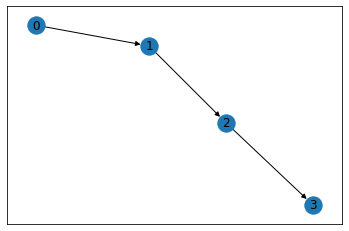

In [80]:
# 4 nodes directed
G = nx.DiGraph()
E = [[0,1],[1,2],[2,3]]
G.add_edges_from(E)
nx.draw_networkx(G, with_labels=True)

# undirected
# alpha = 0.85, pagerank = 0.175, 0.325, 0.325, 0.175
# alpha = 1.00, pagerank = 0.167, 0.333, 0.333, 0.167

# directed
# alpha = 0.85, pagerank = 0.116, 0.215, 0.299, 0.370
# alpha = 1.00, pagerank = 0.100, 0.200, 0.300, 0.400

alpha = 1
pagerank = nx.pagerank(G, alpha)
print(f"alpha = {alpha:.2f}, pagerank = ", end="")
for p in pagerank.values():
    print(f"{p:.3f}", end=", ")

## あそび

数字を正方行列に並び替えて行列式を計算してみる．

対象
- pi
- e
- sqrt(2)
- random

### pi

In [100]:
import re

pi = '''3.
141592653589 793238462643 383279502884 197169399375 105820974944 592307816406 286208998628 034825342117 
067982148086 513282306647 093844609550 582231725359 408128481117 450284102701 938521105559 644622948954 
930381964428 810975665933 446128475648 233786783165 271201909145 648566923460 348610454326 648213393607 
260249141273 724587006606 315588174881 520920962829 254091715364 367892590360 011330530548 820466521384 
146951941511 609433057270 365759591953 092186117381 932611793105 118548074462 379962749567 351885752724 
891227938183 011949129833 673362440656 643086021394 946395224737 190702179860 943702770539 217176293176 
752384674818 467669405132 000568127145 263560827785 771342757789 609173637178 721468440901 224953430146 
549585371050 792279689258 923542019956 112129021960 864034418159 813629774771 309960518707 211349999998 
372978049951 059731732816 096318595024 459455346908 302642522308 253344685035 261931188171 010003137838 
752886587533 208381420617 177669147303 598253490428 755468731159 562863882353 787593751957 781857780532 
171226806613 001927876611 195909216420 198938095257 201065485863 278865936153 381827968230 301952035301 
852968995773 622599413891 249721775283 479131515574 857242454150 695950829533 116861727855 889075098381 
754637464939 319255060400 927701671139 009848824012 858361603563 707660104710 181942955596 198946767837 
449448255379 774726847104 047534646208 046684259069 491293313677 028989152104 752162056966 024058038150 
193511253382 430035587640 247496473263 914199272604 269922796782 354781636009 341721641219 924586315030 
286182974555 706749838505 494588586926 995690927210 797509302955 321165344987 202755960236 480665499119 
881834797753 566369807426 542527862551 818417574672 890977772793 800081647060 016145249192 173217214772 
350141441973 568548161361 157352552133 475741849468 438523323907 394143334547 762416862518 983569485562 
099219222184 272550254256 887671790494 601653466804 988627232791 786085784383 827967976681 454100953883 
786360950680 064225125205 117392984896 084128488626 945604241965 285022210661 186306744278 622039194945 
047123713786 960956364371 917287467764 657573962413 890865832645 995813390478 027590099465 764078951269 
468398352595 709825822620 522489407726 719478268482 601476990902 640136394437 455305068203 496252451749 
399651431429 809190659250 937221696461 515709858387 410597885959 772975498930 161753928468 138268683868 
942774155991 855925245953 959431049972 524680845987 273644695848 653836736222 626099124608 051243884390 
451244136549 762780797715 691435997700 129616089441 694868555848 406353422072 225828488648 158456028506 
016842739452 267467678895 252138522549 954666727823 986456596116 354886230577 456498035593 634568174324 
112515076069 479451096596 094025228879 710893145669 136867228748 940560101503 308617928680 920874760917 
824938589009 714909675985 261365549781 893129784821 682998948722 658804857564 014270477555 132379641451 
523746234364 542858444795 265867821051 141354735739 523113427166 102135969536 231442952484 937187110145 
765403590279 934403742007 310578539062 198387447808 478489683321 445713868751 943506430218 453191048481 
005370614680 674919278191 197939952061 419663428754 440643745123 718192179998 391015919561 814675142691 
239748940907 186494231961 567945208095 146550225231 603881930142 093762137855 956638937787 083039069792 
077346722182 562599661501 421503068038 447734549202 605414665925 201497442850 732518666002 132434088190 
710486331734 649651453905 796268561005 508106658796 998163574736 384052571459 102897064140 110971206280 
439039759515 677157700420 337869936007 230558763176 359421873125 147120532928 191826186125 867321579198 
414848829164 470609575270 695722091756 711672291098 169091528017 350671274858 322287183520 935396572512 
108357915136 988209144421 006751033467 110314126711 136990865851 639831501970 165151168517 143765761835 
155650884909 989859982387 345528331635 507647918535 893226185489 632132933089 857064204675 259070915481 
416549859461 637180270981 994309924488 957571282890 592323326097 299712084433 573265489382 391193259746 
366730583604 142813883032 038249037589 852437441702 913276561809 377344403070 746921120191 302033038019 
762110110044 929321516084 244485963766 983895228684 783123552658 213144957685 726243344189 303968642624 
341077322697 802807318915 441101044682 325271620105 265227211166 039666557309 254711055785 376346682065 
310989652691 862056476931 257058635662 018558100729 360659876486 117910453348 850346113657 686753249441 
668039626579 787718556084 552965412665 408530614344 431858676975 145661406800 700237877659 134401712749 
470420562230 538994561314 071127000407 854733269939 081454664645 880797270826 683063432858 785698305235 
808933065757 406795457163 775254202114 955761581400 250126228594 130216471550 979259230990 796547376125 
517656751357 517829666454 779174501129 961489030463 994713296210 734043751895 735961458901 938971311179 
042978285647 503203198691 514028708085 990480109412 147221317947 647772622414 254854540332 157185306142 
288137585043 063321751829 798662237172 159160771669 254748738986 654949450114 654062843366 393790039769 
265672146385 306736096571 209180763832 716641627488 880078692560 290228472104 031721186082 041900042296 
617119637792 133757511495 950156604963 186294726547 364252308177 036751590673 502350728354 056704038674 
351362222477 158915049530 984448933309 634087807693 259939780541 934144737744 184263129860 809988868741 
326047215695 162396586457 302163159819 319516735381 297416772947 867242292465 436680098067 692823828068 
996400482435 403701416314 965897940924 323789690706 977942236250 822168895738 379862300159 377647165122 
893578601588 161755782973 523344604281 512627203734 314653197777 416031990665 541876397929 334419521541 
341899485444 734567383162 499341913181 480927777103 863877343177 207545654532 207770921201 905166096280 
490926360197 598828161332 316663652861 932668633606 273567630354 477628035045 077723554710 585954870279 
081435624014 517180624643 626794561275 318134078330 336254232783 944975382437 205835311477 119926063813 
346776879695 970309833913 077109870408 591337464144 282277263465 947047458784 778720192771 528073176790 
770715721344 473060570073 349243693113 835049316312 840425121925 651798069411 352801314701 304781643788 
518529092854 520116583934 196562134914 341595625865 865570552690 496520985803 385072242648 293972858478 
316305777756 068887644624 824685792603 953527734803 048029005876 075825104747 091643961362 676044925627 
420420832085 661190625454 337213153595 845068772460 290161876679 524061634252 257719542916 299193064553 
779914037340 432875262888 963995879475 729174642635 745525407909 145135711136 941091193932 519107602082 
520261879853 188770584297 259167781314 969900901921 169717372784 768472686084 900337702424 291651300500 
516832336435 038951702989 392233451722 013812806965 011784408745 196012122859 937162313017 114448464090 
389064495444 006198690754 851602632750 529834918740 786680881833 851022833450 850486082503 930213321971 
551843063545 500766828294 930413776552 793975175461 395398468339 363830474611 996653858153 842056853386 
218672523340 283087112328 278921250771 262946322956 398989893582 116745627010 218356462201 349671518819 
097303811980 049734072396 103685406643 193950979019 069963955245 300545058068 550195673022 921913933918 
568034490398 205955100226 353536192041 994745538593 810234395544 959778377902 374216172711 172364343543 
947822181852 862408514006 660443325888 569867054315 470696574745 855033232334 210730154594 051655379068 
662733379958 511562578432 298827372319 898757141595 781119635833 005940873068 121602876496 286744604774 
649159950549 737425626901 049037781986 835938146574 126804925648 798556145372 347867330390 468838343634 
655379498641 927056387293 174872332083 760112302991 136793862708 943879936201 629515413371 424892830722 
012690147546 684765357616 477379467520 049075715552 781965362132 392640616013 635815590742 202020318727 
760527721900 556148425551 879253034351 398442532234 157623361064 250639049750 086562710953 591946589751 
413103482276 930624743536 325691607815 478181152843 667957061108 615331504452 127473924544 945423682886 
061340841486 377670096120 715124914043 027253860764 823634143346 235189757664 521641376796 903149501910 
857598442391 986291642193 994907236234 646844117394 032659184044 378051333894 525742399508 296591228508 
555821572503 107125701266 830240292952 522011872676 756220415420 516184163484 756516999811 614101002996 
078386909291 603028840026 910414079288 621507842451 670908700069 928212066041 837180653556 725253256753 
286129104248 776182582976 515795984703 562226293486 003415872298 053498965022 629174878820 273420922224 
533985626476 691490556284 250391275771 028402799806 636582548892 648802545661 017296702664 076559042909 
945681506526 530537182941 270336931378 517860904070 866711496558 343434769338 578171138645 587367812301 
458768712660 348913909562 009939361031 029161615288 138437909904 231747336394 804575931493 140529763475 
748119356709 110137751721 008031559024 853090669203 767192203322 909433467685 142214477379 393751703443 
661991040337 511173547191 855046449026 365512816228 824462575916 333039107225 383742182140 883508657391 
771509682887 478265699599 574490661758 344137522397 096834080053 559849175417 381883999446 974867626551 
658276584835 884531427756 879002909517 028352971634 456212964043 523117600665 101241200659 755851276178 
583829204197 484423608007 193045761893 234922927965 019875187212 726750798125 547095890455 635792122103 
334669749923 563025494780 249011419521 238281530911 407907386025 152274299581 807247162591 668545133312 
394804947079 119153267343 028244186041 426363954800 044800267049 624820179289 647669758318 327131425170 
296923488962 766844032326 092752496035 799646925650 493681836090 032380929345 958897069536 534940603402 
166544375589 004563288225 054525564056 448246515187 547119621844 396582533754 388569094113 031509526179 
378002974120 766514793942 590298969594 699556576121 865619673378 623625612521 632086286922 210327488921 
865436480229 678070576561 514463204692 790682120738 837781423356 282360896320 806822246801 224826117718 
589638140918 390367367222 088832151375 560037279839 400415297002 878307667094 447456013455 641725437090 
697939612257 142989467154 357846878861 444581231459 357198492252 847160504922 124247014121 478057345510 
500801908699 603302763478 708108175450 119307141223 390866393833 952942578690 507643100638 351983438934 
159613185434 754649556978 103829309716 465143840700 707360411237 359984345225 161050702705 623526601276 
484830840761 183013052793 205427462865 403603674532 865105706587 488225698157 936789766974 220575059683 
440869735020 141020672358 502007245225 632651341055 924019027421 624843914035 998953539459 094407046912 
091409387001 264560016237 428802109276 457931065792 295524988727 584610126483 699989225695 968815920560 
010165525637 567856672279 661988578279 484885583439 751874454551 296563443480 396642055798 293680435220 
277098429423 253302257634 180703947699 415979159453 006975214829 336655566156 787364005366 656416547321 
704390352132 954352916941 459904160875 320186837937 023488868947 915107163785 290234529244 077365949563 
051007421087 142613497459 561513849871 375704710178 795731042296 906667021449 863746459528 082436944578 
977233004876 476524133907 592043401963 403911473202 338071509522 201068256342 747164602433 544005152126 
693249341967 397704159568 375355516673 027390074972 973635496453 328886984406 119649616277 344951827369 
558822075735 517665158985 519098666539 354948106887 320685990754 079234240230 092590070173 196036225475 
647894064754 834664776041 146323390565 134330684495 397907090302 346046147096 169688688501 408347040546 
074295869913 829668246818 571031887906 528703665083 243197440477 185567893482 308943106828 702722809736 
248093996270 607472645539 925399442808 113736943388 729406307926 159599546262 462970706259 484556903471 
197299640908 941805953439 325123623550 813494900436 427852713831 591256898929 519642728757 394691427253 
436694153236 100453730488 198551706594 121735246258 954873016760 029886592578 662856124966 552353382942 
878542534048 308330701653 722856355915 253478445981 831341129001 999205981352 205117336585 640782648494 
276441137639 386692480311 836445369858 917544264739 988228462184 490087776977 631279572267 265556259628 
254276531830 013407092233 436577916012 809317940171 859859993384 923549564005 709955856113 498025249906 
698423301735 035804408116 855265311709 957089942732 870925848789 443646005041 089226691783 525870785951 
298344172953 519537885534 573742608590 290817651557 803905946408 735061232261 120093731080 485485263572 
282576820341 605048466277 504500312620 080079980492 548534694146 977516493270 950493463938 243222718851 
597405470214 828971117779 237612257887 347718819682 546298126868 581705074027 255026332904 497627789442 
362167411918 626943965067 151577958675 648239939176 042601763387 045499017614 364120469218 237076488783 
419689686118 155815873606 293860381017 121585527266 830082383404 656475880405 138080163363 887421637140 
643549556186 896411228214 075330265510 042410489678 352858829024 367090488711 819090949453 314421828766 
181031007354 770549815968 077200947469 613436092861 484941785017 180779306810 854690009445 899527942439 
813921350558 642219648349 151263901280 383200109773 868066287792 397180146134 324457264009 737425700735 
921003154150 893679300816 998053652027 600727749674 584002836240 534603726341 655425902760 183484030681 
138185510597 970566400750 942608788573 579603732451 414678670368 809880609716 425849759513 806930944940 
151542222194 329130217391 253835591503 100333032511 174915696917 450271494331 515588540392 216409722910 
112903552181 576282328318 234254832611 191280092825 256190205263 016391147724 733148573910 777587442538 
761174657867 116941477642 144111126358 355387136101 102326798775 641024682403 226483464176 636980663785 
768134920453 022408197278 564719839630 878154322116 691224641591 177673225326 433568614618 654522268126 
887268445968 442416107854 016768142080 885028005414 361314623082 102594173756 238994207571 362751674573 
189189456283 525704413354 375857534269 869947254703 165661399199 968262824727 064133622217 892390317608 
542894373393 561889165125 042440400895 271983787386 480584726895 462438823437 517885201439 560057104811 
949884239060 613695734231 559079670346 149143447886 360410318235 073650277859 089757827273 130504889398 
900992391350 337325085598 265586708924 261242947367 019390772713 070686917092 646254842324 074855036608 
013604668951 184009366860 954632500214 585293095000 090715105823 626729326453 738210493872 499669933942 
468551648326 113414611068 026744663733 437534076429 402668297386 522093570162 638464852851 490362932019 
919968828517 183953669134 522244470804 592396602817 156551565666 111359823112 250628905854 914509715755 
390024393153 519090210711 945730024388 017661503527 086260253788 179751947806 101371500448 991721002220 
133501310601 639154158957 803711779277 522597874289 191791552241 718958536168 059474123419 339842021874 
564925644346 239253195313 510331147639 491199507285 843065836193 536932969928 983791494193 940608572486 
396883690326 556436421664 425760791471 086998431573 374964883529 276932822076 294728238153 740996154559 
879825989109 371712621828 302584811238 901196822142 945766758071 865380650648 702613389282 299497257453 
033283896381 843944770779 402284359883 410035838542 389735424395 647555684095 224844554139 239410001620 
769363684677 641301781965 937997155746 854194633489 374843912974 239143365936 041003523437 770658886778 
113949861647 874714079326 385873862473 288964564359 877466763847 946650407411 182565837887 845485814896 
296127399841 344272608606 187245545236 064315371011 274680977870 446409475828 034876975894 832824123929 
296058294861 919667091895 808983320121 031843034012 849511620353 428014412761 728583024355 983003204202 
451207287253 558119584014 918096925339 507577840006 746552603144 616705082768 277222353419 110263416315 
714740612385 042584598841 990761128725 805911393568 960143166828 317632356732 541707342081 733223046298 
799280490851 409479036887 868789493054 695570307261 900950207643 349335910602 454508645362 893545686295 
853131533718 386826561786 227363716975 774183023986 006591481616 404944965011 732131389574 706208847480 
236537103115 089842799275 442685327797 431139514357 417221975979 935968525228 574526379628 961269157235 
798662057340 837576687388 426640599099 350500081337 543245463596 750484423528 487470144354 541957625847 
356421619813 407346854111 766883118654 489377697956 651727966232 671481033864 391375186594 673002443450 
054499539974 237232871249 483470604406 347160632583 064982979551 010954183623 503030945309 733583446283 
947630477564 501500850757 894954893139 394489921612 552559770143 685894358587 752637962559 708167764380 
012543650237 141278346792 610199558522 471722017772 370041780841 942394872540 680155603599 839054898572 
354674564239 058585021671 903139526294 455439131663 134530893906 204678438778 505423939052 473136201294 
769187497519 101147231528 932677253391 814660730008 902776896311 481090220972 452075916729 700785058071 
718638105496 797310016787 085069420709 223290807038 326345345203 802786099055 690013413718 236837099194 
951648960075 504934126787 643674638490 206396401976 668559233565 463913836318 574569814719 621084108096 
188460545603 903845534372 914144651347 494078488442 377217515433 426030669883 176833100113 310869042193 
903108014378 433415137092 435301367763 108491351615 642269847507 430329716746 964066653152 703532546711 
266752246055 119958183196 376370761799 191920357958 200759560530 234626775794 393630746305 690108011494 
271410093913 691381072581 378135789400 559950018354 251184172136 055727522103 526803735726 527922417373 
605751127887 218190844900 617801388971 077082293100 279766593583 875890939568 814856026322 439372656247 
277603789081 445883785501 970284377936 240782505270 487581647032 458129087839 523245323789 602984166922 
548964971560 698119218658 492677040395 648127810217 991321741630 581055459880 130048456299 765112124153 
637451500563 507012781592 671424134210 330156616535 602473380784 302865525722 275304999883 701534879300 
806260180962 381516136690 334111138653 851091936739 383522934588 832255088706 450753947395 204396807906 
708680644509 698654880168 287434378612 645381583428 075306184548 590379821799 459968115441 974253634439 
960290251001 588827216474 500682070419 376158454712 318346007262 933955054823 955713725684 023226821301 
247679452264 482091023564 775272308208 106351889915 269288910845 557112660396 503439789627 825001611015 
323516051965 590421184494 990778999200 732947690586 857787872098 290135295661 397888486050 978608595701 
773129815531 495168146717 695976099421 003618355913 877781769845 875810446628 399880600616 229848616935 
337386578773 598336161338 413385368421 197893890018 529569196780 455448285848 370117096721 253533875862 
158231013310 387766827211 572694951817 958975469399 264219791552 338576623167 627547570354 699414892904 
130186386119 439196283887 054367774322 427680913236 544948536676 800000106526 248547305586 159899914017 
076983854831 887501429389 089950685453 076511680333 732226517566 220752695179 144225280816 517166776672 
793035485154 204023817460 892328391703 275425750867 655117859395 002793389592 057668278967 764453184040 
418554010435 134838953120 132637836928 358082719378 312654961745 997056745071 833206503455 664403449045 
362756001125 018433560736 122276594927 839370647842 645676338818 807565612168 960504161139 039063960162 
022153684941 092605387688 714837989559 999112099164 646441191856 827700457424 343402167227 644558933012 
778158686952 506949936461 017568506016 714535431581 480105458860 564550133203 758645485840 324029871709 
348091055621 167154684847 780394475697 980426318099 175642280987 399876697323 769573701580 806822904599 
212366168902 596273043067 931653114940 176473769387 351409336183 321614280214 976339918983 548487562529 
875242387307 755955595546 519639440182 184099841248 982623673771 467226061633 643296406335 728107078875 
816404381485 018841143188 598827694490 119321296827 158884133869 434682859006 664080631407 775772570563 
072940049294 030242049841 656547973670 548558044586 572022763784 046682337985 282710578431 975354179501 
134727362577 408021347682 604502285157 979579764746 702284099956 160156910890 384582450267 926594205550 
395879229818 526480070683 765041836562 094555434613 513415257006 597488191634 135955671964 965403218727 
160264859304 903978748958 906612725079 482827693895 352175362185 079629778514 618843271922 322381015874 
445052866523 802253284389 137527384589 238442253547 265309817157 844783421582 232702069028 723233005386 
216347988509 469547200479 523112015043 293226628272 763217790884 008786148022 147537657810 581970222630 
971749507212 724847947816 957296142365 859578209083 073323356034 846531873029 302665964501 371837542889 
755797144992 465403868179 921389346924 474198509733 462679332107 268687076806 263991936196 504409954216 
762784091466 985692571507 431574079380 532392523947 755744159184 582156251819 215523370960 748332923492 
103451462643 744980559610 330799414534 778457469999 212859999939 961228161521 931488876938 802228108300 
198601654941 654261696858 678837260958 774567618250 727599295089 318052187292 461086763995 891614585505 
839727420980 909781729323 930106766386 824040111304 024700735085 782872462713 494636853181 546969046696 
869392547251 941399291465 242385776255 004748529547 681479546700 705034799958 886769501612 497228204030 
399546327883 069597624936 151010243655 535223069061 294938859901 573466102371 223547891129 254769617600 
504797492806 072126803922 691102777226 102544149221 576504508120 677173571202 718024296810 620377657883 
716690910941 807448781404 907551782038 565390991047 759414132154 328440625030 180275716965 082096427348 
414695726397 884256008453 121406593580 904127113592 004197598513 625479616063 228873618136 737324450607 
924411763997 597461938358 457491598809 766744709300 654634242346 063423747466 608043170126 005205592849 
369594143408 146852981505 394717890045 183575515412 522359059068 726487863575 254191128887 737176637486 
027660634960 353679470269 232297186832 771739323619 200777452212 624751869833 495151019864 269887847171 
939664976907 082521742336 566272592844 062043021411 371992278526 998469884770 232382384005 565551788908 
766136013047 709843861168 705231055314 916251728373 272867600724 817298763756 981633541507 460883866364 
069347043720 668865127568 826614973078 865701568501 691864748854 167915459650 723428773069 985371390430 
026653078398 776385032381 821553559732 353068604301 067576083890 862704984188 859513809103 042359578249 
514398859011 318583584066 747237029714 978508414585 308578133915 627076035639 076394731145 549583226694 
570249413983 163433237897 595568085683 629725386791 327505554252 449194358912 840504522695 381217913191 
451350099384 631177401797 151228378546 011603595540 286440590249 646693070776 905548102885 020808580087 
811577381719 174177601733 073855475800 605601433774 329901272867 725304318251 975791679296 996504146070 
664571258883 469797964293 162296552016 879730003564 630457930884 032748077181 155533090988 702550520768 
046303460865 816539487695 196004408482 065967379473 168086415645 650530049881 616490578831 154345485052 
660069823093 157776500378 070466126470 602145750579 327096204782 561524714591 896522360839 664562410519 
551052235723 973951288181 640597859142 791481654263 289200428160 913693777372 229998332708 208296995573 
772737566761 552711392258 805520189887 620114168005 468736558063 347160373429 170390798639 652296131280 
178267971728 982293607028 806908776866 059325274637 840539769184 808204102194 471971386925 608416245112 
398062011318 454124478205 011079876071 715568315407 886543904121 087303240201 068534194723 047666672174 
986986854707 678120512473 679247919315 085644477537 985379973223 445612278584 329684664751 333657369238 
720146472367 942787004250 325558992688 434959287612 400755875694 641370562514 001179713316 620715371543 
600687647731 867558714878 398908107429 530941060596 944315847753 970094398839 491443235366 853920994687 
964506653398 573888786614 762944341401 049888993160 051207678103 588611660202 961193639682 134960750111 
649832785635 316145168457 695687109002 999769841263 266502347716 728657378579 085746646077 228341540311 
441529418804 782543876177 079043000156 698677679576 090996693607 559496515273 634981189641 304331166277 
471233881740 603731743970 540670310967 676574869535 878967003192 586625941051 053358438465 602339179674 
926784476370 847497833365 557900738419 147319886271 352595462518 160434225372 996286326749 682405806029 
642114638643 686422472488 728343417044 157348248183 330164056695 966886676956 349141632842 641497453334 
999948000266 998758881593 507357815195 889900539512 085351035726 137364034367 534714104836 017546488300 
407846416745 216737190483 109676711344 349481926268 111073994825 060739495073 503169019731 852119552635 
632584339099 822498624067 031076831844 660729124874 754031617969 941139738776 589986855417 031884778867 
592902607004 321266617919 223520938227 878880988633 599116081923 535557046463 491132085918 979613279131 
975649097600 013996234445 535014346426 860464495862 476909434704 829329414041 114654092398 834443515913 
320107739441 118407410768 498106634724 104823935827 401944935665 161088463125 678529776973 468430306146 
241803585293 315973458303 845541033701 091676776374 276210213701 354854450926 307190114731 848574923318 
167207213727 935567952844 392548156091 372812840633 303937356242 001604566455 741458816605 216660873874 
804724339121 295587776390 696903707882 852775389405 246075849623 157436917113 176134783882 719416860662 
572103685132 156647800147 675231039357 860689611125 996028183930 954870905907 386135191459 181951029732 
787557104972 901148717189 718004696169 777001791391 961379141716 270701895846 921434369676 292745910994 
006008498356 842520191559 370370101104 974733949387 788598941743 303178534870 760322198297 057975119144 
051099423588 303454635349 234982688362 404332726741 554030161950 568065418093 940998202060 999414021689 
090070821330 723089662119 775530665918 814119157783 627292746156 185710372172 471009521423 696483086410 
259288745799 932237495519 122195190342 445230753513 380685680735 446499512720 317448719540 397610730806 
026990625807 602029273145 525207807991 418429063884 437349968145 827337207266 391767020118 300464819000 
241308350884 658415214899 127610651374 153943565721 139032857491 876909441370 209051703148 777346165287 
984823533829 726013611098 451484182380 812054099612 527458088109 948697221612 852489742555 551607637167 
505489617301 680961380381 191436114399 210638005083 214098760459 930932485102 516829446726 066613815174 
571255975495 358023998314 698220361338 082849935670 557552471290 274539776214 049318201465 800802156653 
606776550878 380430413431 059180460680 083459113664 083488740800 574127258670 479225831912 741573908091 
438313845642 415094084913 391809684025 116399193685 322555733896 695374902662 092326131885 589158083245 
557194845387 562878612885 900410600607 374650140262 782402734696 252821717494 158233174923 968353013617 
865367376064 216677813773 995100658952 887742766263 684183068019 080460984980 946976366733 566228291513 
235278880615 776827815958 866918023894 033307644191 240341202231 636857786035 727694154177 882643523813 
190502808701 857504704631 293335375728 538660588890 458311145077 394293520199 432197117164 223500564404 
297989208159 430716701985 746927384865 383343614579 463417592257 389858800169 801475742054 299580124295 
810545651083 104629728293 758416116253 256251657249 807849209989 799062003593 650993472158 296517413579 
849104711166 079158743698 654122234834 188772292944 633517865385 673196255985 202607294767 407261676714 
557364981210 567771689348 491766077170 527718760119 990814411305 864557791052 568430481144 026193840232 
247093924980 293355073184 589035539713 308844617410 795916251171 486487446861 124760542867 343670904667 
846867027409 188101424971 114965781772 427934707021 668829561087 779440504843 752844337510 882826477197 
854000650970 403302186255 614733211777 117441335028 160884035178 145254196432 030957601869 464908868154 
528562134698 835544456024 955666843660 292219512483 091060537720 198021831010 327041783866 544718126039 
719068846237 085751808003 532704718565 949947612424 811099928867 915896904956 394762460842 406593094862 
150769031498 702067353384 834955083636 601784877106 080980426924 713241000946 401437360326 564518456679 
245666955100 150229833079 849607994988 249706172367 449361226222 961790814311 414660941234 159359309585 
407913908720 832273354957 208075716517 187659944985 693795623875 551617575438 091780528029 464200447215 
396280746360 211329425591 600257073562 812638733106 005891065245 708024474937 543184149401 482119996276 
453106800663 118382376163 966318093144 467129861552 759820145141 027560068929 750246304017 351489194576 
360789352855 505317331416 457050499644 389093630843 874484783961 684051845273 288403234520 247056851646 
571647713932 377551729479 512613239822 960239454857 975458651745 878771331813 875295980941 217422730035 
229650808917 770506825924 882232215493 804837145478 164721397682 096332050830 564792048208 592047549985 
732038887639 160199524091 893894557676 874973085695 595801065952 650303626615 975066222508 406742889826 
590751063756 356996821151 094966974458 054728869363 102036782325 018232370845 979011154847 208761821247 
781326633041 207621658731 297081123075 815982124863 980721240786 887811450165 582513617890 307086087019 
897588980745 664395515741 536319319198 107057533663 373803827215 279884935039 748001589051 942087971130 
805123393322 190346624991 716915094854 140187106035 460379464337 900589095772 118080446574 396280618671 
786101715674 096766208029 576657705129 120990794430 463289294730 615951043090 222143937184 956063405618 
934251305726 829146578329 334052463502 892917547087 256484260034 962961165413 823007731332 729830500160 
256724014185 152041890701 154288579920 812198449315 699905918201 181973350012 618772803681 248199587707 
020753240636 125931343859 554254778196 114293516356 122349666152 261473539967 405158499860 355295332924 
575238881013 620234762466 905581643896 786309762736 550472434864 307121849437 348530060638 764456627218 
666170123812 771562137974 614986132874 411771455244 470899714452 288566294244 023018479120 547849857452 
163469644897 389206240194 351831008828 348024924908 540307786387 516591130287 395878709810 077271827187 
452901397283 661484214287 170553179654 307650453432 460053636147 261818096997 693348626407 743519992868 
632383508875 668359509726 557481543194 019557685043 724800102041 374983187225 967738715495 839971844490 
727914196584 593008394263 702087563539 821696205532 480321226749 891140267852 859967340524 203109179789 
990571882194 939132075343 170798002373 659098537552 023891164346 718558290685 371189795262 623449248339 
249634244971 465684659124 891855662958 932990903523 923333364743 520370770101 084388003290 759834217018 
554228386161 721041760301 164591878053 936744747205 998502358289 183369292233 732399948043 710841965947 
316265482574 809948250999 183300697656 936715968936 449334886474 421350084070 066088359723 503953234017 
958255703601 693699098867 113210979889 707051728075 585519126993 067309925070 407024556850 778679069476 
612629808225 163313639952 117098452809 263037592242 674257559989 289278370474 445218936320 348941552104 
459726188380 030067761793 138139916205 806270165102 445886924764 924689192461 212531027573 139084047000 
714356136231 699237169484 813255420091 453041037135 453296620639 210547982439 212517254013 231490274058 
589206321758 949434548906 846399313757 091034633271 415316223280 552297297953 801880162859 073572955416 
278867649827 418616421878 988574107164 906919185116 281528548679 417363890665 388576422915 834250067361 
245384916067 413734017357 277995634104 332688356950 781493137800 736235418007 061918026732 855119194267 
609122103598 746924117283 749312616339 500123959924 050845437569 850795704622 266461900010 350049018303 
415354584283 376437811198 855631877779 253720116671 853954183598 443830520376 281944076159 410682071697 
030228515225 057312609304 689842343315 273213136121 658280807521 263154773060 442377475350 595228717440 
266638914881 717308643611 138906942027 908814311944 879941715404 210341219084 709408025402 393294294549 
387864023051 292711909751 353600092197 110541209668 311151632870 542302847007 312065803262 641711616595 
761327235156 666253667271 899853419989 523688483099 930275741991 646384142707 798870887422 927705389122 
717248632202 889842512528 721782603050 099451082478 357290569198 855546788607 946280537122 704246654319 
214528176074 148240382783 582971930101 788834567416 781139895475 044833931468 963076339665 722672704339 
321674542182 455706252479 721997866854 279897799233 957905758189 062252547358 220523642485 078340711014 
498047872669 199018643882 293230538231 855973286978 092225352959 101734140733 488476100556 401824239219 
269506208318 381454698392 366461363989 101210217709 597670490830 508185470419 466437131229 969235889538 
493013635657 618610606222 870559942337 163102127845 744646398973 818856674626 087948201864 748767272722 
206267646533 809980196688 368099415907 577685263986 514625333631 245053640261 056960551318 381317426118 
442018908885 319635698696 279503673842 431301133175 330532980201 668881748134 298868158557 781034323175 
306478498321 062971842518 438553442762 012823457071 698853051832 617964117857 960888815032 960229070561 
447622091509 473903594664 691623539680 920139457817 589108893199 211226007392 814916948161 527384273626 
429809823406 320024402449 589445612916 704950823581 248739179964 864113348032 475777521970 893277226234 
948601504665 268143987705 161531702669 692970492831 628550421289 814670619533 197026950721 437823047687 
528028735412 616639170824 592517001071 418085480063 692325946201 900227808740 985977192180 515853214739 
265325155903 541020928466 592529991435 379182531454 529059841581 763705892790 690989691116 438118780943 
537152133226 144362531449 012745477269 573939348154 691631162492 887357471882 407150399500 944673195431 
619385548520 766573882513 963916357672 315100555603 726339486720 820780865373 494244011579 966750736071 
115935133195 919712094896 471755302453 136477094209 463569698222 667377520994 516845064362 382421185353 
488798939567 318780660610 788544000550 827657030558 744854180577 889171920788 142335113866 292966717964 
346876007704 799953788338 787034871802 184243734211 227394025571 769081960309 201824018842 705704609262 
256417837526 526335832424 066125331152 942345796556 950250681001 831090041124 537901533296 615697052237 
921032570693 705109083078 947999900499 939532215362 274847660361 367769797856 738658467093 667958858378 
879562594646 489137665219 958828693380 183601193236 857855855819 555604215625 088365020332 202451376215 
820461810670 519533065306 060650105488 716724537794 283133887163 139559690583 208341689847 606560711834 
713621812324 622725884199 028614208728 495687963932 546428534307 530110528571 382964370999 035694888528 
519040295604 734613113826 387889755178 856042499874 831638280404 684861893818 959054203988 987265069762 
020199554841 265000539442 820393012748 163815853039 643992547020 167275932857 436666164411 096256633730 
540921951967 514832873480 895747777527 834422109107 311135182804 603634719818 565557295714 474768255285 
786334934285 842311874944 000322969069 775831590385 803935352135 886007960034 209754739229 673331064939 
560181223781 285458431760 556173386112 673478074585 067606304822 940965304111 830667108189 303110887172 
816751957967 534718853722 930961614320 400638132246 584111115775 835858113501 856904781536 893813771847 
281475199835 050478129771 859908470762 197460588742 325699582889 253504193795 826061621184 236876851141 
831606831586 799460165205 774052942305 360178031335 726326705479 033840125730 591233960188 013782542192 
709476733719 198728738524 805742124892 118347087662 966720727232 565056512933 312605950577 772754247124 
164831283298 207236175057 467387012820 957554430596 839555568686 118839713552 208445285264 008125202766 
555767749596 962661260456 524568408613 923826576858 338469849977 872670655519 185446869846 947849573462 
260629421962 455708537127 277652309895 545019303773 216664918257 815467729200 521266714346 320963789185 
232321501897 612603437368 406719419303 774688099929 687758244104 787812326625 318184596045 385354383911 
449677531286 426092521153 767325886672 260404252349 108702695809 964759580579 466397341906 401003636190 
404203311357 933654242630 356145700901 124480089002 080147805660 371015412232 889146572239 314507607167 
064355682743 774396578906 797268743847 307634645167 756210309860 409271709095 128086309029 738504452718 
289274968921 210667008164 858339553773 591913695015 316201890888 748421079870 689911480466 927065094076 
204650277252 865072890532 854856143316 081269300569 378541786109 696920253886 503457718317 668688592368 
148847527649 846882194973 972970773718 718840041432 312763650481 453112285099 002074240925 585925292610 
302106736815 434701525234 878635164397 623586041919 412969769040 526483234700 991115424260 127343802208 
933109668636 789869497799 400126016422 760926082349 304118064382 913834735467 972539926233 879158299848 
645927173405 922562074910 530853153718 291168163721 939518870095 778818158685 046450769934 394098743351 
443162633031 724774748689 791820923948 083314397084 067308407958 935810896656 477585990556 376952523265 
361442478023 082681183103 773588708924 061303133647 737101162821 461466167940 409051861526 036009252194 
721889091810 733587196414 214447865489 952858234394 705007983038 853886083103 571930600277 119455802191 
194289992272 235345870756 624692617766 317885514435 021828702668 561066500353 105021631820 601760921798 
468493686316 129372795187 307897263735 371715025637 873357977180 818487845886 650433582437 700414771041 
493492743845 758710715973 155943942641 257027096512 510811554824 793940359768 118811728247 215825010949 
609662539339 538092219559 191818855267 806214992317 276316321833 989693807561 685591175299 845013206712 
939240414459 386239880938 124045219148 483164621014 738918251010 909677386906 640415897361 047643650006 
807710565671 848628149637 111883219244 566394581449 148616550049 567698269030 891118568798 692947051352 
481609174324 301538368470 729289898284 602223730145 265567989862 776796809146 979837826876 431159883210 
904371561129 976652153963 546442086919 756737000573 876497843768 628768179249 746943842746 525631632300 
555130417422 734164645512 781278457777 245752038654 375428282567 141288583454 443513256205 446424101103 
795546419058 116862305964 476958705407 214198521210 673433241075 676757581845 699069304604 752277016700 
568454396923 404171108988 899341635058 515788735343 081552081177 207188037910 404698306957 868547393765 
643363197978 680367187307 969392423632 144845035477 631567025539 006542311792 015346497792 906624150832 
885839529054 263768766896 880503331722 780018588506 973623240389 470047189761 934734430843 744375992503 
417880797223 585913424581 314404984770 173236169471 976571535319 775499716278 566311904691 260918259124 
989036765417 697990362375 528652637573 376352696934 435440047306 719886890196 814742876779 086697968852 
250163694985 673021752313 252926537589 641517147955 953878427849 986645630287 883196209983 049451987439 
636907068276 265748581043 911223261879 405994155406 327013198989 570376110532 360629867480 377915376751 
158304320849 872092028092 975264981256 916342500052 290887264692 528466610466 539217148208 013050229805 
263783642695 973370705392 278915351056 888393811324 975707133102 950443034671 598944878684 711643832805 
069250776627 450012200352 620370946602 341464899839 025258883014 867816219677 519458316771 876275720050 
543979441245 990077115205 154619930509 838698254284 640725554092 740313257163 264079293418 334214709041 
254253352324 802193227707 535554679587 163835875018 159338717423 606155117101 312352563348 582036514614 
187004920570 437201826173 319471570086 757853933607 862273955818 579758725874 410254207710 547536129404 
746010009409 544495966288 148691590389 907186598056 361713769222 729076419775 517772010427 649694961105 
622059250242 021770426962 215495872645 398922769766 031052498085 575947163107 587013320886 146326641259 
114863388122 028444069416 948826152957 762532501987 035987067438 046982194205 638125583343 642194923227 
593722128905 642094308235 254408411086 454536940496 927149400331 978286131818 618881111840 825786592875 
742638445005 994422956858 646048103301 538891149948 693543603022 181094346676 400002236255 057363129462 
629609619876 056425996394 613869233083 719626595473 923462413459 779574852464 783798079569 319865081597 
767535055391 899115133525 229873611277 918274854200 868953965835 942196333150 286956119201 229888988700 
607999279541 118826902307 891310760361 763477948943 203210277335 941690865007 193280401716 384064498787 
175375678118 532132840821 657110754952 829497493621 460821558320 568723218557 406516109627 487437509809 
223021160998 263303391546 949464449100 451528092508 974507489676 032409076898 365294065792 019831526541 
065813682379 198409064571 246894847020 935776119313 998024681340 520039478194 986620262400 890215016616 
381353838151 503773502296 607462795291 038406868556 907015751662 419298724448 271942933100 485482445458 
071889763300 323252582158 128032746796 200281476243 182862217105 435289834820 827345168018 613171959332 
471107466222 850871066611 770346535283 957762599774 467218571581 612641114327 179434788599 089280848669 
491413909771 673690027775 850268664654 056595039486 784111079011 610400857274 456293842549 416759460548 
711723594642 910585090995 021495879311 219613590831 588262068233 215615308683 373083817327 932819698387 
508708348388 046388478441 884003184712 697454370937 329836240287 519792080232 187874488287 284372737801 
782700805878 241074935751 488997891173 974612932035 108143270325 140903048746 226294234432 757126008664 
250833318768 865075642927 160552528954 492153765175 149219636718 104943531785 838345386525 565664065725 
136357506435 323650893679 043170259787 817719031486 796384082881 020946149007 971513771709 906195496964 
007086766710 233004867263 147551053723 175711432231 741141168062 286420638890 621019235522 354671166213 
749969326932 173704310598 722503945657 492461697826 097025335947 502091383667 377289443869 640002811034 
402608471289 900074680776 484408871134 135250336787 731679770937 277868216611 786534423173 226463784769 
787514433209 534000165069 213054647689 098505020301 504488083426 184520873053 097318949291 642532293361 
243151430657 826407028389 840984160295 030924189712 097160164926 561341343342 229882790992 178604267981 
245728534580 133826099587 717811310216 734025656274 400729683406 619848067661 580502169183 372368039902 
793160642043 681207990031 626444914619 021945822969 099212278855 394878353830 564686488165 556229431567 
312827439082 645061162894 280350166133 669782405177 015521962652 272545585073 864058529983 037918035043 
287670380925 216790757120 406123759632 768567484507 915114731344 000183257034 492090971243 580944790046 
249431345502 890068064870 429353403743 603262582053 579011839564 908935434510 134296961754 524957396062 
149028872893 279252069653 538639644322 538832752249 960598697475 988232991626 354597332444 516375533437 
749292899058 117578635555 562693742691 094711700216 541171821975 051983178713 710605106379 555858890556 
885288798908 475091576463 907469361988 150781468526 213325247383 765119299015 610918977792 200870579339 
646382749068 069876916819 749236562422 608715417610 043060890437 797667851966 189140414492 527048088197 
149880154205 778700652159 400928977760 133075684796 699295543365 613984773806 039436889588 764605498387 
147896848280 538470173087 111776115966 350503997934 386933911978 988710915654 170913308260 764740630571 
141109883938 809548143782 847452883836 807941888434 266622207043 872288741394 780101772139 228191199236 
540551639589 347426395382 482960903690 028835932774 585506080131 798840716244 656399794827 578365019551 
422155133928 197822698427 863839167971 509126241054 872570092407 004548848569 295044811073 808799654748 
156891393538 094347455697 212891982717 702076661360 248958146811 913361412125 878389557735 719498631721 
084439890142 394849665925 173138817160 266326193106 536653504147 307080441493 916936326237 376777709585 
031325599009 576273195730 864804246770 121232702053 374266705314 244820816813 030639737873 664248367253 
983748769098 060218278578 621651273856 351329014890 350988327061 725893257536 399397905572 917516009761 
545904477169 226580631511 102803843601 737474215247 608515209901 615858231257 159073342173 657626714239 
047827958728 150509563309 280266845893 764964977023 297364131906 098274063353 108979246424 213458374090 
116939196425 045912881340 349881063540 088759682005 440836438651 661788055760 895689672753 153808194207 
733259791727 843762566118 431989102500 749182908647 514979400316 070384554946 538594602745 244746681231 
468794344161 099333890899 263841184742 525704457251 745932573898 956518571657 596148126602 031079762825 
416559050604 247911401695 790033835657 486925280074 302562341949 828646791447 632277400552 946090394017 
753633565547 193100017543 004750471914 489984104001 586794617924 161001645471 655133707407 395026044276 
953855383439 755054887109 978520540117 516974758134 492607943368 954378322117 245068734423 198987884412 
854206474280 973562580706 698310697993 526069339213 568588139121 480735472846 322778490808 700246777630 
360555123238 665629517885 371967303463 470122293958 160679250915 321748903084 088651606111 901149844341 
235012464692 802880599613 428351188471 544977127847 336176628506 216977871774 382436256571 177945006447 
771837022199 910669502165 675764404499 794076503799 995484500271 066598781360 380231412683 690578319046 
079276529727 769404361302 305178708054 651154246939 526512710105 292707030667 302444712597 393995051462 
840476743136 373997825918 454117641332 790646063658 415292701903 027601733947 486696034869 497654175242 
930604072700 505903950314 852292139257 559484507886 797792525393 176515641619 716844352436 979444735596 
426063339105 512682606159 572621703669 850647328126 672452198906 054988028078 288142979633 669674412480 
598219214633 956574572210 229867759974 673812606936 706913408155 941201611596 019023775352 555630060624 
798326124988 128819293734 347686268921 923977783391 073310658825 681377717232 831532908252 509273304785 
072497713944 833389255208 117560845296 659055394096 556854170600 117985729381 399825831929 367910039184 
409928657560 599359891000 296986446097 471471847010 153128376263 114677420914 557404181590 880006494323 
785583930853 082830547607 679952435739 163122188605 754967383224 319565065546 085288120190 236364471270 
374863442172 725787950342 848631294491 631847534753 143504139209 610879605773 098720135248 407505763719 
925365047090 858251393686 346386336804 289176710760 211115982887 553994012007 601394703366 179371539630 
613986365549 221374159790 511908358829 009765664730 073387931467 891318146510 931676157582 135142486044 
229244530411 316065270097 433008849903 467540551864 067734260358 340960860553 374736276093 565885310976 
099423834738 222208729246 449768456057 956251676557 408841032173 134562773585 605235823638 953203853402 
484227337163 912397321599 544082842166 663602329654 569470357718 487344203422 770665383738 750616921276 
801576618109 542009770836 360436111059 240911788954 033802142652 394892968643 980892611463 541457153519 
434285072135 345301831587 562827573389 826889852355 779929572764 522939156747 756667605108 788764845349 
363606827805 056462281359 888587925994 094644604170 520447004631 513797543173 718775603981 596264750141 
090665886616 218003826698 996196558058 720863972117 699521946678 985701179833 244060181157 565807428418 
291061519391 763005919431 443460515404 771057005433 900018245311 773371895585 760360718286 050635647997 
900413976180 895536366960 316219311325 022385179167 205518065926 351803625121 457592623836 934822266589 
557699466049 193811248660 909979812857 182349400661 555219611220 720309227764 620099931524 427358948871 
057662389469 388944649509 396033045434 084210246240 104872332875 008174917987 554387938738 143989423801 
176270083719 605309438394 006375611645 856094312951 759771393539 607432279248 922126704580 818331376416 
581826956210 587289244774 003594700926 866265965142 205063007859 200248829186 083974373235 384908396432 
614700053242 354064704208 949921025040 472678105908 364400746638 002087012666 420945718170 294675227854 
007450855237 772089058168 391844659282 941701828823 301497155423 523591177481 862859296760 504820386434 
310877956289 292540563894 662194826871 104282816389 397571175778 691543016505 860296521745 958198887868 
040811032843 273986719862 130620555985 526603640504 628215230615 459447448990 883908199973 874745296981 
077620148713 400012253552 224669540931 521311533791 579802697955 571050850747 387475075806 876537644578 
252443263804 614304288923 593485296105 826938210349 800040524840 708440356116 781717051281 337880570564 
345061611933 042444079826 037795119854 869455915205 196009304127 100727784930 155503889536 033826192934 
379708187432 094991415959 339636811062 755729527800 425486306005 452383915106 899891357882 001941178653 
568214911852 820785213012 551851849371 150342215954 224451190020 739353962740 020811046553 020793286725 
474054365271 759589350071 633607632161 472581540764 205302004534 018357233829 266191530835 409512022632 
916505442612 361919705161 383935732669 376015691442 994494374485 680977569630 312958871916 112929468188 
493633864739 274760122696 415884890096 571708616059 814720446742 866420876533 479985822209 061980217321 
161423041947 775499073873 856794118982 466091309169 177227420723 336763503267 834058630193 019324299639 
720444517928 812285447821 195353089891 012534297552 472763573022 628138209180 743974867145 359077863353 
016082155991 131414420509 144729353502 223081719366 350934686585 865631485557 586244781862 010871188976 
065296989926 932817870557 643514338206 014107732926 106343152533 718224338526 352021773544 071528189813 
769875515757 454693972715 048846979361 950047772097 056179391382 898984532742 622728864710 888327017372 
325881824465 843624958059 256033810521 560620615571 329915608489 206434030339 526226345145 428367869828 
807425142256 745180618414 956468611163 540497189768 215422772247 947403357152 743681940989 205011365340 
012384671429 655186734415 374161504256 325671343024 765512521921 803578016924 032669954174 608759240920 
700466934039 651017813485 783569444076 047023254075 555776472845 075182689041 829396611331 016013111907 
739863246277 821902365066 037404160672 496249013743 321724645409 741299557052 914243820807 609836482346 
597388669134 991978401310 801558134397 919485283043 673901248208 244481412809 544377389832 005986490915 
950532285791 457688496257 866588599917 986752055455 809900455646 117875524937 012455321717 019428288461 
740273664997 847550829422 802023290122 163010230977 215156944642 790980219082 668986883426 307160920791 
408519769523 555348865774 342527753119 724743087304 361951139611 908003025587 838764420608 504473063129 
927788894272 918972716989 057592524467 966018970748 296094919064 876469370275 077386643239 191904225429 
023531892337 729316673608 699622803255 718530891928 440380507103 006477684786 324319100022 392978525537 
237556621364 474009676053 943983823576 460699246526 008909062410 590421545392 790441152958 034533450025 
624410100635 953003959886 446616959562 635187806068 851372346270 799732723313 469397145628 554261546765 
063246567662 027924520858 134771760852 169134094652 030767339184 114750414016 892412131982 688156866456 
148538028753 933116023229 255561894104 299533564009 578649534093 511526645402 441877594931 693056044868 
642086275720 117231952640 502309977456 764783848897 346431721598 062678767183 800524769688 408498918508 
614900343240 347674268624 595239589035 858213500645 099817824463 608731775437 885967767291 952611121385 
919472545140 030118050343 787527766440 276261894101 757687268042 817662386068 047788524288 743025914524 
707395054652 513533945959 878961977891 104189029294 381856720507 096460626354 173294464957 661265195349 
570186001541 262396228641 389779673332 907056737696 215649818450 684226369036 784955597002 607986799626 
101903933126 376855696876 702929537116 252800554310 078640872893 922571451248 113577862766 490242516199 
027747109033 593330930494 838059785662 884478744146 984149906712 376478958226 329490467981 208998485716 
357108783119 184863025450 162092980582 920833481363 840542172005 612198935366 937133673339 246441612522 
319694347120 641737549121 635700857369 439730597970 971972666664 226743111776 217640306868 131035189911 
227133972403 688700099686 292254646500 638528862039 380050477827 691283560337 254825579391 298525150682 
996910775425 764748832534 141213280062 671709400909 822352965795 799780301828 242849022147 074811112401 
860761341515 038756983091 865278065889 668236252393 784527263453 042041880250 844236319038 331838455052 
236799235775 292910692504 326144695010 986108889991 465855188187 358252816430 252093928525 807796973762 
084563748211 443398816271 003170315133 440230952635 192958868069 082135585368 016100021374 085115448491 
268584126869 589917414913 382057849280 069825519574 020181810564 129725083607 035685105533 178784082900 
004155251186 577945396331 753853209214 972052660783 126028196116 485809868458 752512999740 409279768317 
663991465538 610893758795 221497173172 813151793290 443112181587 102351874075 722210012376 872194474720 
934931232410 706508061856 237252673254 073332487575 448296757345 001932190219 911996079798 937338367324 
257610393898 534927877747 398050808001 554476406105 352220232540 944356771879 456543040673 589649101761 
077594836454 082348613025 471847648518 957583667439 979150851285 802060782055 446299172320 202822291488 
695939972997 429747115537 185892423849 385585859540 743810488262 464878805330 427146301194 158989632879 
267832732245 610385219701 113046658710 050008328517 731177648973 523092666123 458887310288 351562644602 
367199664455 472760831011 878838915114 934093934475 007302585581 475619088139 875235781233 134227986650 
352272536717 123075686104 500454897036 007956982762 639234410714 658489578024 140815840522 953693749971 
066559489445 924628661996 355635065262 340533943914 211127181069 105229002465 742360413009 369188925586 
578466846121 567955425660 541600507127 664176605687 427420032957 716064344860 620123982169 827172319782 
681662824993 871499544913 730205184366 907672357740 005393266262 276032365975 171892590180 110429038427 
418550789488 743883270306 328327996300 720069801224 436511639408 692222074532 024462412115 580435454206 
421512158505 689615735641 431306888344 318528085397 592773443365 538418834030 351782294625 370201578215 
737326552318 576355409895 403323638231 921989217117 744946940367 829618592080 340386757583 411151882417 
743914507736 638407188048 935825686854 201164503135 763335550944 031923672034 865101056104 987272647213 
198654343545 040913185951 314518127643 731043897250 700498198705 217627249406 521461995923 214231443977 
654670835171 474936798618 655279171582 408065106379 950018429593 879915835017 158075988378 496225739851 
212981032637 937621832245 659423668537 679911314010 804313973233 544909082491 049914332584 329882103398 
469814171575 601082970658 306521134707 680368069532 297199059990 445120908727 577622535104 090239288877 
942463048328 031913271049 547859918019 696783532146 444118926063 152661816744 319355081708 187547705080 
265402529410 921826485821 385752668815 558411319856 002213515888 721036569608 751506318753 300294211868 
222189377554 602722729129 050429225978 771066787384 000061677215 463844129237 119352182849 982435092089 
180168557279 815642185819 119749098573 057033266764 646072875743 056537260276 898237325974 508447964954 
564803077159 815395582777 913937360171 742299602735 310276871944 944491793978 514463159731 443535185049 
141394155732 938204854212 350817391254 974981930871 439661513294 204591938010 623142177419 918406018034 
794988769105 155790555480 695387854006 645337598186 284641990522 045280330626 369562649091 082762711590 
385699505124 652999606285 544383833032 763859980079 292284665950 355121124528 408751622906 026201185777 
531374794936 205549640107 300134885315 073548735390 560290893352 640071327473 262196031177 343394367338 
575912450814 933573691166 454128178817 145402305475 066713651825 828489809951 213919399563 324133655677 
709800308191 027204099714 868741813466 700609405102 146269028044 915964654533 010775469541 308871416531 
254481306119 240782118869 005602778182 423502269618 934435254763 357353648561 936325441775 661398170393 
063287216690 572225974520 919291726219 984440964615 826945638023 950283712168 644656178523 556516412771 
282691868861 557271620147 493405227694 659571219831 494338162211 400693630743 044417328478 610177774383 
797703723179 525543410722 344551255558 999864618387 676490397246 116795901810 003509892864 120419516355 
110876320426 761297982652 942588295114 127584126273 279079880755 975185157684 126474220947 972184330935 
297266521001 566251455299 474512763155 091763673025 946213293019 040283795424 632325855030 109670692272 
022707486341 900543830265 068121414213 505715417505 750863990767 394633514620 908288893493 837643939925 
690060406731 142209331219 593620298297 235116325938 677224147791 162957278075 239505625158 160313335938 
231150051862 689053065836 812998810866 326327198061 127154885879 809348791291 370749823057 592909186293 
919501472119 758606727009 254771802575 033773079939 713453953264 619526999659 638565491759 045833358579 
910201271320 458390320085 387888163363 768518208372 788513117522 776960978796 214237216254 521459128183 
179821604411 131167140691 482717098101 545778193920 231156387195 080502467972 579249760577 262591332855 
972637121120 190572077140 914864507409 492671803581 515757151405 039761096384 675556929897 038354731410 
022380258346 876735012977 541327953206 097115450648 421218593649 099791776687 477448188287 063231551586 
503289816422 828823274686 610659273219 790716238464 215348985247 621678905026 099804526648 392954235728 
734397768049 577409144953 839157556548 545905897649 519851380100 795801078375 994577529919 670054760225 
255203445398 871253878017 196071816407 812484784725 791240782454 436168234523 957068951427 226975043187 
363326301110 305342333582 160933319121 880660826834 142891041517 324721605335 584999322454 873077882290 
525232423486 153152097693 846104258284 971496347534 183756200301 491570327968 530186863157 248840152663 
983568956363 465743532178 349319982554 211730846774 529708583950 761645822963 032442432823 773745051702 
856069806788 952176819815 671078163340 526675953942 492628075696 832610749532 339053622309 080708145591 
983735537774 874202903901 814293731152 933464446815 121294509759 653430628421 531944572711 861490001765 
055817709530 246887526325 011970520947 615941676872 778447200019 278913725184 162285778379 228443908430 
118112149636 642465903363 419454065718 354477191244 662125939265 662030688852 005559912123 536371822692 
253178145879 259375044144 893398160865 790087616502 463519704582 889548179375 668104647461 410514249887 
025213993687 050937230544 773411264135 489280684105 910771667782 123833281026 218558775131 272117934444 
820144042574 508306394473 836379390628 300897330624 138061458941 422769474793 166571762318 247216835067 
807648757342 049155762821 758397297513 447899069658 953254894033 561561316740 327647246921 250575911625 
152965456854 463349811431 767025729566 184477548746 937846423373 723898192066 204851189437 886822480727 
935202250179 654534375727 416391079197 295295081294 292220534771 730418447791 567399173841 831171036252 
439571615271 466900581470 000263301045 264354786590 329073320546 833887207873 544476264792 529769017091 
200787418373 673508771337 697768349634 425241994995 138831507487 753743384945 825976556099 655595431804 
092017849718 468549737069 621208852437 701385375768 141663272241 263442398215 294164537800 049250726276 
515078908507 126599703670 872669276430 837722968598 516912230503 746274431085 293430527307 886528397733 
524601746352 770320593817 912539691562 106363762588 293757137384 075440646896 478310070458 061344673127 
159119460843 593582598778 283526653115 106504162329 532904777217 408355934972 375855213804 830509000964 
667608830154 061282430874 064559443185 341375522016 630581211103 345312074508 682433943215 904359443031 
243122747138 584203039010 607094031523 555617276799 416002039397 509989762933 532585557562 480899669182 
986422267750 236019325797 472674257821 111973470940 235745722227 121252685238 429587427350 156366009318 
804549333898 974157149054 418255973808 087156528143 010267046028 431681923039 253529779576 586241439270 
154974087927 313105163611 913757700892 956482332364 829826302460 797587576774 537716010249 080462430185 
652416175665 560016085912 153455626760 219268998285 537787258314 514408265458 348440947846 317877737479 
465358016996 077940556870 119232860804 113090462935 087182712593 466871276669 487389982459 852778649956 
916546402945 893506496433 580982476596 516514209098 675520380830 920323048734 270346828875 160407154665 
383461961122 301375945157 925269674364 253192739003 603860823645 076269882749 761872357547 676288995075 
211480485252 795084503395 857083813047 693788132112 367428131948 795022806632 017002246033 198967197064 
916374117585 485187848401 205484467258 885140156272 501982171906 696081262778 548596481836 962141072171 
421498636191 877475450965 030895709947 093433785698 167446582826 791194061195 603784539785 583924076127 
634410576675 102430755981 455278616781 594965706255 975507430652 108530159790 807334373607 943286675789 
053348366955 548680391343 372015649883 422089339997 164147974693 869690548008 919306713805 717150585730 
714881564992 071408675825 960287605645 978242377024 246980532805 663278704192 676846711626 687946348695 
046450742021 937394525926 266861355294 062478136120 620263649819 999949840514 386828525895 634226432870 
766329930489 172340072547 176418868535 137233266787 792173834754 148002280339 299735793615 241275582956 
927683723123 479898944627 433045456679 006203242051 639628258844 308543830720 149567210646 053323853720 
314324211260 742448584509 458049408182 092763914000 854042202355 626021856434 899414543995 041098059181 
794888262805 206644108631 900168856815 516922948620 301073889718 100770929059 048074909242 714101893354 
281842999598 816966099383 696164438152 887721408526 808875748829 325873580990 567075581701 794916190611 
400190855374 488272620093 668560447559 655747648567 400817738170 330738030547 697360978654 385938218722 
058390234444 350886749986 650604064587 434600533182 743629617786 251808189314 436325120510 709469081358 
644051922951 293245007883 339878842933 934243512634 336520438581 291283434529 730865290978 330067126179 
813031679438 553572629699 874035957045 845223085639 009891317947 594875212639 707837594486 113945196028 
675121056163 897600888009 274611586080 020780334159 145179707303 683519697776 607637378533 301202412011 
204698860920 933908536577 322239241244 905153278095 095586645947 763448226998 607481329730 263097502881 
210351772312 446509534965 369309001863 776409409434 983731325132 186208021480 992268550294 845466181471 
555744470966 953017769043 427203189277 060471778452 793916047228 153437980353 967986142437 095668322149 
146543801459 382927739339 603275404800 955223181666 738035718393 275707714204 672383862461 780397629237 
713120958078 936384144792 980258806552 212926209362 393063731349 664018661951 081158347117 331202580586 
672763999276 357907806381 881306915636 627412543125 958993611964 762610140556 350339952314 032311381965 
623632719896 183725484533 370206256346 422395276694 356837676136 871196292181 875457608161 705303159072 
882870071231 366630872275 491866139577 373054606599 743781098764 980241401124 214277366808 275139095931 
340415582626 678951084677 611866595766 016599817808 941498575497 628438785610 026379654317 831363402513 
581416115190 209649913354 873313111502 270068193013 592959597164 019719605362 503355847998 096348871803 
911161281359 596856547886 832585643789 617315976200 241962155289 629790481982 219946226948 713746244472 
909345647002 853769495885 959160678928 249105441251 599630078136 836749020937 491573289627 002865682934 
443134234735 123929825916 673950342599 586897069726 733258273590 312128874666 045146148785 034614282776 
599160809039 865257571726 308183349444 182019353338 507129234577 437557934406 217871133006 310600332405 
399169368260 374617663856 575887758020 122936635327 026710068126 182517291460 820254189288 593524449107 
013820621155 382779356529 691457650204 864328286555 793470720963 480737269214 118689546732 276775133569 
019015372366 903686538916 129168888787 640752549349 424973342718 117889275993 159671935475 898809792452 
526236365903 632007085444 078454479734 829180208204 492667063442 043755532505 052752283377 888704080403 
353192340768 563010934777 212563908864 041310107381 785333831603 813528082811 904083256440 184205374679 
299262203769 871801806112 262449090924 264198582086 175117711378 905160914038 157500336642 415609521632 
819712233502 316742260056 794128140621 721964184270 578432895980 288233505982 820819666624 903585778994 
033315227481 777695284368 163008853176 969478369058 067106482808 359804669884 109813515865 490693331952 
239436328792 399053481098 783027450017 206543369906 611778455436 468772363184 446476806914 282800455107 
468664539280 539940910875 493916609573 161971503316 696830992946 634914279878 084225722069 714887558063 
748030886299 511847318712 477729191007 022758889348 693945628951 580296537215 040960310776 128983126358 
996489341024 703603664505 868728758905 140684123812 424738638542 790828273382 797332688550 493587430316 
027474906312 957234974261 122151741715 313361862241 091386950068 883589896234 927631731647 834007746088 
665559873338 211382992877 691149549218 419208777160 606847287467 368188616750 722101726110 383067178785 
669481294878 504894306308 616994879870 316051588410 828235127415 353851336589 533294862949 449506186851 
477910580469 603906937266 267038651290 520113781085 861618888694 795760741358 553458515176 805197333443 
349523012039 577073962377 131603024288 720053732099 825300897761 897312981788 194467173116 064723147624 
845755192873 278282512718 244680782421 521646956781 929409823892 628494376024 885227900362 021938669648 
221562809360 537317804086 372726842669 642192994681 921490870170 753336109479 138180406328 738759384826 
953558307739 576144799727 000347288018 278528138950 321798634521 611106660883 931405322694 490545552786 
789441757920 244002145078 019209980446 138254780585 804844241640 477503153605 490659143007 815837243012 
313751156228 401583864427 089071828481 675752712384 678245953433 444962201009 607105137060 846180118754 
312072549133 499424761711 563332140893 460915656155 060031738421 870157022610 310191660388 706466143889 
773631878094 071152752817 468957640158 104701696524 755774089164 456867771715 850058326994 340167720215 
676772406812 836656526412 298243946513 319735919970 940327593850 266955747023 181320324371 642058614103 
360652453693 916005064495 306016126782 264894243739 716671766123 104897503188 573216555498 834212180284 
691252908610 148552781527 762562375045 637576949773 433684601560 772703550962 904939248708 840628106794 
362241870474 700836884267 102255830240 359984164595 112248527263 363264511401 739524808619 463584078375 
355688562231 711552094722 306543709260 679735100056 554938122457 548372854571 179739361575 616764169289 
580525729752 233855861138 832217110736 226581621884 244317885748 879810902665 379342666421 699091405653 
643224930133 486798815488 662866505234 699723557473 842483059042 367714327879 231642240387 776433019260 
019228477831 383763253612 102533693581 262408686669 973827597736 568222790721 583247888864 236934639616 
436330873013 981421143030 600873066616 480367898409 133592629340 230432497492 688783164360 268101130957 
071614191283 068657732353 263965367739 031766136131 596555358499 939860056515 592193675997 771793301974 
468814837110 320650369319 289452140265 091546518430 993655349333 718342529843 367991593941 746622390038 
952767381333 061774762957 494386871697 845376721949 350659087571 191772087547 710718993796 089477451265 
475750187119 487073873678 589020061737 332107569330 221632062843 206567119209 695058576117 396163232621 
770894542621 460985841023 781321581772 760222273813 349541048100 307327510779 994899197796 388353073444 
345753297591 426376840544 226478421606 312276964696 715647399904 371590332390 656072664411 643860540483 
884716191210 900870101913 072607104411 414324197679 682854788552 477947648180 295973604943 970047959604 
029274629920 357209976195 014034831538 094771460105 633344699882 082212058728 151072918297 121191787642 
488035467231 691654185225 672923442918 712816323259 696541354858 957713320833 991128877591 722611527337 
901034136208 561457799239 877832508355 073019981845 902595835598 926055329967 377049172245 493532968330 
000223018151 722657578752 405883224908 582128008974 790932610076 257877042865 600699617621 217684547899 
644070506624 171021332748 679623743022 915535820078 014116534806 564748823061 500339206898 379476625503 
654982280532 966286211793 062843017049 240230198571 997894883689 718304380518 217441914766 042975243725 
168343541121 703863137941 142209529588 579806015293 875275379903 093887168357 209576071522 190027937929 
278630363726 876582268124 199338480816 602160372215 471014300737 753779269906 958712128928 801905203160 
128586182549 441335382078 488346531163 265040764242 839087012101 519423196165 226842200371 123046430067 
344206474771 802135307012 409886035339 915266792387 110170622186 588357378121 093517977560 442563469499 
978725112544 085452227481 091487430725 986960204027 594117894258 128188215995 235965897918 114407765335 
432175759525 553615812800 116384672031 934650729680 799079396371 496177431211 940202129757 312516525376 
801735910155 733815377200 195244454362 007184847566 341540744232 862106099761 324348754884 743453966598 
133871746609 302053507027 195298394327 142537115576 660002578442 303107342955 153394506048 622276496668 
762407932435 319299263925 373107689213 535257232108 088981933916 866827894828 117047262450 194840970097 
576092098372 409007471797 334078814182 519584259809 624174761013 825264395513 525931188504 563626418830 
033853965243 599741693132 289471987830 842760040136 807470390409 723847394583 489618653979 059411859931 
035616843686 921948538205 578039577388 136067954990 008512325944 252972448666 676683464140 218991594456 
530942344065 066785194841 776677947047 204195882204 329538032631 053749488312 218039127967 844610013972 
675389219511 911783658766 252808369005 324900459741 094706877291 232821430463 533728351995 364827432583 
311914445901 780960778288 358373011185 754365995898 272453192531 058811502630 754257149394 302445393187 
017992360816 661130542625 399583389794 297160207033 876781503301 028012009599 725222228080 142357109476 
035192554443 492998676781 789104555906 301595380976 187592035893 734197896235 893112598390 259831026719 
330418921510 968915622506 965911982832 345550305908 173073519550 372166587028 805399213857 603703537710 
517802128012 956684198414 036287272562 321442875430 221090947272 107347413497 551419073704 331827662617 
727599688882 602722524713 368335345281 669277959132 886138176634 985772893690 096574956228 710302436259 
077241221909 430087175569 262575806570 991201665962 243608024287 002454736203 639484125595 488172727247 
365346778364 720191830399 871762703751 572464992228 946793232269 361917764161 461879561395 669956778306 
829031658969 943076733350 823499079062 410020250613 405734430069 574547468217 569044165154 063658468046 
369262127421 107539904218 871612761778 701425886482 577522388918 459952337629 237791558574 454947736129 
552595222657 863646211837 759847370034 797140820699 414558071908 021359073226 923310083175 951065901912 
129479540860 364075735875 020589020870 457967000705 526250581142 066390745921 527330940682 364944159089 
100922029668 052332526619 891131184201 629163107689 408472356436 680818216865 721968826835 840278550078 
280404345371 018365109695 178233574303 050485265373 807353107418 591770561039 739506264035 544227515610 
110726177937 063472380499 066692216197 119425912044 508464174638 358993823994 651739550900 085947999013 
602667426149 429006646711 506717542217 703877450767 356374215478 290591101261 915755587023 895700140511 
782264698994 491790830179 547587676016 809410013583 761357859135 692445564776 446417866711 539195135769 
610486492249 008344671548 638305447791 433009768048 687834818467 273375843689 272431044740 680768527862 
558516509208 826381323362 314873333671 476452045087 662761495038 994950480956 046098960432 912335834885 
999029452640 028499428087 862403981181 488476730121 675416110662 999555366819 312328742570 206373835202 
008686369131 173346973174 121915363324 674532563087 134730279217 495622701468 732586789173 455837996435 
135880095935 087755635624 881049385299 900767513551 352779241242 927748856588 856651324730 251471021057 
535251651181 485090275047 684551825209 633189906852 761443513821 366215236889 057878669943 228881602837 
748203550601 602989400911 971385017987 168363374413 927597364401 700701476370 665570350433 812111357641 
501845182141 361982349515 960106475271 257593518530 433287553778 305750956742 544268471221 961870917856 
078393614451 138333564910 325640573389 866717812397 223751931643 061701385953 947436784339 267098671245 
221118969084 023632741149 660124348309 892994173803 058841716661 307304006758 838043211155 537944060549 
772170594282 151488616567 277124090338 772774562909 711013488518 437411869565 544974573684 521806698291 
104505800429 988795389902 780438359628 240942186055 628778842880 212755388480 372864001944 161425749990 
427200959520 465417059810 498996750451 193647117277 222043610261 407975080968 697517660023 718774834801 
612031023468 056711264476 612374762785 219024120256 994353471622 666089367521 983311181351 114650385489 
502512065577 263614547360 442685949807 439693233129 712737715734 709971395229 118265348515 558713733662 
912024271430 250376326950 135091161295 299378586468 130722648600 827088133353 819370368259 886789332123 
832705329762 585738279009 782646054559 855513183668 884462826513 379849166783 940976135376 625179825824 
966345877195 012438404035 914084920973 375464247448 817618407002 356958017741 017769692507 781489338667 
255789856458 985105689196 092439884156 928069698335 224022563457 049731224526 935419383700 484318335719 
651662672157 552419340193 309901831930 919658292096 965624766768 365964701959 575473934551 433741370876 
151732367720 422738567427 917069820454 995309591887 243493952409 444167899884 631984550485 239366297207 
977745281439 941825678945 779571255242 682608994086 331737153889 626288962940 211210888442 737656862452 
761213037101 730078513571 540453304150 795944777614 359743780374 243664697324 713841049212 431413890357 
909241603640 631403814983 148190525172 093710396402 680899483257 229795456404 270175772290 417323479607 
361878788991 331830584306 939482596131 871381642346 721873084513 387721908697 510494284376 932502498165 
667381626061 594176825250 999374167288 395174406693 254965340310 145222531618 900923537648 637848288134 
420987004809 622717122640 748957193900 291857330746 010436072919 094576799461 492929042798 168772942648 
772995285843 464777538690 695014898413 392454039414 468026362540 211861431703 125111757764 282991464453 
340892097696 169909837265 236176874560 589470496817 013697490952 307208268288 789073019001 825342580534 
342170592871 393173799314 241085264739 094828459641 809361413847 583113613057 610846236683 723769591349 
261582451622 155213487924 414504175684 806412063652 017038633012 953277769902 311864802006 755690568229 
501635493199 230591424639 621702532974 757311409422 018019936803 502649563695 586642590676 268568737211 
033915679383 989576556519 317788300024 161353956243 777784080174 881937309502 069990089089 932808839743 
036773659552 489130015663 329407790713 961546453408 879151030065 132193448667 324827590794 680787981942 
501958262232 039513125201 410996053126 069655540424 867054998678 692302174698 900954785072 567297879476 
988883109348 746442640071 818316033165 551153427615 562240547447 337804924621 495213325852 769884733626 
918264917433 898782478927 846891882805 466998230368 993978341374 758702580571 634941356843 392939606819 
206177333179 173820856243 643363535986 349449689078 106401967407 443658366707 158692452118 299789380407 
713750129085 864657890577 142683358276 897855471768 718442772612 050926648610 205153564284 063236848180 
728794071712 796682006072 755955590404 023317874944 734645476062 818954151213 916291844429 765106694796 
935401686601 005519607768 733539651161 493093757096 855455938151 378956903925 101495326562 814701199832 
699220006639 287537471313 523642158926 512620407288 771657835840 521964605410 543544364216 656224456504 
299901025658 692727914275 293117208279 393775132610 605288123537 345106837293 989358087124 386938593438 
917571337630 072031976081 660446468393 772580690923 729752348670 291691042636 926209019960 520412102407 
764819031601 408586355842 760953708655 816427399534 934654631450 404019952853 725200495780 525465625115 
410925243799 132626271360 909940290226 206283675213 230506518393 405745011209 934146491843 332364656937 
172591448932 415900624202 061288573292 613359680872 650004562828 455757459659 212053034131 011182750130 
696150983551 563200431078 460190656549 380654252522 916199181995 960275232770 224985573882 489988270746 
593635576858 256051806896 428537685077 201222034792 099393617926 820659014216 561592530673 794456894907 
085326356819 683186177226 824991147261 573203580764 629811624401 331673789278 868922903259 334986179702 
199498192573 961767307583 441709855922 217017182571 277753449150 820527843090 461946083521 740200583867 
284970941102 326695392144 546106621500 641067474020 700918991195 137646690448 126725369153 716229079138 
540393756007 783515337416 774794210038 400230895185 099454877903 934612222086 506016050035 177626483161 
115332558770 507354127924 990985937347 378708119425 305512143697 974991495186 053592040383 023571635272 
763087469321 962219006426 088618367610 334600225547 747781364101 269190656968 649501268837 629690723396 
127628722304 114181361006 026404403003 599698891994 582739762411 461374480405 969706257676 472376606554 
161857469052 722923822827 518679915698 339074767114 610302277660 602006124687 647772881909 679161335401 
988140275799 217416767879 923160396356 949285151363 364721954061 117176738737 255572852294 005436178517 
650230754469 386930787349 911035218253 292972604455 321079788771 144989887091 151123725060 423875373484 
125708606406 905205845212 275453384800 820530245045 651766951857 691320004281 675805492481 178051983264 
603244579282 973012910531 838563682120 621553128866 856495651261 389226136706 409395333457 052698695969 
235035309422 454386527867 767302754040 270224638448 355323991475 136344104405 009233036127 149608135549 
053153902100 229959575658 370538126196 568314428605 795669662215 472169562087 001372776853 696084070483 
332513279311 223250714863 020695124539 500373572334 680709465648 308920980153 487870563349 109236605755 
405086411152 144148143463 043727327104 502776866195 310785832333 485784029716 092521532609 255893265560 
067212435946 425506599677 177038844539 618163287961 446081778927 217183690888 012677820743 010642252463 
480745430047 649288555340 906218515365 435547412547 615276977266 776977277705 831580141218 568801170502 
836527554321 480348800444 297999806215 790456416195 721278450892 848980642649 742709057912 906921780729 
876947797511 244730599140 605062994689 428093103421 641662993561 482813099887 074529271604 843363081840 
412646963792 584309418544 221635908457 614607855856 247381493142 707826621518 554160387020 687698046174 
740080832434 366538235455 510944949843 109349475994 467267366535 251766270677 219418319197 719637801570 
216993367508 376005716345 464367177672 338758864340 564487156696 432104128259 564534984138 841289042068 
204700761559 691684303899 934836679354 254921032811 336318472259 230555438305 820694167562 999201337317 
548912203723 034907268106 853445403599 356182357631 283776764063 101312533521 214199461186 935083317658 
785204711236 433122676512 996417132521 751355326186 768194233879 036546890800 182713528358 488844411176 
123410117991 870923650718 485785622102 110400977699 445312179502 247957806950 653296594038 398736990724 
079767904082 679400761872 954783596349 279390457697 366164340535 979221928587 057495748169 669406233427 
261973351813 662606373598 257555249650 980726012366 828360592834 185584802695 841377255897 088378994291 
054980033111 388460340193 916612218669 605849157148 573356828614 950001909759 112521880039 641976216355 
937574371801 148055944229 873041819680 808564726571 354761283162 920044988031 540210553059 707666636274 
932830891688 093235929008 178741198573 831719261672 883491840242 972129043496 552694272640 255964146352 
591434840067 586769035038 232057293413 298159353304 444649682944 136732344215 838076169483 121933311981 
906109614295 220153617029 857510559432 646146850545 268497576480 780800922133 581137819774 927176854507 
553832876887 447459159373 116247060109 124460982942 484128752022 446259447763 874949199784 044682925736 
096853454984 326653686284 448936570411 181779380644 161653122360 021491876876 946739840751 717630751684 
985635920148 689294310594 020245796962 292456664488 196757629434 953532638217 161339575779 076637076456 
957025973880 043841580589 433613710655 185998760075 492418721171 488929522173 772114608115 434498266547 
987258005667 472405112200 738345927157 572771521858 994694811794 064446639943 237004429114 074721818022 
482583773601 734668530074 498556471542 003612359339 731291445859 152288740871 950870863221 883728826282 
288463184371 726190330577 714765156414 382230679184 738603914768 310814135827 575585364359 772165002827 
780371342286 968878734979 509603110889 919614338666 406845069742 078770028050 936720338723 262963785603 
865321643234 881555755701 846908907464 787912243637 555666867806 761054495501 726079114293 083128576125 
448194444947 324481909379 536900820638 463167822506 480953181040 657025432760 438570350592 281891987806 
586541218429 921727372095 510324225107 971807783304 260908679427 342895573555 925272380551 144043800123 
904168771644 518022649168 164192740110 645162243110 170005669112 173318942340 054795968466 980429801736 
257040673328 212996215368 488140410219 446342464622 074557564396 045298531307 140908460849 965376780379 
320189914086 581466217531 933766597011 433060862500 982956691763 884605676297 293146491149 370462446935 
198403953444 913514119366 793330193661 766365255514 917498230798 707228086085 962611266050 428929696653 
565251668888 557211227680 277274370891 738963977225 756489053340 103885593112 567999151658 902501648696 
142720700591 605616615970 245198905183 296927893555 030393468121 976158218398 048396056252 309146263844 
738629603984 892438618729 850777592879 272206855480 721049781765 328621018747 676689724884 113956034948 
037672703631 692100735083 407386526168 450748249644 859742813493 648037242611 670426687083 192504099761 
531907685577 032742178501 000644198412 420739640013 960360158381 056592841368 457411910273 642027416372 
348821452410 134771652960 312840865841 978795111651 152982781462 037913985500 639996032659 124852530849 
369031313010 079997719136 223086601109 992914287124 938854161203 802041134018 888721969347 790449752745 
428807280350 930582875442 075513481666 092787935356 652125562013 998824962847 872621443236 285367650259 
145046837763 528258765213 915648097214 192967554938 437558260025 316853635673 137926247587 804944594418 
342917275698 837622626184 636545274349 766241113845 130548144983 631178978448 973207671950 878415861887 
969295581973 325069995140 260151167552 975057543781 024223895792 578656212843 273120220071 673057406928 
686936393018 676595825132 649914595026 091706934751 940897535746 401683081179 884645247361 895605647942 
635807056256 328118926966 302647953595 109712765913 623318086692 153578860781 275991053717 140220450618 
607537486630 635059148391 646765672320 571451688617 079098469593 223672494673 758309960704 258922048155 
079913275208 858378111768 521426933478 692189524062 265792104362 034885292626 798401395321 645879115157 
905046057971 083898337186 403802441751 134722647254 701079479399 695355466961 972676325522 991465493349 
966323418595 145036098034 409221220671 256769872342 794070885707 047429317332 918852389672 197135392449 
242617864118 863779096281 448691786946 817759171715 066911148002 075943201206 196963779510 322708902956 
608556222545 260261046073 613136886900 928172106819 861855378098 201847115416 363032626569 928342415502 
360097804641 710852553761 272890533504 550613568414 377585442967 797701466029 438768722511 536380119175 
815402812081 825560648541 078793359892 106442724489 861896162941 341800129513 068363860929 410008313667 
337215300835 269623573717 533073865333 820484219030 818644918409 372394403340 524490955455 801640646076 
158101030176 748847501766 190869294609 876920169120 218168829104 087070956095 147041692114 702741339005 
225334083481 287035303102 391969997859 741390859360 543359969707 560446013424 245368249609 877258131102 
473279856207 212657249900 346829388687 230489556225 320446360263 985422525841 646432427161 141981780248 
259556354490 721922658386 366266375083 594431487763 515614571074 552801615967 704844271419 443518327569 
840755267792 641126176525 061596523545 718795667317 091331935876 162825592078 308018520689 015150471334 
038610031005 591481785211 038475454293 338918844412 051794396997 019411269511 952656491959 418997541839 
323464742429 070271887522 353439367363 366320030723 274703740712 398256202466 265197409019 976245205619 
855762576000 870817308328 834438183107 005451449354 588542267857 855191537229 237955549433 341017442016 
960009069641 561273229777 022121795186 837635908225 512881647002 199234886404 395915301846 400471432118 
636062252701 154112228380 277853891109 849020134274 101412155976 996543887719 748537643115 822983853312 
307175113296 190455900793 806427669581 901484262799 122179294798 734890186847 167650382732 855205908298 
452980625925 035212845192 592798659350 613296194679 625237397256 558415785374 456755899803 240549218696 
288849033256 085145534439 166022625777 551291620077 279685262938 793753045418 108072928589 198971538179 
734349618723 292761474785 019261145041 327487324297 058340847111 233374627461 727462658241 532427105932 
250625530231 473875925172 478732288149 145591560503 633457542423 377916037495 250249302235 148196138116 
256391141561 032684495807 250827343176 594405409826 976526934457 986347970974 312449827193 311386387315 
963636121862 349726140955 607992062831 699942007205 481152535339 394607685001 990988655386 143349578165 
008996164907 967814290114 838764568217 491407562376 761845377514 403147541120 676016072646 055685925779 
932207033733 339891636950 434669069482 843662998003 741452762771 654762382554 617088318981 086880684785 
370553648046 935095881802 536052974079 353867651119 507937328208 314626896007 107517552061 443378411454 
995013643244 632819334638 905093654571 450690086448 344018042836 339051357815 727397333453 728426337217 
406577577107 983051755572 103679597690 188995849413 019599957301 790124019390 868135658553 966194137179 
448763207986 880037160730 322054742357 226689680188 212342439188 598416897227 765219403249 322731479366 
923400484897 605903795809 469604175427 961378255378 122394764614 783292697654 516229028170 110043784603 
875654415173 943396004891 531881757665 050095169740 241564477129 365661425394 936888423051 740012992055 
685428985389 794266995677 702708914651 373689220610 441548166215 680421983847 673087178759 027920917590 
069527345668 202651337311 151800018143 412096260165 862982107666 352336177400 783778342370 915264406305 
407180784335 806107296110 555002041513 169637304684 921335683726 540030750982 908936461204 789111475303 
704989395283 345782408281 738644132271 000296831194 020332345642 082647327623 383029463937 899837583655 
455991934086 623509096796 113400486702 712317652666 371077872511 186035403755 448741869351 973365662177 
235922939677 646325156202 348757011379 571209623772 343137021203 100496515211 197601317641 940820343734 
851285260291 333491512508 311980285017 785571072537 314913921570 910513096505 988599993156 086365547740 
355189816673 353588004821 466509974143 376118277772 335191074121 757284159258 087259131507 460602563490 
377726337391 446137703802 131834744730 111303267029 691733504770 163210661622 783002726928 336558401179 
141944780874 825336071440 329625228577 500980859960 904093631263 562132816207 145340610422 411208301000 
858726425211 226248014264 751942618432 585338675387 405474349107 271004975428 115946601713 612259044015 
899160022982 780179603519 408004651353 475269877760 952783998436 808690898919 783969353217 998013913544 
255271791022 539701081063 214304851137 829149851138 196914304349 750018998068 164441212327 332830719282 
436240673319 655469267785 119315277511 344646890550 424811336143 498460484905 125834568326 644152848971 
397237604032 821266025351 669391408204 994732048602 162775979177 123475109750 240307893575 993771509502 
175169355582 707253391189 233407022383 207758580213 717477837877 839101523413 209848942345 961369234049 
799827930414 446316270721 479611745697 571968123929 191374098292 580556195520 743424329598 289898052923 
336641541925 636738068949 420147124134 052507220406 179435525255 522500874879 008656831454 283516775054 
229480327478 304405643858 159195266675 828292970522 612762871104 013480178722 480178968405 240792436058 
274246744307 672164527031 345135416764 966890127478 680101029513 386269864974 821211862904 033769156857 
624069929637 249309720162 870720018983 542369036414 927023696193 854737248032 985504511208 919287982987 
446786412915 941753167560 253343531062 674525450711 418148323988 060729714023 472552071349 079839898235 
526872395090 936566787899 238371257897 624875599044 322889538837 731734894112 275707141095 979004791930 
104674075041 143538178246 463079598955 563899188477 378134134707 024674736211 204898622699 188851745625 
173251934135 203811586335 012391305444 191007362844 756751416105 041097350585 276204448919 097890198431 
548528053398 577784431393 388399431044 446566924455 088594631408 175122033139 068159659251 054685801313 
383815217641 821043342978 882611963044 311138879625 874609022613 090084997543 039577124323 061690626291 
940392143974 027089477766 370248815549 932245882597 902063125743 691094639325 280624164247 686849545532 
493801763937 161563684785 982371590238 542126584061 536722860713 170267474013 114526106376 538339031592 
194346981760 535838031061 288785205154 693363924108 846763200956 708971836749 057816308515 813816196688 
222204757043 759061433804 072585386208 356517699842 677452319582 418268369827 016023741493 836349662935 
157685406139 734274647089 968561817016 055110488097 155485911861 718966802597 354170542398 513556001872 
033507906094 642127114399 319604652742 405088222535 977348151913 543857125325 854049394601 086579379805 
862014336607 882521971780 902581737087 091646045272 797715350991 034073642502 038638671822 052287969445 
838765294795 104866071739 022932745542 678566977686 593992341683 412227466301 506215532050 265534146099 
524935605085 492175654913 483095890653 617569381763 747364418337 897422970070 354520666317 092960759198 
962773242309 025239744386 101426309868 773391388251 868431650102 796491149773 758288891345 034114886594 
867021549210 108432808078 342808941729 800898329753 694064496990 312539986391 958160146899 522088066228 
540841486427 478628197554 662927881462 160717138188 018084057208 471586890683 691939338186 427845453795 
671927239797 236465166759 201105799566 396259853551 276355876814 021340982901 629687342985 079247184605 
687482833138 125916196247 615690287590 107273310329 914062386460 833337863825 792630239159 000355760903 
247728133888 733917809696 660146961503 175422675112 599331552967 421333630022 296490648093 458200818106 
180210022766 458040027821 333675857301 901137175467 276305904435 313131903609 248909724642 792845554991 
349000518029 570708291905 255678188991 389962513866 231938005361 134622429461 024895407240 485712325662 
888893172211 643294781619 055486805494 344103409068 071608802822 795968695013 364381426825 217047287086 
301013730115 523686141690 837567574763 723976318575 703810944339 056456446852 418302814810 799837691851 
212720193504 404180460472 162693944578 837709010597 469321972055 811407877598 977207200968 938224930323 
683051586265 728111463799 698313751793 762321511125 234973430524 062210524423 435373290565 516340666950 
616589287821 870775679417 608071297378 133518711793 165003315552 382248773065 344417945341 539520242444 
970341012087 407218810938 826816751204 229940494817 944947273289 477011157413 944122845552 182842492224 
065875268917 227278060711 675404697300 803703961878 779669488255 561467438439 257011582954 666135867867 
189766129731 126720007297 155361302750 355616781776 544228744211 472988161480 270524380681 765357327557 
860250584708 401320883793 281600876908 130049249147 368251703538 221961903901 499952349538 710599735114 
347829233949 918793660869 230137559636 853237380670 359114424326 856151210940 425958263930 167801712866 
923928323105 765885171402 021119695706 479981403150 563304514156 441462316376 380990440281 625691757648 
914256971416 359843931743 327023781233 693804301289 262637538266 779503416933 432360750024 817574180875 
038847509493 945489620974 048544263563 716499594992 098088429479 036366629752 600324385635 294584472894 
454716620929 749549661687 741412088213 047702281611 645604400723 635158114972 973921896673 738264720472 
264222124201 656015028497 130633279581 430251601369 482556701478 093579088965 713492615816 134690180696 
508955631012 121849180584 792272069187 169631633004 485802010286 065785859126 997463766174 146393415956 
953955420331 462802651895 116793807457 331575984608 617370268786 760294367778 050024467339 133243166988 
035407323238 828184750105 164133118953 703648842269 027047805274 249060349208 295475505400 345716018407 
257453693814 553117535421 072655783561 549987444748 042732345788 006187314934 156604635297 977945507535 
930479568720 931672453654 720838168585 560604380197 703076424608 348987610134 570939487700 294617579206 
195254925575 710903852517 148852526567 104534981341 980339064152 987634369542 025608027761 442191431892 
139390883454 313176968510 184010384447 234894886952 098194353190 650655535461 733581404554 483788475252 
625394966586 999205841765 278012534103 389646981864 243003414679 138061902805 960785488801 078970551694 
621522877309 010446746249 797999262712 095168477956 848258334140 226647721084 336243759374 161053673404 
195473896419 789542533503 630186140095 153476696147 625565187382 329246854735 693580289601 153679178730 
355315937836 308224861517 777054157757 656175935851 201669294311 113886358215 966761883032 610416465171 
484697938542 262168716140 012237821377 977413126897 726671299202 592201740877 007695628347 393220108815 
935628628192 856357189338 495885060385 315817976067 947984087836 097596014973 342057270460 352179060564 
760328556927 627349518220 323614411258 418242624771 201203577638 889597431823 282787131460 805353357449 
429762179678 903456816988 955351850447 832561638070 947695169908 624710001974 880920500952 194363237871 
976487033922 381154036347 548862684595 615975519376 541011501406 700122692747 439388858994 385973024541 
480106123590 803627458528 849356325158 538438324249 325266608758 890831870070 910023737710 657698505643 
392885433765 834259675065 371500533351 448990829388 773735205145 933304962653 141514138612 443793588507 
094468804548 697535817021 290849078734 780681436632 332281941582 734567135644 317153796781 805819585246 
484008403290 998194378171 817730231700 398973305049 538735611626 102399943325 978012689343 260558471027 
876490107092 344388463401 173555686590 358524491937 018104162620 850429925869 743581709813 389404593447 
193749387762 423240985283 276226660494 238512970945 324558625210 360082928664 972417491914 198896612955 
807677097959 479530601311 915901177394 310420904907 942444886851 308684449370 590902600612 064942574471 
035354765785 924270813041 061854621988 183009063458 818703875585 627491158737 542106466795 134648758677 
154383801852 134828191581 246259933516 019893559516 796893285220 582479942103 451271587716 334522299541 
883968044883 552975336128 683722593539 007920166694 133909116875 880398882886 921600237325 736158820716 
351627133281 051818760210 485218067552 664867390890 090719513805 862673512431 221569163790 227732870541 
084203784152 568328871804 698795251307 326634027851 905941733892 035854039567 703561132935 448258562828 
761061069822 972142096199 350933131217 118789107876 687204454887 608941017479 864713788246 215395593333 
327556200943 958043453791 978228059039 595992743691 379377866494 096404877784 174833643268 402628293240 
626008190808 180439091455 635193685606 304508914228 964521998779 884934747772 913279726602 765840166789 
013649050874 114212686196 986204412696 528298108704 547986155954 533802120115 564697997678 573892018624 
359932677768 945406050821 883822790983 362716712449 002676117849 826437703300 208184459000 971723520433 
199470824209 877151444975 101705564302 954282181967 000920251561 584417420593 365814813490 269311151709 
387226002645 863056132560 579256092733 226557934628 080568344392 137368840565 043430739657 406101777937 
014142461549 307074136080 544210029560 009566358897 789926763051 771878194370 676149821756 418659011616 
086540863539 151303920131 680576903417 259645369235 080641744656 235152392905 040947995318 407486215121 
056183385456 617665260639 371365880252 166622357613 220194170137 266496607325 201077194793 126528276330 
241380516490 717456596485 374835466919 452358031530 196916048099 460681490403 781982973236 093008713576 
079862142542 209641900436 790547904993 007837242158 195453541837 112936865843 055384271762 803527912882 
112930835157 565659994474 178843838156 514843422985 870424559243 469329523282 180350833372 628379183021 
659183618155 421715744846 577842013432 998259456688 455826617197 901218084948 033244878725 818377480552 
226815101137 174536841787 028027445244 290547451823 467491956418 855124442133 778352142386 597992598820 
328708510933 838682990657 199461490629 025742768603 885051103263 854454041918 495886653854 504057132362 
968106914681 484786965916 686184275679 846004186876 229805556296 304595322792 305161672159 196867584952 
363529893578 850774608153 732145464298 479231051167 635774949462 295256949766 035947396243 099534331040 
499420967788 382700271447 849406903707 324910644415 169605325656 058677875741 747211082743 577431519406 
075798356362 914332639781 221894628744 779811980722 564671466405 485013100965 678631488009 030374933887 
536418316513 498254669467 331611812336 485439764932 502617954935 720430540218 297487125110 740401161140 
589991109306 249231281311 634054926257 135672181862 893278613883 371802853505 650359195274 140086951092 
616754147679 266803210923 746708721360 627833292238 641361959412 133927803611 827632410600 474097111104 
814000362334 271451448333 464167546635 469973149475 664342365949 349684588455 152415075637 660508663282 
742479413606 287604129064 491382851945 640264315322 585862404314 183866959063 324506300039 221319264762 
596269151090 445769530144 405461803785 750303668621 246227863975 274666787012 100339298487 337501447560 
032210062235 802934377495 503203701273 846816306102 657030087227 546296679688 089058712767 636106622572 
235222973920 644309352432 722810085997 309513252863 060110549791 564479184500 461804676240 892892568091 
293059296064 235702106152 464620502324 896659398732 493396737695 202399176089 847457184353 193664652912 
584806448019 652016283879 518949933675 924148562613 699594530728 725453246329 152911012876 377060557060 
953137752775 186792329213 495524513308 986796916512 907384130216 757323863757 582008036357 572800275449 
032795307990 079944254110 872569318801 466793559583 467643286887 696661009739 574996783659 339784634695 
994895061049 038364740950 469522606385 804675807306 991229047408 987916687211 714752764471 160440195271 
816950828973 353714853092 893704638442 089329977112 585684084660 833993404568 902678751600 877546126798 
801546585652 206121095349 079670736553 970257619943 137663996060 606110640695 933082817187 642604357342 
536175694378 484849525010 826648839515 970049059838 081210522111 109194332395 113605144645 983421079905 
808209371646 452312770402 316007213854 372346126726 099787038565 709199850759 563461324846 018840985019 
428768790226 873455650051 912154654406 382925385127 631766392205 093834520430 077301702994 036261543400 
132276391091 298832786392 041230044555 168405488980 908077917463 609243933491 264116424009 388074635660 
726233669584 276458369826 873481588196 105857183576 746200965052 606592926354 829149904576 830721089324 
585707370166 071739819448 502884260396 366074603118 478622583105 658087087030 556759586134 170074540296 
568763477417 643105175103 673286924555 858208237203 860178173940 517513043799 486882232004 437804310317 
092103426167 499800007301 609481458637 448877852227 307633049538 394434538277 060876076354 209844500830 
624763025357 278103278346 176697054428 715531534001 649707665719 598504174819 908720149087 568603778359 
199471934335 277294728553 792578768483 230110185936 580071729118 696761765505 377503029303 383070644891 
281141202550 615089641100 762382457448 865518258105 814034532012 475472326908 754750707857 765973254284 
445935304499 207001453874 894822655644 222369636554 419422544133 821222547749 753549462482 768053333698 
328415613869 236344335855 386847111143 049824839899 180316545863 828935379913 053522283343 013795337295 
401625762322 808113849949 187614414132 293376710656 349252881452 823950620902 235787668465 011666009738 
275366040544 694165342223 905210831458 584703552935 221992827276 057482126606 529138553034 554974455147 
034493948686 342945965843 102419078592 368022456076 393678416627 051855517870 290407355730 462063969245 
330779578224 594971042018 804300018388 142900817303 945050734278 701312446686 009277858181 104091151172 
937487362788 787490746528 556543474888 683106411005 102302087510 776891878152 562273525155 037953244485 
778727761700 196485370355 516765520911 933934376286 628461984402 629525218367 852236747510 880978150709 
897841308624 588152266096 355140187449 583692691779 904712072649 490573726428 600521140358 123107600669 
951853612486 274675637589 622529911649 606687650826 173417848478 933729505673 900787861792 535144062104 
536625064046 372881569823 231750059626 108092195521 115085930295 565496753886 261297233991 462835847604 
862762702730 973920200143 224870758233 735491524608 560821032888 297418390647 886992327369 136004883743 
661522351705 843770554521 081551336126 214291181561 530175888257 359489250710 887926212864 139244330938 
379733386780 613179523731 526677382085 802470143352 700924380326 695174211950 767088432634 644274912755 
890774686358 216216604274 131517021245 858605623363 149316464691 394656249747 174195835421 860774871105 
733845843368 993964591374 060338215935 224359475162 623918868530 782282176398 323730618020 424656047752 
794310479618 972429953302 979249748168 405289379104 494700459086 499187272734 541350810198 388186467360 
939257193051 196864560185 578245021823 106588943798 652243205067 737996619695 547244058592 241795300682 
045179537004 347245176289 356677050849 021310773662 575169733552 746230294303 120359626095 342357439724 
965921101065 781782610874 531887480318 743082357369 919515634095 716270099244 492974910548 985151965866 
474014822510 633536794973 714251022934 188258511737 199449911509 758374613010 550506419772 153192935487 
537119163026 203032858865 852848019350 922587577559 742527658401 172134232364 808402714335 636754204637 
518255252494 432965704386 138786590196 573880286840 189408767281 671413703366 173265012057 865391578070 
308871426151 907500149257 611292767519 309672845397 116021360630 309054224396 632067432358 279788933232 
440577919927 848463333977 773765590187 057480682867 834796562414 610289950848 739969297075 043275302997 
287229732793 444298864641 272534816060 377970729829 917302929630 869580199631 241330493935 049332541235 
507105446118 259114111645 453471032988 104784406778 013807713146 540009938630 648126661433 085820681139 
583831916954 555825942689 576984142889 374346708410 794631893253 910696395578 070602124597 489829356461 
356078898347 241997947856 436204209461 341238761319 886535235831 299686226894 860840845665 560687695450 
127448663140 505473535174 687300980632 278046891224 682146080672 762770840240 226615548502 400895289165 
711761743902 033758487784 291128962324 705919187469 104200584832 614067733375 102719565399 469716251724 
831223063391 932870798380 074848572651 612343493327 335666447335 855643023528 088392434827 876088616494 
328939916639 921048830784 777704804572 849145630335 326507002958 890626591549 850940797276 756712979501 
009822947622 896189159144 152003228387 877348513097 908101912926 722710377889 805396415636 236416915498 
576840839846 886168437540 706512103906 250612810766 379904790887 967477806973 847317047525 344215639038 
720123880632 368803701794 930895490077 633152306354 837425681665 336160664198 003018828712 376748189833 
024683637148 830925928337 590227894258 806008728603 885916884973 069394802051 122176635913 825152427867 
009440694235 512020156837 777885182467 002565170850 924962374772 681369428435 006293881442 998790530105 
621737545918 267997321773 502936892806 521002539626 880749809264 345801165571 588670044350 397650532347 
828732736884 086354000274 067678382196 352222653929 093980736739 136408289872 201777674716 811819585613 
372158311905 468293608323 697611345028 175783020293 484598292500 089568263027 126329586629 214765314223 
335179309338 795135709534 637718368409 244442209631 933129562030 557551734006 797374061416 210792363342 
380564685009 203716715264 255637185388 957141641977 238742261059 666739699717 316816941543 509528319355 
641770566862 221521799115 135563970714 331289365755 384464832620 120642433801 695586269856 102246064606 
933079384785 881436740700 059976970364 901927332882 613532936311 240365069865 216063898725 026723808740 
339674439783 025829689425 689674186433 613497947524 552629142652 284241924308 338810358005 378702399954 
217211368655 027534136221 169314069466 951318692810 257479598560 514500502171 591331775160 995786555198 
188619321128 211070944228 724044248115 340605589595 835581523201 218460582056 359269930347 885113206862 
662758877144 603599665610 843072569650 056306448918 759946659677 284717153957 361210818084 154727314266 
174893313417 463266235422 207260014601 270120693463 952056444554 329166298666 078308906811 879009081529 
506362678207 561438881578 135113469536 630387841209 234694286873 083932043233 387277549680 521030282154 
432472338884 521534372725 012858974769 146080831440 412586818154 004918777228 786980185345 453700652665 
564917091542 952275670922 221747411206 272065662298 980603289167 206874365494 824610869736 722554740481 
288924247185 432360575341 167285075755 205713115669 795458488739 874222813588 798584078313 506054829055 
148278529489 112190538319 562422871948 475940785939 804790109419 407067176443 903273071213 588738504999 
363883820550 168340277749 607027684488 028191222063 688863681104 356952930065 219552826152 699127163727 
738841899328 713056346468 822739828876 319864570983 630891778648 708667618548 568004767255 267541474285 
102814580740 315299219781 455775684368 111018531749 816701642664 788409026268 282444825802 753209454991 
510451851771 654631180490 456798571325 752811791365 627815811128 881656228587 603087597496 384943527567 
661216895926 148503078536 204527450775 295063101248 034180458405 943292607985 443562009370 809182152392 
037179067812 199228049606 973823874331 262673030679 594396095495 718957721791 559730058869 364684557667 
609245090608 820221223571 925453671519 183487258742 391941089044 411595993276 004450655620 646116465566 
548759424736 925233695599 303035509581 762617623184 956190649483 967300203776 387436934399 982943020914 
707361894793 269276244518 656023955905 370512897816 345542332011 497599489627 842432748378 803270141867 
695262118097 500640514975 588965029300 486760520801 049153788541 390942453169 171998762894 127722112946 
456829486028 149318156024 967788794981 377721622935 943781100444 806079767242 927624951078 415344642915 
084276452000 204276947069 804177583220 909702029165 734725158290 463091035903 784297757265 172087724474 
095226716630 600546971638 794317119687 348468873818 665675127929 857501636341 131462753049 901913564682 
380432997069 577015078933 772865803571 279091376742 080565549362 464641260024 379684543777 339026472512 
819416320076 848736251764 065967540693 621758879307 855916478777 274739272002 910342949562 447661308200 
729250734529 170764226621 047673037863 169954237455 117456522022 783324096803 524667663190 861011206745 
856287317413 511162292078 865132941244 815471628182 079877168346 341322362234 117788231027 659825109358 
892359162055 108763298087 993165172528 938001237817 434896832151 590562493347 370206832232 100118637395 
770567473867 102173212375 224325241626 358034376253 606808669163 571594551527 817803921774 322823436633 
772811186390 511893075901 666650742952 758384008544 635419317190 531363659724 905158409106 582201814734 
799022359067 138146905116 051922301269 482316113417 439944714833 040862484269 139502336713 412425123864 
026657258130 943967621939 655407386524 229897879782 198637918299 709557924747 320303239116 410445906907 
977862315518 349593035305 923789817515 891457650408 025109479123 421758482841 881950138546 165680301755 
035580054944 894884871351 605375593402 345748979516 602442338321 406030095937 105588457052 515704266284 
600354402823 678768550982 678161765520 375795655481 677896038927 498355608791 541177749423 573400764161 
093294003899 982199267257 086957326068 774974224802 023307525187 650255968420 760693229988 587579898896 
460744381788 170081548895 226516722834 045277219106 991415764639 485231126794 730865803195 076455197675 
628957428881 796812090026 387145257858 315277615109 088631740243 695680567873 015235427804 793414266495 
223833707117 511265375503 942372098784 668049139473 446530714079 622597287130 503077258714 875570502582 
573466866613 802351426056 116197405543 436548698005 444879295970 287590352258 409782683598 666446586045 
694241390729 095266249932 902973440568 160683805726 626057277088 407073471496 060064561454 070734432782 
514087474275 506722304845 357006092214 390002992981 608211717047 917614505191 008132670375 214930740567 
853311106058 352912781007 391749949197 845112915913 681107394055 175208019630 539350740248 509553772500 
367054665162 330430425087 442324262404 632115078997 336929985407 041656261041 976700202415 094892411856 
092409637604 429612002364 590706449770 627207919019 235964807048 923636979860 198283087284 228564752353 
162882791324 295524814447 505521909672 046080689545 181712204930 321853740627 247421519740 305769043602 
686360780792 004776232429 551829473522 027244376339 027721392087 767065716241 639751785859 254426923428 
535274328856 336850789651 962072519416 556061870370 550218462845 434257850383 000095374518 292958440464 
918838685793 483961151297 160581665745 096703677495 836666693121 881763679644 943617130416 037243050658 
485131749264 055855194018 005180908475 211868224616 976149243238 319486434415 908558011073 070311201502 
243416073157 929528752936 835820397003 389112114170 685219366589 789459503154 389589015303 827143001929 
589074149943 592894083097 077078362875 914484037045 038618966975 811201852319 231868659968 038583812370 
329156207578 835948780941 688205531605 128190152647 592807574958 154564221341 459378167056 992868299895 
611982353837 157880480478 704584175394 665497690173 220310890070 303362911767 308448450372 145669644401 
469545173857 434157810158 618783839278 552609399130 570255575559 060947051498 093487773320 072797573038 
245989466809 680822221348 485873822999 281794090825 665209581655 472475244566 743697594474 686376332428 
904269776106 791933910983 300422310293 728298798903 209391092682 836306173610 173878123679 898645149311 
702437128285 882630486298 884492207415 640607147059 137405524665 756971870217 355287245439 427714809179 
364437650637 861861324348 635797411258 520863459927 803688792498 354363298457 687650165065 115345008695 
721239507544 785683173631 557153527046 524235259737 513408825461 609661440746 675514226836 031959801072 
152463551069 171871335731 685485631280 857834435623 670959650949 946968820661 185118086034 202821331801 
249410991502 601435450017 432730793625 113070298250 499417994284 451146479329 154599555909 587807621636 
668591791065 435966065253 525320273650 725989121255 686842802077 246487722010 996631829559 552903393312 
284364864475 973560859840 760947298389 542433932623 153239918981 852264180831 296333546356 874828863465 
618504810632 288805596737 844562000941 465603499280 879405115310 057587129552 571964111506 850340773710 
604380371259 575596985949 362058477512 026354947347 534748189262 254190352671 614429284899 857536740692 
165271630086 060654373736 823556588626 486343689153 218095572204 456777137368 310458075584 529612832832 
606319629728 527966674362 974800821318 627921869044 284342630735 760703999669 430789508147 269730253817 
375694922751 795354326156 912040594832 860949992366 412287881226 419148504856 328072066418 557059520375 
030322916894 489427578306 090910852410 601400683274 205583969773 823150734996 108758763704 255564964086 
855071942256 344966732430 656259250474 581762733281 816017019698 166542426378 763601453035 946538450325 
476674999737 340835665138 186025156520 283637389171 016545414882 674448009105 704186162626 837971120886 
141357279611 099088292970 229692128180 978798951391 504270936786 444983196420 134566833908 775943006442 
485623012124 614511697921 939634409508 083229281294 270436599146 482749984375 942113020418 297308417178 
813090379558 545603247170 819195302771 465794555475 544754284434 408139388908 609776017857 389307518661 
906505018077 165001840744 325854024184 360501118242 990702323417 243674525365 349594799063 334540754371 
812699399833 719218485418 735979845348 934592268515 068182662490 078029335012 658824974226 241885352526 
636702827662 499349829488 748331061764 208429016923 052899608978 604130065109 028179805040 587107671179 
041130217482 796682353001 960220253185 576789843317 586806378359 968791601538 922220236575 765581586611 
409199394861 599209159917 553341783033 347643131635 012705390697 079326567812 415906434284 721360235218 
236741214733 124499944334 155915274315 931687477882 533155092770 336202901222 597794809855 392200064527 
162280855398 278906584233 447552821276 517650572663 267691141075 034845871896 996434875775 138479148183 
635100621466 818585096348 887081456976 722020167991 199462417776 688907917136 865945960726 468538810778 
783002161368 276697026223 459418737476 733537998884 403427046803 042551694127 158739320398 444374604547 
816113056625 176412759821 181939661101 850562880555 942566060032 312116180994 622129301002 470913347150 
682268430458 680300904242 861682025562 140946087900 065191099495 570815816505 828983340739 466084457565 
780636690272 843462018587 328252924796 505286681408 503538519837 523637451925 622795490290 557907030283 
950104854835 929834542814 487304358047 053315081510 503001521428 117175393649 133166172621 235405527863 
308002083177 055630294963 594201654333 094094177196 326234119387 105161570101 798053551679 370860291366 
756986097124 120368583812 957695307798 141365700174 761356966986 146068491439 699573837631 695824602513 
342108072621 713601943018 087209888551 415024163818 325975259593 165531865833 117126857941 527206612218 
422661411825 154657484878 312610347834 546749258308 729985447421 206445095233 245050877431 496166555251 
797168020991 720026409374 921907569936 896330281391 647208963581 771735555848 592706524504 862516419540 
550801343510 323389813378 302497701822 754906381499 964723334079 613041469739 476372650869 273347108415 
685608430921 316240434629 863920841660 055904598506 491243505264 766067600344 441618186403 670083774114 
101094320588 955598658670 077863671896 944089622321 374034113597 199133135946 553685446692 367652589012 
108413777432 482191812747 847892287264 892970032371 873456157981 599834839100 412601050746 964599430331 
978810634913 923812490503 061433407918 328004063907 098672596197 098311265960 147473725330 526853717742 
146554005873 924623727617 364905198713 368067723952 570781360686 683261395014 329509474851 594724667527 
201684316586 608807512768 584755541184 381169011622 005552113484 488960668259 227431319007 963011587084 
670117654935 393046563356 225311244727 796669005831 190616101972 663073970542 531439818457 379449486780 
134618217875 939076999602 029083965677 287846905736 401564015047 696448993947 541474608339 918696889271 
156942345492 651246645507 792554028105 037622035967 530558601856 492056062879 090769453339 208808849477 
828894851122 154743230191 383245562993 881020614490 266876010207 753210915684 977830740859 649857967152 
617010039475 494539917698 791323546550 106407355816 999409756248 149967443278 429202762644 189793918158 
394562708173 301582160225 519659898769 376164019861 207466755048 861110855726 764507052622 446130222335 
852072273620 485057289238 815884938754 535229186399 714380884061 757286220950 122506515863 104258884134 
355431973729 856217753072 022629475552 483044445340 434888878581 170341345342 522354319407 877972846760 
181583227097 745180929342 193189815812 482832658950 040704855206 099893783900 341914163044 639163880549 
658786501375 046341695655 156618298878 630705842306 967660254053 024811471007 899784211830 489010464056 
896539702885 595530925558 636052158957 375114089564 905844156774 937105859648 014315874614 491250549253 
191164653821 585197370093 280194530320 572628452658 046046337816 631429933076 646646530760 590548962888 
724189716060 225882617577 539922055131 509377200624 863085562820 493575752724 995567089221 634233983602 
565328731029 194007041176 919220850015 116735670101 958971001797 019578120892 910969417754 369904368202 
563024054822 625401905696 507710581574 240721496339 560365270283 334407305750 073674562260 584649886115 
101689612181 119058471714 461068719761 017456587373 796740697137 423238753839 030317200200 207205928488 
785123911746 471673743737 923283881966 201687622191 346233893762 599527025672 138622112458 980212130501 
407288904300 322535504095 866818724139 369938193069 148744717186 646183111942 603161664070 377316487001 
864799600243 044003242241 809402278533 309011509880 870678268835 317200767522 553138008818 780431690190 
072804831799 287414125476 123089606833 095828377667 688287578688 683092976001 011974533898 331952588619 
630132917094 385816615374 171794496319 177154312506 959853481285 684619377669 894277459170 918802520012 
749905559407 289696594793 331672243621 567896776966 708035229039 018485730806 275670867658 627104769409 
203565593025 352743418965 927002227049 233186829991 560936413757 004988537304 596396152734 629396974951 
748062696451 793018719986 788537581415 975799314806 608557232568 374305282764 175670050288 040489429899 
580948103534 833934144927 885925262192 415547231997 143385086637 320926632728 243514933640 704589683852 
345624744361 175256766987 767597223439 206357507471 552918102762 614012992480 422883990297 879925418517 
499129630283 990729635588 579890593317 795908769073 905646025623 533567221552 259468838298 452882922966 
275137162422 172954678670 715840924184 084147557582 539385240963 302051349704 740695399567 897981727860 
920462286839 735779815111 868152659884 606949758965 481314651150 392626377749 513761557248 195116119877 
250344564710 738513435927 355538712462 375598193813 214238441581 929070046389 771683887207 916361741432 
497079109658 162746429717 072871725142 745898356897 095534626820 169085356108 944898407100 581920302176 
945120771774 588795519510 473384184739 980796306767 885845167575 729904306971 542642383498 009870869933 
670912108394 453506245922 432312348278 549660374657 188014892937 945147870540 607924575900 601219622123 
928720017215 588666345734 971409533721 151655985757 941724419889 026167016101 611557834315 025460328781 
198424027484 608510722406 676778760855 247617773833 089502610064 388350550205 456324346167 859451941795 
669874968515 244883847513 618180667108 316165564209 369270520611 898517292617 141714434655 508706306063 
551012949400 309759167799 158426049197 120954322702 678432654296 572403272088 714321999645 313202587109 
677165128549 669962552698 607311763718 207498827399 770601991362 093083230736 838206455732 563765982912 
578131492224 220427971241 441629951265 945639792759 380383804782 623160424325 399132851123 032247037561 
942321733047 854078576244 013291717992 979240783390 715757981426 816864655382 946847399205 888631655934 
919867896962 840447344968 024077092831 376408103352 255242717404 107673565424 441004483347 440101726441 
052954787296 345898640501 203608024451 190350994974 493973617181 575277093780 209236668135 841636268319 
263406714182 797421342546 220705415600 050959674045 616840451771 747952790353 254932589120 483385746590 
096781730416 000521088934 610768754004 241977803082 885181200173 369559127137 714195011361 304409753279 
190504891583 246399143483 531648681548 579178632935 123925552510 211182788573 696060276931 301469661433 
449642302114 382483705633 532793858895 267672076688 971274435815 632088106650 149568143558 796576909857 
765902768707 453659276364 975553449617 308078160987 103248013795 136170367763 457594975686 208013996374 
551762425147 780628722265 971455482906 769295713643 572152674468 987889418820 751292225756 509143552828 
874614195097 862427527881 571566400763 721037803194 043095844272 549269987169 234331890022 141503113998 
765260688761 566740210197 201719602390 861082974927 639569541153 032275460173 870795625993 579785302443 
476716399591 462317931239 989986928437 975702492369 551587297683 854005227651 495614447105 971962889888 
157109415171 701518114743 513643854005 116246202131 174800791983 749700100471 363432523281 578911355450 
453371905275 068229156185 003328469567 926226208190 442473340362 503892792071 585960039363 153368842724 
375366799698 647934741133 198328619441 460653922784 099903143840 354565047056 789552024827 176011874335 
643690243503 085631309559 055250390492 731613311734 922584644609 024535079190 184411299321 699770451832 
853586480428 556822208737 213616490586 303256368913 084103760215 679927020005 322355439804 653119339775 
459044045078 568021398465 009693429547 310269249947 586466058091 669984160684 646087293943 808274308285 
817479694172 872990311013 192675573897 984091364253 479694943480 377703364634 958476862982 590103470727 
861218623001 986607987782 684245933835 638919570206 853521603211 635230064988 744600200170 413056985365 
154668752023 859375183280 372851143274 811699683692 849220447380 570633496618 711240947835 915869626858 
643589141359 854253577688 774932743634 514754488640 868818030369 652431755688 300205860773 256959716086 
485415834468 432489963077 011371344675 156930244885 482077124133 557732306949 458067267845 235943631507 
872728157901 573070033178 796854436279 525719023623 274614262868 732738009497 741122856237 663214904653 
294072026197 539071740422 259539242888 164559796570 030957141389 106936845036 268231053986 743753240052 
701534745893 325679514941 854537808827 063457295962 169085383535 370381418115 573816378209 032561519869 
745357646412 125498076005 156141707298 046994813593 483150568116 642793219335 279822714715 767340186088 
721518799669 350252700757 556099719882 863064285448 128275139280 694702750148 163289727314 347348528529 
504604883271 673978981563 678804780443 602109007320 727369749344 630499731442 571560433133 690387618100 
948873120713 482710815889 857483265854 207510077953 118326861708 037070935927 614936782530 858340482351 
003632166378 957426202550 350116861543 407379504516 482896755698 358935522020 173679548075 781909502697 
981271148703 431190363112 246128295303 820512870430 929471974594 690821025634 788995431771 524379696211 
281224503426 066399268852 133079196370 277780448857 920573046990 800923440186 638113252097 123096476059 
989947925759 851008173039 606822219975 327301606582 628527582576 695078547260 349382981335 825281786706 
085126560022 688717811253 597829337347 791412736284 188656175920 832879447410 969703879854 736984025458 
063294835022 359393543587 480223989760 916296250110 473931169449 100666907230 634693130169 711820632535 
269244043840 093724284428 209709364856 909468920087 371753252557 030543539828 727812301139 808093867015 
474885803445 631871319602 678548793893 316205007675 264112044390 237583342724 298699654786 368534102848 
857370254725 502365663418 680919038388 670787907208 403619402164 670121534837 978151832826 472578628815 
207101081499 558980338118 961569441756 761340717046 538512170902 123777884333 649651872119 905407581877 
394397528364 143953044245 913903178813 004188791887 114553148267 469987055587 931040240388 884083850687 
341625071657 274185134952 084963670955 542450439483 948045979156 228282483787 934152720362 263369561805 
556371076814 888893619275 742659935823 559431530887 933052767558 747512365065 843969475604 297192002319 
868024351719 937868100361 102312568364 256079597410 574153628297 180046497748 573718378639 037039015397 
374911654685 499716453941 611216417610 717145401765 190565052520 662277883129 045719693205 990241375395 
983861982603 205495839501 675552509644 137118222561 496014003023 035407899209 698677507867 200038074267 
970530307167 932296015648 622808518403 352350170608 589512912223 246117830253 163628943946 073652771336 
511631646446 199099021224 922412315168 992767855863 736315526002 503488487813 233001910189 399616702731 
416999626511 945742636761 965002434737 172729028462 209798394871 065982270009 954918877696 188505432653 
211802219444 282228425152 556141187434 018041946141 394514712872 527592391255 964437356833 972896331267 
678234910356 332961294719 101515714311 579549093390 326141191865 475237624721 531102079369 115848742205 
822747343201 735585077122 437969857965 491580627950 274097716886 114807616315 161855306856 692457171769 
220443668433 127398933794 111629722451 699985468562 215702417594 711769952916 550211685500 108985761934 
639455908826 270775311465 775223884634 351937653973 498480245497 607602440308 084489010683 878697261237 
097835782451 668011714859 836794055290 461982621656 691720274262 854823933960 018254599409 254308169691 
032978411234 022885600190 549342750223 185294712829 609693976813 734197704278 121300147328 677605719405 
969979275512 461718434956 985641712872 481183465420 642318714551 824152867630 567513116267 717735061751 
124546338799 426529127010 578995671805 721436557918 350691777930 704075732904 397494995822 410623810514 
917650238504 182730096620 171750940590 805408957283 755406355152 219965820757 351315707592 361539863945 
921115586400 098809755261 053838256899 272158478504 174606516151 133788336097 601211484870 055601658124 
924706825684 427204547289 630942030665 044529864622 359422600855 499158914995 360649842803 457949275700 
949795945060 237877501947 062463239495 495782308228 306684081880 252107663907 423097372091 628533717680 
621644693543 231791785530 583317142084 798863034084 657264269395 570026857605 753934788858 709460058272 
323051910811 751423491268 733658596079 989173292891 589600181509 181633740080 603547520005 151175102901 
229924870961 545928026206 076169827218 102916731554 892942374085 196743307916 607849905578 210193571366 
243599088361 385980851615 641747694605 478554008195 353067080308 969763045294 686823321053 287823743894 
411568517627 171163630940 147990964945 635459295013 073900362682 100732637008 235615069126 964318335171 
625439030469 898931426154 426359511363 466057378654 951244574752 621678954703 628904830484 996804037722 
513431937373 441236618586 944588064018 584073147633 792940386340 435919419872 355263015654 608051868676 
068043160845 128459160424 413269879125 385602991599 672787661951 950531764883 134693257366 894644382558 
139108486209 663742674579 831301222343 872583124422 033094571457 541470479293 875858238997 738515213523 
723895596643 122356432626 286011474890 868171592810 668727084008 203377186921 535235269263 472268090825 
989889840026 208152178282 611229313118 208660070996 860365409818 326807558247 767069504109 975861436243 
552161945353 029200254667 367996485043 373133495208 210751199258 926638995647 569858707901 856123791578 
864374469037 871509500112 550210038845 311923652965 599461900474 846620642347 942329670060 529003709175 
578188708193 522146871427 235277632559 898086948721 113845980014 123842163827 824412736542 446748833381 
679716201128 861914154019 367129094789 902646664431 560983729615 019686242282 506723061667 209435465714 
251493086424 887785986827 595887490650 772602509518 295367651811 823686169447 243607837642 947624692263 
194989219646 440683169287 661615060508 138463194151 162025779078 630718012311 594586038965 625265542233 
462344545073 947886902681 594975131168 851436945210 216883190446 168629763325 229863851818 850049286935 
727647668238 555646365544 964006317648 285575785866 610228551564 859908820958 689444362546 986795238226 
861159699100 563660829267 915337538160 661122478695 313261585318 717638859893 779291889029 987938798100 
036973078489 592706254104 848593158543 233956831042 390299070263 443797875691 855434089764 407601308444 
819786265079 476440830134 942435834281 885915259293 471436317533 749589701072 873501270788 980481635045 
676667693207 553051840432 446100740321 676471836083 708475065126 930707660849 825299000317 850305853682 
139512735038 638246056425 103377755809 864643398017 186208142663 074172592226 000511091342 681074670129 
014301654101 064933212283 790827515001 003530015654 597508323772 965439697382 047741626571 065740821649 
960626227496 187953347907 065988974871 779564334064 841745645747 906925170149 499810095353 413548908754 
836327579522 407206986291 024671703579 251441766703 886609906985 726260581240 825336225218 992000418975 
745765315123 000064445715 931701771688 635483333051 921582055946 117357716321 132233931965 320386199005 
116178171334 001070576652 689919708169 202219464704 323795356411 866063920558 609034457064 151797782145 
054722278852 987210197858 846070047420 028468873795 844228949974 333656271877 991721137916 164492541329 
715652879529 532639759538 535920950138 633380507561 369530899547 584883024261 962758985941 513780515805 
025767540401 785795852448 831172105089 277089227273 431973823884 687307168230 248788688585 510108073522 
781405371406 520758107270 848167263977 098731455162 646911423286 103036932984 330300323676 162714264067 
587806731883 971515002798 163374779078 775038307986 759404591073 921034587404 219617034925 808189907205 
961291586420 202885734009 114955238865 107911371495 334639763988 183948804530 075074740372 280936820535 
430494951948 332833470075 161979008687 285439962981 575605891637 624723069162 871111137676 086480323752 
459664930411 753946136464 337804671165 055504670671 836221285795 048067165630 427626711429 999113487698 
447050370637 900181096888 629721757951 732433802780 617470496302 042492916619 171886243355 599282093243 
919445711886 321556320161 654247055375 938696624656 334121541014 032286990930 159132885808 831241242882 
876373872742 838038590710 292748633351 503090445328 052597795658 920554562434 297982794134 891756382400 
771612173324 736428540160 610044337641 457220785921 715591401037 832020132133 833096380778 904095723810 
558829392796 374381660686 835195059277 019515361601 722158904287 856784820682 919441698718 192862730827 
044416303962 547130532843 883379133747 687358261221 162583602728 961624559041 896770247453 827583966522 
993712351630 489833012421 417455788591 594256059792 427721819908 556279848605 617453684478 923796907975 
594555154646 853163024462 325674034895 845462256744 858202042457 391994253094 264224504202 689038150152 
683602412559 807597523648 162809304891 274615119623 154611400822 056396780658 535407668688 227542650381 
225999162076 017089556747 446524234452 017661650325 945665912966 786324621379 919222961458 671422482492 
880647680321 086477994100 410060033906 792752373625 460277429600 734788038356 687522003482 457694908456 
862696057715 701919174892 260635208129 738797443835 483286136939 562450392976 805783223402 171676555917 
766840375723 484409461762 931288492689 936871389838 822271060279 037990019045 583360079739 277410926655 
739233147025 909233890654 388422351324 115388018559 234956139930 223919645050 450369352927 011566305153 
351918641864 823442499919 272027295345 959906304872 360804159576 002966812111 683172366038 110542803591 
445720248256 456105714055 462420821343 520948108417 158289572445 072063546816 002305120140 848054358742 
526171017681 853883557558 717415424775 449772221419 261315525269 109175563331 932322243218 525422182729 
149159810583 689702503522 813002141192 486014248068 079753699647 771939490680 468355280834 732761030604 
940973309169 031678309793 463661183278 453186871646 268073883365 670456601042 376850580139 507443647963 
922284112697 945134773004 924987864965 636794909929 132712528977 651918175427 962806084932 375520815361 
113240339713 165504391887 960198382138 585000773242 461778849187 581459642642 337889793330 819488160040 
113126525635 693244659398 400636890315 254722923991 414474377069 633893576192 603918924793 631780083102 
611419548543 605157787160 049557886565 797066588551 042882466363 057207778902 266777042512 681571979533 
225107638903 681976284402 861025880539 233932947467 202408854127 649238644760 216116262082 421299166036 
229918492378 223630098347 811952291382 184732634228 575912097980 547828525059 183798336801 787411242644 
746002256241 498069140074 097972102327 853957561512 834580616541 111792671042 799057939449 713494632895 
045651286884 784187175802 050458328387 485313736911 351025506201 027753458094 391050010218 339732456504 
728894768792 989259450198 750767122363 791875864720 121496606115 128048709648 863056228440 839369443872 
169212084920 085155838125 107074195518 720809374694 245973117281 172105192890 389637039423 577686212766 
821093182763 664984042124 938144097959 863114225436 483965499983 479084307021 764385554351 257436828228 
153032222380 834767951113 557014806318 200453220723 794891863572 149106242526 993994671015 366846234105 
153338142684 770627585203 524099207972 086991453730 109551641503 317628200196 916411546026 820723669255 
275141842996 992053985343 307306805737 238050416719 722112737405 078927266340 638850686734 458560773266 
648384578027 718911475801 323105519878 413365218519 071460681389 868867103147 598264611293 795439526672 
867275994833 590259744587 868768496462 683484434414 135917714587 766088077845 357183932937 193739323640 
835633757668 846821111799 350554102085 561884901020 160050563954 168745108220 603555410817 666460524124 
966224422804 545243216032 036019464135 609792001959 024049792923 673298924553 990101980112 140290868699 
920575891777 188074146122 205024728585 715367530747 814389730571 787268366360 157613610077 228631963885 
264623512553 807731945956 356796538236 249992655180 433079635962 110674552852 142902629498 265675533527 
310046878865 731047246649 332656792733 134512295505 918623293739 332608607745 135077530901 574443829487 
339779605322 849358301361 837958626480 321297368474 817516476913 662110360369 509106666505 171711508278 
200932788358 722598394046 306837631811 808904423626 219988123682 680785795262 197216687201 745517472627 
818032683058 548803970977 047934831035 439855907843 552776676033 139884605271 503138856332 467688927104 
595851932895 139167823857 735772658100 479825639355 193520055204 080028705967 824973937478 860528356493 
591497838037 796496000521 244583477900 175604246586 665199807702 883943851638 095504304921 960324436090 
340085174660 429627430976 838715194598 264473594023 424821104475 729111777958 773134155360 952759570898 
612586771456 252399450075 938020609355 024892008476 733229308574 222255020645 569023912654 366357852427 
242905605320 575403082101 451238209021 746697579765 347517250146 583747884808 053773515042 222404295760 
361375432486 199655891939 220504699982 106293160967 565179075132 296077785755 331026585842 576086686764 
535520927748 275567545177 169950878941 180593630524 994496701237 598006553499 873966639539 441701705969 
810151271933 311840767923 271853953980 976404852784 674387231643 291002906549 530861283330 266400758012 
961849920702 200255597215 695758837616 878436434679 275586357397 225356488413 306011928957 464280935785 
808113233143 311528748217 976603971257 952890036407 198923328131 611640416937 736628013259 738222237426 
818917648959 642270338039 059295964969 648213311447 316676504197 678110849096 646942571706 945700787126 
401448652242 846948897617 256746535220 506162107300 101926248314 682120355169 950152200731 638400413203 
033324231216 708268546893 175843663043 078435078592 810447849266 395265239871 864417338008 568169232134 
742975458326 940216125333 283790096064 862778549412 667951367404 587741694559 614076265662 502990069226 
726787603658 713793279604 184883939339 346926354341 548095183623 323317522937 035210291464 133127520371 
171667548720 634738923293 785107290295 144629274154 676194794274 716691603049 782928896147 458702649979 
707920638724 082502300642 554499590401 197410853516 784440901880 646293748354 439614400353 523310304041 
178457228902 958180581032 123743825898 702747370401 068377771592 512645357065 083009214792 583498924751 
274536220061 058545759973 693135297078 143742841340 551954446721 489415057452 839171603715 453082525558 
343202512542 416624457524 562964457910 769717152147 095185055003 550543906316 882581057850 746356562047 
914667680556 984384552027 709969719889 807233714869 563567031776 877637897432 734928293439 051455670607 
446079704769 316462781214 171381827437 856146219708 808702106421 105737785147 135883737738 824076528045 
191427137488 110559744718 310093937519 765980210024 101251123081 368260338474 491087716132 285766026393 
884928495989 823656572720 426357202637 482564949491 262914191713 064628059566 982549360326 132019252804 
346170439028 926027993140 436137026582 012131285148 815857311178 210413103357 288871817295 262711200081 
475064026830 464189887697 478791731737 038139991888 242416994212 152776045185 956711909418 073734793310 
997092831554 681656395271 010461137625 406644958618 385463898220 899677832955 011143149959 368039822230 
371363295742 321735744647 342109741491 743641994731 958840052638 726959231836 423254918455 955045343778 
467094704509 594201202114 220864191279 049359945213 739248711074 323149511380 429379365543 637217263481 
907571135312 709307952729 522112479531 498969908089 466574769556 512436056114 200866399056 099000380302 
506124236077 503293413472 890501316772 809713162683 495963409292 243031195084 878867103533 520023712730 
202916592975 252657039210 421496349523 857085605723 434621576956 985134068304 548331545907 536471146996 
824209102321 431171769227 738534770417 794076441001 301048596092 707211320523 185382227444 870243327103 
987811479127 546080836115 687792151311 310450083663 631007517511 025900280864 277150209627 136623974010 
752884454683 316182115027 892643072976 355761055112 462033248005 310599511150 543148482955 343295983057 
427245173788 652719300073 232173623758 732731489091 094553740270 481185557199 051683938745 352067970859 
211896407854 895041094056 996598871598 863362077955 045219321563 361246853031 747054439402 941829263552 
401554523160 986825531389 701880153970 459625016917 966481250155 593231148267 300563383579 726032860177 
847414960045 697257834956 205873287301 245145557634 523029864814 954410090788 352980120701 265410952518 
460666201767 420452573679 946907719084 537874820608 029048251670 176619820730 618331239219 353569004070 
521549893903 446593880904 750772416954 365185807506 649045944318 886297872357 160302248135 220460109063 
521450828063 974927551284 769435499620 339916448879 197437902095 718886320024 750207910237 907307296374 
632633667459 427556378453 569136734552 401489712590 948036856628 232100500394 007310663207 525728314711 
519263328928 520696723934 717509829526 021254947643 301953574383 509258283111 339115390633 766173730772 
363027988986 998579945016 592376906754 883798892940 060516282614 004815046948 281403308391 643424865093 
963545890913 280595111633 455036563482 451915058317 949808318272 813479505077 271733594966 337188214919 
283787116463 903566925779 942457394355 473044935559 396848032790 208614196815 082606481092 468854338332 
986639074547 805263629161 562798803187 828270745163 032786390756 653362197506 322424864576 945975359667 
320060389826 293000076125 149479800895 671245256955 982758548576 901246368659 494224227727 177151849641 
751071598416 357207241224 371968067203 927064789427 894217128426 413342711831 847944133460 647243141150 
155098551171 241466824331 235206284065 722692606904 747919644729 752832274956 981963277872 816259540120 
205380732958 250049744593 080978240952 991296542331 849879880077 168163198608 651208831586 725650659441 
406184468374 963189291374 599342160348 482288315828 973094216147 368925585169 927155311558 888760072170 
341024458744 020844342827 300467309795 555666811501 300338889583 802314643138 290026007632 285034758307 
808788951803 139810207627 889851743534 782251208467 594974300244 378958428956 807526632036 276962994601 
808349419949 127065591308 400058626563 996391104068 510412820071 532462564263 714563557576 945284927112 
635577196325 065896545536 482125459263 355257292595 281499341587 877651569223 119151023373 440716991656 
476398200089 698462984399 775938539811 213321810328 198969945792 617649358297 483733877523 528594640351 
382382306269 453634581003 193672502069 828073843334 117528315731 434263989641 634712705303 477569915580 
031181591809 113788026883 854757697292 339888286032 302997704306 662886955301 210272705763 395989768941 
024996847949 816842011992 561348075644 040655946238 370872368881 254894914879 487348086141 681055211400 
184551700844 448429484755 073273664282 722206336582 401745498808 291301883914 015680905000 084954657373 
000327477972 099175074617 859515799532 022372852359 204007425152 256386166756 203188398117 618611960221 
628474319079 702503674592 828046781785 366473935600 354038278281 845766947823 374571138221 219326167295 
010427069409 520265028052 289859093500 239449087456 262053452217 311940957783 019536051850 385496140621 
825306182036 518273370621 119893902448 897538635818 099449181578 487833652886 543654224830 202789241704 
968965110417 275947501781 226785814391 748649424357 300909171264 877160595920 974458114629 554223100220 
085120522589 764778114827 039426776664 278274625939 511743807198 618722265586 504030028469 146927864680 
031836034638 172640570270 742262034297 187555809938 687124046562 233389146465 830554301315 509528510972 
630050805188 265272685335 372937338569 182693717167 730316118647 494810424215 127915910146 065697953331 
337740959367 493264414637 024275245393 350301309928 336485407069 840343991212 452492755802 997988240920 
664464042585 966200888741 916498773027 540372920421 581093781471 313622628866 669454742124 495528490914 
921933719362 340294337125 575569988652 966236450353 519202677763 794248208286 056893623152 152317885014 
521313214914 698685483594 470686585010 981314205892 676416115162 109405356780 736810089734 245872932705 
210853572676 380564228840 929665884477 795279546710 735193295474 713015079220 840328232204 428944678218 
396547110902 117340725139 724757357008 555312743219 996751259582 568063235880 883884366203 262266191414 
934740436498 000247398332 092411838667 429609269460 701418388178 110714282439 657796388439 864782313715 
424989472583 041145149526 872423618996 763058816820 846327437441 210390552765 218710735564 525713360114 
558045585684 558650432859 917676519619 327114349866 540777451450 047307271171 479571222757 201812886446 
440777517460 328242317338 533765298981 044232240467 724632047951 798097157602 580088576897 513405948054 
826877288477 629384645496 040270370508 539419092769 937066804551 719416040376 351180185513 657545109524 
703460226002 074174282384 948178225490 636599208474 903758320574 467795910675 566064077500 934712981700 
581876940802 799269046059 498721176341 519148822518 670439557310 017937100046 657292180372 848797971569 
227888839704 198254565706 428908985827 958625659901 375968750078 569853420944 399597152366 767355991155 
709006141301 885395600693 305082611578 831597901882 912877765396 964067539208 084858229047 556190518637 
549059417647 208090848523 929966365377 746870985680 142361370763 704674236180 292186795924 769777652926 
292904179839 275053432943 384476533398 501228283627 985150263745 427966717714 841975733906 572871543054 
321575235449 320534653754 238204844850 884634590853 386677292538 520444984413 136863751894 117684862613 
603681937363 513393254080 685226921474 307329134467 625293226408 453308449386 471515618139 413634350364 
817794755097 633925598827 869036963238 633034257944 529229237752 032874489020 040532668139 354752855017 
464531717214 599508145561 364692526650 227115337381 817597855795 041988075485 811336289154 900903908060 
775415757361 373755988018 757307536248 737001291223 826113438103 923437231353 689889153374 949378632498 
494176428141 704528408296 939917243232 867725641504 837657731144 933521553852 300178110827 616363037090 
205259503779 092534110470 570046565251 977925679331 410886632640 592623178893 126031528575 871642421190 
333798725775 874290129037 593626972723 431489357257 241883794186 276864566775 868692027601 439805016387 
143520477673 880900578928 363381779738 845734410014 996643323582 225792535171 105948560789 182401521998 
285226946509 587631492471 279520164467 647402704689 545435103069 826179991402 234072854891 546806842095 
743207506621 154487626644 675798636443 880232586360 886918759442 271521429650 664161384963 815027972173 
071265920578 266002784718 140034209265 693070309044 570245964675 764901852781 393148131509 203641049845 
969060225314 474822945707 025270436304 061114455142 227669366501 254252372074 394018277525 089414329152 
151705997454 593125946821 214351062276 330331850433 948895127672 063729151249 368193570319 104693572905 
276288768782 500485054800 597323075326 522779255241 991315961791 152206941968 547918734156 699781096702 
562993993208 164507174173 490564339865 219986639055 709352119852 439067986150 214486239284 387398201876 
022854712303 949459661572 587509650320 071247665759 381372124801 134153550616 754720369579 105597461067 
112541711745 369543014719 141993731972 279716902116 135726252431 164722893666 441426212438 549813623694 
963571282116 036854416071 082317751078 012983042538 141908922492 085953646108 213956481132 053160737077 
720760559934 981503424064 077512331512 158999246297 497845474385 785595227089 267102479199 199645043040 
166005621762 962340149282 181611520504 643814051201 017632797902 693271222701 259270816304 579408695938 
850308858577 776769880577 120277461858 372818585997 017721116037 109827393241 471979376638 648431600084 
157927253061 164085015150 016520300200 142743376390 418788622635 274702258984 849469077694 747613276391 
052599405660 382382371636 943555470658 174827307182 474182726362 724046239944 028444473642 458644475104 
690299765267 497344356985 708539057819 159958599609 675061283091 019474886565 075126139713 632927641583 
491304208300 950851100414 074557443784 927898576072 610576974181 963369679075 518838322017 344376439805 
368296268732 851893953081 597213840998 753657746635 493253113936 255978954300 091191426740 753859254969 
015797341918 371040169991 790094567835 962857322447 147907320456 964719786315 490862841233 325174812784 
828809848761 022100974278 347516462790 553938519668 895696510876 062872957459 088920170238 672074010602 
453894151954 739328142466 223126892362 650272056402 643021776903 189555520611 271146314671 703891577339 
006545286923 272080811157 875737499103 532444669361 653517522124 688660805939 738054689486 755602588706 
871030811898 922024217495 293458219535 300991561355 360731590956 734699069924 874268001953 821752462105 
349862701061 321590757260 240804300827 868356293198 384271052198 354727511764 233027995892 687273053118 
355805687527 612409197424 447633568095 687484441045 467028352365 141527656270 080436309747 745376780982 
087349803849 825992488106 702977549495 352282995165 465598506874 283176285208 571961393797 828505779014 
996232139220 462341524168 238038894466 242673730018 965433764765 036341251828 509512088864 856294714398 
779566559280 749164896256 218592671541 469217676839 605450082164 216260561064 231444357982 306919657804 
705747148460 072968182372 287977560496 089158178686 729363237902 415792047283 646970210313 975180097841 
598550007055 364938753212 574961674875 872583259925 957615074339 186228437988 301346044540 880817809685 
491194541193 470268965059 919860410997 653211196581 062966550051 161836517062 029288087760 914984616731 
644268641970 892306484630 567545738872 024760165257 760852937721 093358445387 107402729259 191524626762 
353817978693 064215340131 633701135735 635111098141 821129662210 736726269615 672674830775 248874448416 
766573702400 485083937025 583859101226 694835806839 154547916601 645691486305 239359779324 467255886717 
416048550387 114903176075 537321944728 305822191558 078807524536 969327446017 473605242058 646968697577 
061218677619 720587491045 165142715495 423853920232 526975123495 465463090613 294600566507 283098728033 
873735155375 223563183570 253700649409 263808031737 463485403611 466000484687 624231089472 379165007451 
797052486284 672766337551 730368736838 564403704980 661790920083 171078821049 818331552614 850537354075 
035108223939 247445630109 692042278844 737169688950 911185736926 890336659718 522537770329 622016708106 
551812675800 940852515068 477579219138 932138092869 611953122090 503801810765 874883683178 827814252786 
261879667606 821977039093 260067296151 275571252786 437069898354 444096139173 790354548518 040397333137 
480523587910 955583040481 534804539187 854038243236 907304310274 062641777762 657301034703 384021129669 
084818046162 496487394734 584412155302 581522214994 582224994194 195472564103 175021144228 086523028022 
134240931939 327276781959 906081125986 239673394589 896190716797 777802595116 314775762640 285882625148 
158216439944 135061960811 758904619511 585390826133 549603880323 713522245169 681180597512 189590028591 
797390866524 495280407827 130270045377 437267855532 504850397463 757394646098 408565893018 482234161498 
658315034660 821862236058 019481145549 035154742662 660612950268 784097547798 140726823956 931472487609 
828034508118 938340409615 343148630112 486764653154 787584549465 222275318773 560890835043 837081120882 
441759938586 466309397048 117253004020 305813409044 745051156377 054103501416 686191248525 269493348297 
851018111472 329874045396 127540222219 095844050872 306623268888 497042234567 000119497518 597964940991 
489713853622 794588740760 990432854228 127730581830 402494510870 633698694686 740089481097 539710090849 
476830410711 529550638887 652490545659 994260773886 347394552511 448972036104 793757254472 396602354774 
812749416069 835101314764 023641949146 105980556375 704465155667 123652568282 701574452847 602207817539 
723371640969 862649205576 687615644577 446446649254 773467297255 570538828590 789231759706 768639824966 
294555601938 731527103627 201242931201 764252246448 031819544683 337639946131 383614457041 608883422253 
715587835807 016115602717 754142472333 152781356694 009898004445 823899842006 407489589238 923892752289 
147329455312 404247755208 380523795101 239384358587 754549990012 720682866599 985790984293 038460073296 
238426290797 218233372747 669464015269 204881430422 739438838386 988072365034 008809524512 726001361525 
704157749789 546427459286 696216415427 519072078965 765676204708 762910259298 887712834058 061317182068 
879509627355 230802280366 588530930270 461940061446 449186278566 424494208162 102038327611 169622442138 
639731157130 118991853169 915158165025 834281284874 149275360507 355014927516 496556894986 881445782807 
241540090116 176936589862 811374592790 322578489093 397688160867 085700299534 572157942098 099722053214 
575142715411 220939886987 456280116533 207925455196 985191038428 157268351201 092367995242 906867995456 
830838859301 366721852113 536417244228 370492060364 815444971779 988618739061 970126506684 370640425124 
459951909006 226082179845 415139874086 156189246593 084402747014 710167254716 016686017397 691997662011 
119989301553 540628177813 282386798739 883185480936 514175269040 502739923269 532293931036 045698425205 
947108776022 321016774679 279356253076 833772206929 809952133275 493410764068 293696256538 097982992215 
020076190656 713323330719 175311095376 967431445827 047452191856 565617305618 532166042594 645538561688 
375993453276 738278878122 231537281113 417355451707 355320827604 407745254423 078545374811 259665463557 
459604327036 854215738696 224447960925 936750083098 914000685383 635881778748 642710688257 878740799283 
418251977140 842230489497 915517987678 274684754084 928993864763 498391753924 459329312913 808073876500 
505220066666 272734384454 049896801183 432553499976 250119217678 755809806723 324167826178 257089116301 
798088195583 791075401180 509621601093 080422570180 549297646784 115387691430 708824753121 723137940372 
365928771043 455446962665 999926233933 298641137100 126804081160 276969402287 136507298106 445252016551 
733860468650 406212924578 927147227426 763861426823 676408516411 947662651437 101393855680 642700778296 
596804860775 179492212156 291738671635 464988985383 575153249743 158354139913 221365051551 384109030902 
755433236441 202253007704 282111471419 181475709618 331378229434 207254341031 555828186693 283866836607 
269163836967 793201021420 290468133704 915343805924 654711497083 540122724100 650394974216 418866922744 
736899506252 894502777189 894691329634 675858792642 352116335464 746864260548 561315778403 611431490269 
544275056480 384788879432 956556048443 391840602027 045146827824 231514065070 221048519592 072312004933 
717673835237 093088565264 344841946773 453824132968 854306302477 825543502819 595717543326 873583172827 
933774101026 347172525800 055108998087 920427447783 853642749720 654309224796 057214003306 615979398156 
970613660983 964055202876 699917225472 402063960609 642994542705 915460007353 673154988077 390830015813 
351603573011 111410928015 412280666670 587855509270 333850098311 567628516164 924255092928 303908770988 
934946072349 028658560205 422067037156 804635003826 052763710823 986597931848 309367641656 360790706605 
233434111377 931216120205 880951461437 739476835388 395047212945 283498654808 648378850194 676769456232 
670199871331 845545348373 608451276718 005678754235 887195105895 652797804537 834484650468 146951677538 
136951845103 083239037496 571621433079 638601544816 144955239351 112121894430 238269540578 601164673736 
647956520658 725081592753 057131343835 699200489996 180432549502 052195550206 179277993056 424583665872 
167535192817 503344992391 833256236162 650208149035 578612440518 344040381599 135827173843 373404529744 
999640599186 566641535612 424308001626 179337509214 296580882832 219570578431 716979462845 513309683824 
600036989961 805929879506 603760712432 725597536508 820386360958 809040038001 760475078669 744332587723 
215438325998 399864395011 449541507700 972822653695 839438085091 284110416290 966370127424 988176163441 
016674234005 068361676482 327103889422 394820253086 967222925243 407506026512 988576358781 375008510056 
886874328274 718732324289 847733542581 504162589550 238544890684 967676489282 970728115843 511676077617 
260489135585 109814789508 429849836055 936593710532 020599790443 697353401662 876453206371 886938218978 
015732190762 998103612568 387648387269 853601294481 607317618658 066805968373 389411982650 087326242669 
600240908832 076226117839 991574402105 842789845063 036014199339 283624554027 683509989720 421859620902 
016210156519 223584211948 820209123783 927557185605 541656205455 347196978661 235058348962 821286082084 
034973119988 107725904545 863376610850 509582385030 751284259642 859749471596 754259240349 558609796434 
019664667217 572372370707 851846466383 706717029954 169832988691 247281876802 738125496293 898760722340 
846570950989 432016548760 479339467946 851343732630 392230933179 068730316994 180074048000 687251365978 
579585994780 199496523427 286889887178 135161715505 778391587138 640405789565 918232137081 400587138088 
365230471671 271822006018 608811257260 339862403542 067521276908 921081552260 329300444101 890637236591 
957119530302 882485868478 256488300525 181260810354 213518122471 584004627510 592444870583 709540835318 
975215236103 420408450764 137674234730 058822034323 160474633043 506281423210 829487240902 594764411891 
032233740497 947408578277 622048261821 951428217981 124372676625 846895195106 998673740227 323002602615 
059706421527 460232699949 700615823592 828222978328 684019972903 653781681600 288411730673 324496628384 
032435365041 397536205509 105219749095 799860595726 941384024267 555967486377 429308583140 664803184453 
153290815321 549434582880 442937355680 052766701800 094788733588 609136494945 838526892791 365594342881 
741864555941 029617929958 126080970645 474650902342 618403450108 124033539000 610734694120 978386716277 
216137083614 515110500772 011704214057 510295511491 370255453350 206814116524 476917845869 435403411879 
135071947286 833389662476 101183017004 972618956118 398981605390 920089117277 245282732995 868083801073 
781314001876 067250126926 454645097673 374700236767 820135235673 242624788804 823436290099 963301097657 
305710745086 213218779682 807434398964 835524271448 757305830321 802494521092 319912041786 298321106456 
189823450495 054397161803 039568512653 801492251694 878479554724 186382786275 823278212993 978207428675 
547109249821 824468614795 808140835500 466875596261 579061717590 219271869723 784547241129 855757317937 
479535182955 842991336928 140588480421 571538074685 311302335494 627214184400 563239744587 537727518071 
466016570650 353750000780 005476100367 863699111323 985862132218 224624643435 010363223985 967017289928 
425234113154 343262930390 735953429144 139338742821 872148418613 127907162685 826684720595 466403565113 
327927292836 704215333378 156489787872 434723165771 081189058811 592205341344 776752129774 635506551109 
801811454708 921701244106 349239492424 226738349439 407865465836 386859700260 199154168385 586155789670 
127220023220 031686195419 702892475742 166676680152 480824022111 156190982909 528829342278 406490395339 
672008649956 965447075211 846134340977 857777364263 165869169876 274954188683 133247514531 590023354409 
517149140813 592731911461 920067757921 585633107612 547070933961 164415088007 272939456368 492532718589 
155168814720 960114154056 640038921028 118648545950 411900558007 928394716199 676003018770 007299166134 
878103899189 799277933082 603333383340 579193386012 599266354350 647100912606 346252385743 463526847492 
979065780017 287665968256 219468541077 987421844550 471048251138 993654279944 593202443898 985134425672 
669327861329 504851702042 670416810423 988787766282 835019312545 495101087037 669638120603 127617996218 
893187778305 204501948120 474270520457 321254873390 393028668085 392898551453 951830701677 372533915679 
276903907336 248590343351 476117870517 797664710107 502450768161 655725395482 009480911058 631732989175 
311841603640 219503463573 219594755860 083208292675 123788495516 672506492207 206097412031 293135743537 
452185545498 302580415651 798622780164 689374817239 713381123695 363735811057 393910536917 973929343197 
751880325243 525860808275 537409997210 154008004697 992794342234 544768970758 031314906549 976457271996 
996280332692 090891558381 760321398926 448802376910 082742090668 080043739925 045412236849 719409774670 
467316737887 852049416564 473707132543 728313954096 231813376473 848894121827 756876058275 472115348406 
411192866091 980614228229 552490758852 587114072134 140163523811 998912747789 131397574682 809342472823 
110218984300 702443999642 906444508447 880276686539 463578359786 330143574307 385522480118 057855163003 
059480351702 305291761937 668044897455 190062298141 740225468793 859809142285 837449414294 668405678447 
862996873037 366863397510 139100798455 883197189398 404205851783 126255609907 516425666609 144857660683 
679374480652 972403709933 396292834348 332661041368 713447259629 441715366168 325692987460 751934900436 
754871245012 517388228959 426432206171 837705951665 664903889623 415903428365 924676238921 543162109473 
965009869257 089507504114 157819718945 799485168292 399767685260 590940847692 555560320947 301798892618 
229473834688 688478774214 747821124629 005048761624 209757229517 860733959886 964186053995 691274261105 
379964864827 288214729865 447937270511 431036415399 504302492489 038987190473 804812173705 725663713465 
147154131222 056319569952 971074484542 325785409319 607037480624 328873057403 741431323821 583556267142 
756875575513 618201917633 010862837972 585511567417 230504719060 873616277083 262964429580 482797563630 
823764361615 455540616980 045819644670 667810243347 845988069248 477274895298 262045169437 003711201912 
953531129197 138017595577 974532179706 899810786979 967116140647 258355731385 280378144794 618645821634 
745203985589 751231713640 797468385145 592041450052 177212291446 699278647652 010036539788 997094195677 
954229000414 384548714348 852855651763 080299251676 444247682186 490621512191 723425686851 600605859780 
896623668832 012839653122 703074654818 211999482253 881430040168 114450362116 720244462048 282967776160 
165637897576 349795548725 510809105781 339420347277 448474876989 841921828085 630416492602 991762303626 
322504418296 296521543856 287607037421 868140047386 309450159109 132542103032 561351107575 582873478656 
260809325645 074346337233 422408558581 633853715306 945878269202 052395067272 475369001398 011496431659 
458297164868 632204841795 219642449832 794880631346 462010891393 287053134556 150378876921 145927268505 
146771355995 890632238650 764778282690 168036013061 708569828863 363533982166 411661335548 040370382100 
344583808150 558303401797 120822493909 503856609585 571395374634 762832404217 519342656686 392559177433 
783255482070 386105633012 623762876981 734728224250 946153189070 215082050421 810397748940 765721499083 
247852854595 100246795973 930841106272 522541569649 389236827358 143460772759 803346264312 598278889441 
818491738026 870449603886 707186477083 156478758911 780354308201 318656582034 354073422928 347455769651 
498683915039 761412613360 789480997559 164824906255 168553679482 474050984649 608568188917 203699873757 
964398001165 295270277237 226019357555 720232631014 768692847626 362851893048 492690926409 854724936481 
814128316893 832831257956 621359883554 452066740895 840923148625 755911051962 200050308020 425737002899 
660124136355 648802803399 956946560958 857632199260 300046853975 598028765558 317107063997 506660476148 
677763563226 116127152242 671096736184 025291082552 446153885776 660277960808 983028370687 781398492381 
254517178987 577906769165 132460310875 518147960012 167620168554 361388753511 114464644596 594898628685 
003842938167 759796191272 999045913439 604283622782 145743849108 066267372039 815968331145 831327755737 
193964762139 470369487134 483796533672 088650760949 443106748938 628101668608 093548762040 629531426836 
790162232434 421625009619 198865282501 847807500930 929896168789 351440485278 448521019497 293149122933 
664283836109 583591179266 973210503286 586371961913 064985733208 661524319891 775175613307 253369060628 
944014036246 735791686124 190767973072 153896099260 914778003921 829096605678 051574245394 812705158278 
656086176628 088767548528 264353457929 751091037432 431480490509 972013400938 712099679922 667327456972 
199757397498 352955663444 532434557032 626027829313 689388962967 691490051117 916415739641 516223459624 
143879984997 239721062591 045242665562 829601459679 012861764153 524786433047 855814962571 113956032515 
036318374506 194258790732 974799065403 378129323435 496477095994 159702169181 036814733833 330641513877 
132215173398 409381746568 333237521245 212042635149 480179573706 485748255881 296241114146 469266177478 
173860156155 696776808063 542808133926 222268057358 604395739162 738771435084 847701866265 316974888647 
386824309419 601892875891 202138727709 615384880950 656532073442 058984978568 214481099344 327143794129 
234072975479 326476182962 040361443641 127465240436 917542835856 614059594332 610091323144 864164204976 
494795520171 710865170698 122416084821 707217101649 482479807749 180166663180 760457163952 518386095827 
183272086570 529825589266 492312740506 731234877203 497799829560 941063603051 658168190384 801114703042 
390182045758 372731652085 922539947510 938900121122 194266654459 086779269137 115495078966 657667654609 
628827777519 957055450729 792366620852 350781689434 003204754374 040076217990 918813510949 939669431342 
798599215806 292704213826 756214353405 924672023502 064258541096 859551282959 888016794748 534882762322 
608988214260 279669494883 399735380911 531026157275 260615166467 574723112673 113045630210 164427562827 
821914879246 698975320978 326529216825 843304790854 783365426975 843307795571 952000101207 872401988134 
949844384367 638270411742 100369511690 111801683269 994661201008 605320941579 019288976139 784035165111 
599346420444 148276820545 506341848306 161979946027 048964895243 897025843417 177319031533 093214798054 
202089619512 507592936490 162781474077 322477257322 019135045680 559997856927 754305465787 984285946840 
858678413411 453824124072 065675598264 826257619030 338341742518 485385403847 037100690876 508085350864 
021762101015 672829143567 367711035116 439783634404 283023478073 545669143817 704745089458 721178783915 
416653092472 697951952686 392823300371 685067876207 877548178391 081973218290 478799329139 607887417683 
308186531819 994065979267 822132271345 963247140952 946307619739 674998463493 636097580672 536615518078 
598145349535 821601480260 233176252015 063663993913 514287751153 532124112251 505706572311 520853765028 
432210158406 189825700470 439171864907 241208917145 612024917300 437993499942 065866379857 873460604806 
192281194643 315629256867 108796971234 962364061937 388112180207 379159818010 975908011327 225784300250 
111378803495 792043918992 883005162429 217600337641 079337196813 319206758299 182607848524 757117752420 
168349348194 140053916463 935218273710 489150036580 479259761583 436513553494 384319150921 462930819950 
183591670942 530265403298 032496761584 396347114353 247143703922 148617843828 261138668855 215984613445 
058033026369 143941743559 917537871666 881400452968 934351987652 723008458465 501565659895 211301104852 
881693941568 670635178319 221855955305 000298648325 444774777199 550165082658 896713964088 988056795806 
691606580609 404851392801 022276976156 138260831907 603324548465 286614649429 483966773300 807073200675 
104262514142 962447145368 750970687850 660059394026 518778610327 654702806325 729906196897 591887386672 
305110123794 932925976495 748262551959 273944717640 092556185211 857724430888 945893130457 097527258670 
714556514236 034181989031 519545721886 211491710345 305965784508 261868074364 977358317577 008647587996 
432274454895 007809667119 616215136769 508530892336 123866628348 110293980460 743553427272 442810490328 
075676700337 727112094912 843448745081 356882215603 305043883517 541081483037 534434208412 208168360581 
326234576775 427931619860 454305044485 105558004116 794337671320 558147058727 208825360473 106496793184 
796373527884 478852058731 828660065633 493256023590 888983537772 507970200505 414402105594 610720764924 
409136337227 897399466397 512341178836 631250900614 162322765702 854104850679 744981271814 676430841410 
300237525653 730495276727 548454599978 716332533105 061902402151 814681001465 126285103975 983941288236 
986211318315 247764967957 774419133239 479855287165 302319986980 239839847319 817881713331 034433989083 
795800005131 965345233833 901090970444 714347942650 262857403151 815203546507 282311838519 865802936213 
522437975431 938019834329 143125027577 667543168698 886028656770 135003725896 964458686834 176473878390 
665444218192 358577310787 002319174454 287141600302 682837240494 643603478769 035733261881 143101081321 
885527985897 303450534403 303722769151 404531823618 783217199889 890550829089 662419765855 980578341428 
737306480985 290782145941 126494992196 511361256777 307699460580 206407239180 866900201756 956417595527 
211359337589 791160475982 315587253564 456825714374 658566889820 373705497045 290715846973 763555870609 
280120176978 053293579678 380795022792 200105201676 898873254108 389319250907 174288810810 708623207551 
018480041769 696826290392 399839381162 366384787130 819320185559 267865898070 985022953739 494217542469 
625354704395 473241339247 648521037611 777311231385 001618713047 106477839324 875850063619 911967787753 
268071392468 984403882659 360510854652 369222619272 403499121038 316226297241 144083556868 049980746048 
371359252075 390170144693 739164092864 863919053757 393294556536 775435632948 953085479197 356181168943 
469443443643 030871444254 910609829482 881581159563 562993377947 392209785110 406721664480 320531067091 
303759488434 578734398473 707653747404 793080903438 244339705830 532695856299 847938304808 177975089019 
323978819644 747281348548 648563997367 907690393025 212859195095 945330313797 518529818662 620117612609 
532139263391 827182563275 830591189372 106915776438 388722784228 529009122612 514080523150 812027262477 
370667161537 297962365171 711830918171 522805265375 933737558128 234864296932 266784713386 959887691580 
950811504993 633735690590 084289200705 482525461768 954164710778 011758607143 286624044830 552364259377 
579855244869 608072673059 076502488514 081476189179 998962929079 540606916509 862750703309 100886611993 
183653478110 689500553232 123231040994 315669757128 432110589272 907562665298 306834612688 174350276344 
573487313081 278785396682 594804502445 089945385062 622281565720 665625908071 060090719474 158064342896 
173131515706 055811399896 076568427723 954812062465 492792246644 108673930170 526784065224 750410536043 
235086881525 438218840578 152295198789 560649956069 827453289227 327038537584 520927092429 466734689593 
377789658067 695128590449 057399130794 876253979899 894685344867 084276328476 440980465348 855120943606 
428893738371 053515595879 507510368199 958600924794 052205154880 777749983061 313790264128 273715757106 
128173624978 364745020722 775619521267 432735816854 961196988825 831126166950 522240218811 466930625749 
538470869958 657459988789 278684738719 864383790480 463746222816 126871276345 113094783166 175997075950 
853325746028 493740010436 450345565804 494429503453 183381290785 088833385837 869771084982 066510206279 
570766983344 517793452718 037691141020 755747743154 293290326295 321149788262 035159874125 464228843952 
777954992895 647543471058 985851590055 084900569690 369399463805 412744078272 079588120610 950182666750 
528291004286 440115969091 560260245872 117456045510 940768469797 368274814597 904045521904 841801154566 
347833534380 881534140372 398178819077 576306472338 368480766171 878875254440 731865830501 186475632030 
171398339007 898754244110 262777492594 557872631516 087487025048 062038162606 284156754299 711008457236 '''

pi = re.sub('\D', '', pi)
pi

'314159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

In [102]:
from math import log10

1.2699140851391673


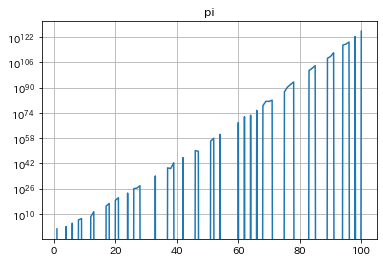

In [103]:
pi = re.sub('\D', '', pi)

def getMat(pi, n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = int(pi[i*n+j])
    return A

D = []
for n in range(100):
    A = getMat(pi, n+1)
    D.append(np.linalg.det(A))
#     print(D[n])
plt.plot(range(1,101), D)
plt.yscale('log')
plt.grid()
plt.title('pi')

x = np.argmax(D)
print(log10(D[x])/x)

### e

In [ ]:
e = '''2.

7182818284 5904523536 0287471352 6624977572 4709369995
9574966967 6277240766 3035354759 4571382178 5251664274
2746639193 2003059921 8174135966 2904357290 0334295260
5956307381 3232862794 3490763233 8298807531 9525101901
1573834187 9307021540 8914993488 4167509244 7614606680
8226480016 8477411853 7423454424 3710753907 7744992069
5517027618 3860626133 1384583000 7520449338 2656029760
6737113200 7093287091 2744374704 7230696977 2093101416
9283681902 5515108657 4637721112 5238978442 5056953696
7707854499 6996794686 4454905987 9316368892 3009879312
7736178215 4249992295 7635148220 8269895193 6680331825
2886939849 6465105820 9392398294 8879332036 2509443117
3012381970 6841614039 7019837679 3206832823 7646480429
5311802328 7825098194 5581530175 6717361332 0698112509
9618188159 3041690351 5988885193 4580727386 6738589422
8792284998 9208680582 5749279610 4841984443 6346324496
8487560233 6248270419 7862320900 2160990235 3043699418
4914631409 3431738143 6405462531 5209618369 0888707016
7683964243 7814059271 4563549061 3031072085 1038375051
0115747704 1718986106 8739696552 1267154688 9570350354

0212340784 9819334321 0681701210 0562788023 5193033224
7450158539 0473041995 7777093503 6604169973 2972508868
7696640355 5707162268 4471625607 9882651787 1341951246
6520103059 2123667719 4325278675 3985589448 9697096409
7545918569 5638023637 0162112047 7427228364 8961342251
6445078182 4423529486 3637214174 0238893441 2479635743
7026375529 4448337998 0161254922 7850925778 2562092622
6483262779 3338656648 1627725164 0191059004 9164499828
9315056604 7258027786 3186415519 5653244258 6982946959
3080191529 8721172556 3475463964 4791014590 4090586298
4967912874 0687050489 5858671747 9854667757 5732056812
8845920541 3340539220 0011378630 0945560688 1667400169
8420558040 3363795376 4520304024 3225661352 7836951177
8838638744 3966253224 9850654995 8862342818 9970773327
6171783928 0349465014 3455889707 1942586398 7727547109
6295374152 1115136835 0627526023 2648472870 3920764310
0595841166 1205452970 3023647254 9296669381 1513732275
3645098889 0313602057 2481765851 1806303644 2812314965
5070475102 5446501172 7211555194 8668508003 6853228183
1521960037 3562527944 9515828418 8294787610 8526398139

5599006737 6482922443 7528718462 4578036192 9819713991
4756448826 2603903381 4418232625 1509748279 8777996437
3089970388 8677822713 8360577297 8824125611 9071766394
6507063304 5279546618 5509666618 5664709711 3444740160
7046262156 8071748187 7844371436 9882185596 7095910259
6862002353 7185887485 6965220005 0311734392 0732113908
0329363447 9727355955 2773490717 8379342163 7012050054
5132638354 4000186323 9914907054 7977805669 7853358048
9669062951 1943247309 9587655236 8128590413 8324116072
2602998330 5353708761 3893963917 7957454016 1372236187
8936526053 8155841587 1869255386 0616477983 4025435128
4396129460 3529133259 4279490433 7299085731 5802909586
3138268329 1477116396 3370924003 1689458636 0606458459
2512699465 5724839186 5642097526 8508230754 4254599376
9170419777 8008536273 0941710163 4349076964 2372229435
2366125572 5088147792 2315197477 8060569672 5380171807
7636034624 5927877846 5850656050 7808442115 2969752189
0874019660 9066518035 1650179250 4619501366 5854366327
1254963990 8549144200 0145747608 1930221206 6024330096
4127048943 9039717719 5180699086 9986066365 8323227870

9376502260 1492910115 1717763594 4602023249 3002804018
6772391028 8097866605 6511832600 4368850881 7157238669
8422422010 2495055188 1694803221 0025154264 9463981287
3677658927 6881635983 1247788652 0141174110 9136011649
9507662907 7943646005 8519419985 6016264790 7615321038
7275571269 9251827568 7989302761 7611461625 4935649590
3798045838 1823233686 1201624373 6569846703 7858533052
7583333793 9907521660 6923805336 9887956513 7285593883
4998947074 1618155012 5397064648 1719467083 4819721448
8898790676 5037959036 6967249499 2545279033 7296361626
5897603949 8576741397 3594410237 4432970935 5477982629
6145914429 3645142861 7158587339 7467918975 7121195618
7385783644 7584484235 5558105002 5611492391 5188930994
6342841393 6080383091 6628188115 0371528496 7059741625
6282360921 6807515017 7725387402 5642534708 7908913729
1722828611 5159156837 2524163077 2254406337 8759310598
2676094420 3261924285 3170187817 7296023541 3060672136
0460003896 6109364709 5141417185 7770141806 0644363681
5464440053 3160877831 4317444081 1949422975 5993140118
8868331483 2802706553 8330046932 9011574414 7563139997

2217038046 1709289457 9096271662 2607407187 4997535921
2756084414 7378233032 7033016823 7193648002 1732857349
3594756433 4129943024 8502357322 1459784328 2641421684
8787216733 6701061509 4243456984 4018733128 1010794512
7223737886 1260581656 6805371439 6127888732 5273738903
9289050686 5324138062 7960259303 8772769778 3792868409
3253658807 3398845721 8746021005 3114833513 2385004782
7169376218 0049047955 9795929059 1655470505 7775143081
7511269898 5188408718 5640260353 0558373783 2422924185
6256442550 2267215598 0274012617 9719280471 3960068916
3828665277 0097527670 6977703643 9260224372 8418408832
5184877047 2638440379 5301669054 6593746161 9323840363
8931313643 2713768884 1026811219 8912752230 5625675625
4701725086 3497653672 8860596675 2740868627 4079128565
7699631378 9753034660 6166698042 1826772456 0530660773
8996242183 4085988207 1864682623 2150802882 8635974683
9654358856 6855037731 3129658797 5810501214 9162076567
6995065971 5344763470 3208532156 0367482860 8378656803
0730626576 3346977429 5634643716 7093971930 6087696349
5328846833 6130388294 3104080029 6873869117 0666661468

0001512114 3442256023 8744743252 5076938707 7775193299
9421372772 1125884360 8715834835 6269616619 8057252661
2206797540 6210620806 4988291845 4395301529 9820925030
0549825704 3390553570 1686531205 2649561485 7249257386
2069174036 9521353373 2531666345 4665885972 8665945113
6441370331 3936721185 6955395210 8458407244 3238355860
6310680696 4924851232 6326995146 0359603729 7253198368
4233639046 3213671011 6192821711 1502828016 0448805880
2382031981 4930963695 9673583274 2024988245 6849412738
6056649135 2526706046 2344505492 2758115170 9314921879
5927180019 4096886698 6837037302 2004753143 3818109270
8030017205 9355305207 0070607223 3999463990 5713115870
9963577735 9027196285 0611465148 3752620956 5346713290
0259943976 6311454590 2685898979 1158370934 1937044115
5121920117 1648805669 4593813118 3843765620 6278463104
9034629395 0029458341 1648241149 6975832601 1800731699
4373935069 6629571241 0273239138 7417549230 7186245454
3222039552 7352952402 4590380574 4502892246 8862853365
4221381572 2131163288 1120521464 8980518009 2024719391
7105553901 1394331668 1515828843 6876069611 0250517100

7392762385 5533862725 5353883096 0671644662 3709226468
0967125406 1869502143 1762116681 4009759528 1493907222
6011126811 5310838731 7617323235 2636058381 7315103459
5736538223 5349929358 2283685100 7810884634 3499835184
0445170427 0189381994 2434100905 7537625776 7571118090
0881641833 1920196262 3416288166 5213747173 2547772778
3488774366 5188287521 5668571950 6371936565 3903894493
6642176400 3121527870 2223664636 3575550356 5576948886
5495002708 5392361710 5502131147 4137441061 3444554419
2101336172 9962856948 9919336918 4729478580 7291560885
1039678195 9429833186 4807560836 7955149663 6448965592
9481878517 8403877332 6247051945 0504198477 4201418394
7731202815 8868457072 9054405751 0601285258 0565947030
4683634459 2652552137 0080687520 0959345360 7316226118
7281739280 7462309468 5367823106 0979215993 6001994623
7993434210 6878134973 4695924646 9752506246 9586169091
7857397659 5199392993 9955675427 1465491045 6860702099
0126068187 0498417807 9173924071 9459963230 6025470790
1774527513 1868099822 8473086076 6536866855 5164677029
1133682756 3107223346 7261137054 9079536583 4538637196

2358563126 1838715677 4118738527 7229225947 4337378569
5538456246 8010139057 2787101651 2966636764 4518724656
5373040244 3684140814 4887329578 4734849000 3019477888
0204603246 6084287535 1848364959 1950828883 2320652212
8104190448 0472479492 9134228495 1970022601 3104300624
1071797150 2793433263 4079959605 3144605323 0488528972
9176598760 1666781193 7932372453 8572096075 8227717848
3361613582 6128962261 1812945592 7462767137 7944875867
5365754486 1407611931 1259585126 5575973457 3015333642
6307679854 4338576171 5333462325 2705720053 0398828949
9034259566 2329757824 8873502925 9166825894 4568946559
9265845476 2694528780 5165017206 7478541788 7982276806
5366506419 1097343452 8878338621 7261562695 8265447820
5672987756 4263253215 9429441803 9943217000 0905426507
6309558846 5895171709 1476074371 3689331946 9090981904
5012903070 9956622662 0303182649 3657336984 1955577696
3787624918 8528656866 0760056602 5605445711 3372868402
0557441603 0837052312 2425872234 3885412317 9481388550
0756893811 2493538631 8635287083 7998456926 1998179452
3364087429 5911807474 5341955142 0351726184 2008455091

7084568236 8200897739 4558426792 1427347756 0879644279
2027083121 5015640634 1341617166 4480698154 8376449157
3900121217 0415478725 9199894382 5364950514 7713793991
4720521952 9079396137 6211072384 9429061635 7604596231
2535060685 3765142311 5349665683 7151166042 2079639446
6621163255 1577290709 7847315627 8277598788 1364919512
5748332879 3771571459 0910648416 4267830994 9723674420
1758622694 0215940792 4480541255 3604313179 9269673915
7542419296 6073123937 6354213923 0617876753 9587114361
0408940996 6089471418 3406983629 9367536262 1545247298
4642137528 9107988438 1306095552 6227208375 1862983706
6787224430 1957937937 8607210725 4277289071 7328548743
7435578196 6511716618 3308811291 2024520404 8682200072
3440350254 4820283425 4187884653 6025915064 4527165770
0044521097 7355858976 2265548494 1621714989 5323834216
0011406295 0718490427 7892585527 4303522139 6835679018
0764060421 3830730877 4460170842 6882722611 7718084266
4333651780 0021719034 4923426426 6292261456 0043373838
6833555534 3453004264 8184739892 1562708609 5650629340
4052649432 4426144566 5921291225 6488935696 5500915430

6426134252 6684725949 1431423939 8845432486 3274618428
4665598533 2312210466 2598901417 1210344608 4271616619
0012571958 7079321756 9698544013 3976220967 4945418540
7118446433 9469901626 9835160784 8924514058 9409463952
6780735457 9700307051 1636825194 8770118976 4002827648
4141605872 0618418529 7189154019 6882532893 0914966534
5753571427 3184820163 8464483249 9037886069 0080727093
2767312758 1966563941 1489617168 3298045513 9729506687
6047409154 2042842999 3541025829 1135022416 9076943166
8574242522 5090269390 3481485645 1303069925 1995904363
8402842926 7412573422 4477655841 7788617173 7265462085
4982944989 4678735092 9581652632 0722589923 6876845701
7823038096 5678831122 8930580914 0572610865 8848458731
0165815116 7533327674 8870148291 6741970151 2559782572
7074064318 0860142814 9024146780 4723275976 8426963393
5773542930 1867394397 1638861176 4209004068 6633988568
4168100387 2389214483 1760701166 8450388721 2364367043
3140911557 3328018297 7988736590 9166596124 0202177855
8854876176 1619893707 9438005666 3364884365 0891448055
7103976521 4696027662 5835990519 8704230017 9465536788'''

In [ ]:
e = re.sub('\D', '', e)

def getMat(x, n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = int(x[i*n+j])
    return A

D = []
for n in range(100):
    A = getMat(e, n+1)
    D.append(np.linalg.det(A))
#     print(D[n])
plt.plot(range(1,101), D)
plt.yscale('log')
plt.grid()
plt.title('e')

x = np.argmax(D)
print(log10(D[x])/x)

### sqrt(2)

In [ ]:
s2 = '''1.4142135623 7309504880 1688724209 6980785696 7187537694
      8073176679 7379907324 7846210703 8850387534 3276415727
      3501384623 0912297024 9248360558 5073721264 4121497099
      9358314132 2266592750 5592755799 9505011527 8206057147
      0109559971 6059702745 3459686201 4728517418 6408891986
      0955232923 0484308714 3214508397 6260362799 5251407989
      6872533965 4633180882 9640620615 2583523950 5474575028
      7759961729 8355752203 3753185701 1354374603 4084988471
      6038689997 0699004815 0305440277 9031645424 7823068492
      9369186215 8057846311 1596668713 0130156185 6898723723

      5288509264 8612494977 1542183342 0428568606 0146824720
      7714358548 7415565706 9677653720 2264854470 1585880162
      0758474922 6572260020 8558446652 1458398893 9443709265
      9180031138 8246468157 0826301005 9485870400 3186480342
      1948972782 9064104507 2636881313 7398552561 1732204024
      5091227700 2269411275 7362728049 5738108967 5040183698
      6836845072 5799364729 0607629969 4138047565 4823728997
      1803268024 7442062926 9124859052 1810044598 4215059112
      0249441341 7285314781 0580360337 1077309182 8693147101
      7111168391 6581726889 4197587165 8215212822 9518488472


      0896946338 6289156288 2765952635 1405422676 5323969461
      7511291602 4087155101 3515045538 1287560052 6314680171
      2740265396 9470240300 5174953188 6292563138 5188163478
      0015693691 7688185237 8684052287 8376293892 1430065586
      9568685964 5951555016 4472450983 6896036887 3231143894
      1557665104 0883914292 3381132060 5243362948 5317049915
      7717562285 4974143899 9188021762 4309652065 6421182731
      6726257539 5947172559 3463723863 2261482742 6222086711
      5583959992 6521176252 6989175409 8815934864 0083457085
      1814722318 1420407042 6509056532 3333984364 5786579679

      6519267292 3998753666 1721598257 8860263363 6178274959
      9421940377 7753681426 2177387991 9455139723 1274066898
      3299898953 8672882285 6378697749 6625199665 8352577619
      8939322845 3447356947 9496295216 8891485492 5389047558
      2883452609 6524096542 8893945386 4662574492 7556381964
      4103169798 3306185201 9379384940 0571563337 2054806854
      0575867999 6701213722 3947582142 6306585132 2174088323
      8294728761 7393647467 8374319600 0159218880 7347857617
      2522118674 9042497736 6929207311 0963697216 0893370866
      1156734585 3348332952 5467585164 4710757848 6024636008


      3444911481 8587655554 2864551233 1421992631 1332517970
      6084365597 0435285641 0087918500 7603610091 5946567067
      6883605571 7400767569 0509613671 9401324935 6052401859
      9910506210 8163597726 4313806054 6701029356 9971042425
      1057817495 3105725593 4984451126 9227803449 1350663756
      8747760283 1628296055 3242242695 7534529028 8387684464
      2917328277 0888318087 0253398523 3812274999 0812371892
      5407264753 6785030482 1591801886 1671089728 6922920119
      7599880703 8185433325 3646021108 2299279293 0728717807
      9988809917 6741774108 9830608003 2631181642 7988231171

      5436386966 1702999934 1616148786 8601804550 5553986913
      1151860103 8637532500 4558186044 8040750241 1951843056
      7453368361 3674597374 4239885532 8517930896 0373898915
      1731958741 3442881784 2125021916 9518755934 4438739618
      9314549999 9061075870 4909026088 3517636224 7497578588
      5836803745 7931157339 8020999866 2218694992 2595913276
      4236194105 9210032802 6149874566 5996888740 6795616739
      1859572888 6424734635 8588686449 6822386006 9833526427
      9905628316 5613913942 5576490620 6518602164 7263033362
      9750756978 7060660685 6498160092 7187092921 5313236828

    
      1356988937 0974165044 7459096053 7472796524 4770940992
      4123871061 4470543986 7436473384 7745481910 0872886222
      1495895295 9118789214 9179833981 0837882781 5306556231
      5810360648 6758730360 1450227320 8829351341 3872276841
      7667843690 5294286984 9083845574 4579409598 6260742499
      5491680285 3077398938 2960362133 5398753205 0919989360
      7513906444 4957684569 9347127636 4507163279 1547015977
      3354863893 9423257277 5400382602 7478567417 2580951416
      3071595978 4981800944 3560379390 9855901682 7215403458
      1581521004 9366629534 4882710729 2396602321 6382382666

      1262683050 2572781169 4510353793 7156882336 5932297823
      1929860646 7978986409 2085609558 1426143636 3100461559
      4332550474 4939759339 9912541953 2300932175 3044765339
      6470662761 1661753518 7546462096 7634558738 6164880198
      8484974792 6404506544 4896910040 7942118169 2579685756
      3784881498 9864168549 9491635761 4484047021 0339892153
      4237703723 3353115645 9443897036 5316672194 9049351882
      9058063074 0134686264 1672470110 6534634939 1640714628
      5567980177 9338144240 4526913706 6609777638 7848662380
      0339232437 0474115331 8725319060 1916599645 5381157888


      4138084332 3210533767 4618121780 1429609283 2411362752
      5408873729 0512940733 9479433061 9439569367 0207942951
      5878228349 3219316664 1113015495 9469837897 7674344435
      3933770995 7134988407 8908508158 9236607008 8658105470
      9497904657 2298888089 2461282816 0131337010 2908029099
      9745647849 5815456146 4871551639 0502419857 9061310934
      5878330620 0262207372 4716766854 5549990499 4085710809
      9257599288 9323661543 8271955005 7816251330 3815314657
      7907926868 5008069844 2847915242 4275441026 8057563215
      6532206188 5751225113 0639370253 6292716196 8251259192

      0252160587 0118959673 2244239267 4237344907 6464672737
      5347964598 8191498079 3171800242 3855453886 0383683108
      0077918246 6462754117 4442500187 2777951816 4383451463
      4612990207 6334301796 8554385631 6677235183 8933666704
      2222110939 1449302879 6381283988 9311731308 4300421255
      5018549850 6529455637 7660314612 5590910461 1384768282
      3595924772 2862904264 2736163264 5854433928 7726386034
      3149804896 3973633297 5488592568 1149296836 1267258985
      7383321643 6663487023 4773026101 0613050729 8611534129
      9488087744 7311122954 2652751653 6659117301 4236062652

    
      5869077198 2170370981 0464436047 7226739282 9874152593
      0695620638 4710827408 2184906737 2330587430 2970924289
      9481739244 0786937528 4401044399 0485208788 5191419354
      1512900681 7351703069 3869705900 4742515765 5248078447
      3621441050 1620084544 4122255956 2029847259 4035280190
      6798068098 3003964539 8568593045 8625260637 7974535599
      2774729906 4888745451 2424960763 7801086390 0191058092
      8747647207 5110923860 5950195432 2816020887 9621516233
      8521612875 2285180252 9287618325 7037172857 4067639449
      0982546442 2184654308 8066105802 0158472840 6712630254

      5937989065 0816857137 1656685941 3005331970 3659640337
      6674146104 9563765103 0836613489 3109478026 8129355733
      1890551970 5201845150 3996909866 3152512411 6111925940
      5528085649 8931958983 4562331983 6834948808 0617156243
      9112866312 7978483719 7895336901 5277600549 8055166350
      1978555711 0140555297 6338412750 4468604647 6631832661
      1651820675 0120476699 1098721910 4447440326 8943641595
      9427921994 4235537187 0429955924 0314091712 8481585438
      6600538571 3583639816 3094524075 5700932516 8243441682
      4083619792 7337282521 5462246961 5332170268 2995097908

    
      9034594858 8783494396 1620435842 2497397187 1139589273
      0509219705 4917176961 6004455808 9942787888 0369169432
      8945951472 2672292612 4850696173 1638094108 2186004528
      6102696547 5763043102 5602715231 3969482135 5198214097
      1654909731 9992834925 6740974903 9229712634 8693414574
      9331980417 1807611196 3902278664 0759224341 6776246623
      6238913110 2703433045 7636814112 8321326308 5822394562
      1959808661 2939996201 2341561763 1817431242 0089014983
      8485604808 7986460839 3596492366 5142968125 7731432291
      4568716827 6219961182 7826953157 4983802624 6517590541

      0397618128 7604216386 1345022132 6272775661 2441133610
      7751955577 4950865636 0673786650 6231856406 9912280187
      5741785494 6612532759 9769796059 7760590756 4891066610
      1583841720 2818530432 1190446577 5255427754 3798726054
      8817361982 6758168628 3295260789 9322266836 0283851351
      2281059318 5910286415 0815705631 9717315183 1362502435
      9041463212 2392176633 9826893682 5315053005 9891547029
      0953719326 6207341123 4947433678 8469020139 0497842852
      1634144292 1458955828 7847669394 6464267812 2190497856
      3635526336 8278051860 0986992489 3778600239 8769169807


      6566219438 9854437080 5946433362 3338105874 5816235475
      6001365924 3524265714 3083465545 7680023708 1467573252
      5470255074 7637471635 0678515991 7369379325 1032682760
      6286459146 1820472148 6370370771 9269268236 2333472037
      9245964691 8105261391 5308628029 1440965482 5638730927
      3042654466 2929045896 0637519187 1146934536 1973324789
      5727070315 3093090192 1199199993 6157650035 0398405406
      7425387927 5279227247 3356677060 7837911384 4889362613
      6765706026 3600315132 9520953952 0285489738 4486256134
      9244147086 0708660267 6349978793 4208758361 2194711699

      4223848482 5959143045 2810706260 1508969135 3030177200
      6271705440 2090669514 9152745977 1970594769 5474095210
      2878725578 5688002219 3717743558 1107939308 8338455864
      8277291008 6295545661 4130672123 0848740227 1210586863
      2338823741 3884428938 1554446471 0575565146 8435702946
      6350628938 7356986868 8376480326 5195284146 5351739530
      2736120137 4203009867 3983851432 1900436028 9826982935
      2939941412 9230580384 5650227072 1681516194 1011449826
      3013649008 7704839848 8386090653 3685990545 8389520318
      5648041493 2721423908 6516499943 1659207965 9535694307


      2311291162 9286797517 1566889054 3932203569 1293324570
      2080671944 4049730494 3981408227 8296027994 2454108316
      6675921424 8351827238 1720504103 9274288801 5562233807
      9614751243 3514731021 2845459448 9944499600 0752437519
      5701166834 1744749079 5882099517 8367680232 3651767497
      2301487457 7427259947 6096219843 2714835298 6111902728
      7358490521 7975908374 1974860267 0605374623 1530039375
      2123678677 5284869219 5857137554 2696848278 3631786110
      9933680143 9159059748 4285805451 6130230143 9790570161
      0889862777 9610750673 3326760486 5492925139 9781390535

      8822768937 3220494148 3940135560 3565604421 4017612060
      5131806891 9899626061 8483185340 1836237821 7266375804
      5524719626 6174925422 8528045714 4204857834 2113228008
      5287042054 8899234127 8554812367 6153770710 4254469868
      5219911228 3542663499 9712748366 0762462418 2073646661
      7128394748 4732804744 3040334410 7200428727 1275670279
      5675824292 6271945458 0530026664 8996507956 9778178621
      9421720052 3716536946 7704195111 9127046248 3605113028
      9046437751 1486948878 4961511884 1471910001 2558838366
      6067720841 1235153558 8112677895 7155859041 2576261601


      0675131535 8021242733 1871000635 8249545040 9957940725
      4798900316 8265123731 1905566829 1519430537 0848930786
      9197428290 4903860372 3116099283 4243171222 5099454715
      0192866648 7871079519 9518005463 3883844315 4817246354
      8024451803 0845273431 0006213710 3462573306 0012349737
      4435581809 6567846464 1533905146 5691932456 2353140577
      9193698988 4236471835 2537580525 7713311200 7971040683
      1549266540 2026046806 8183914378 2721476906 3242469517
      1286367384 4313983337 1176159418 6999346626 2345373452
      3567940124 1680922911 6360956372 1674528391 7099091466

      4850739205 1516056047 3787106154 7021699607 4656930979
      4426121469 2561593425 6494019122 9895147325 4471518126
      3258368897 2822628332 9524035970 0727863364 6045947071
      2417472946 8775705958 1573499628 4809956783 9255474240
      4489918870 7106967524 2507745201 2293608105 7414265323
      4724064162 1410333533 4055110452 1261750359 0284037454
      5918645047 2762434207 1770929793 5401021409 6464502836
      8341804075 8608100140 7216192477 1798098596 8111540446
      4437285689 5928683197 7797786934 6415984697 4513391774
      1537904877 8808300220 5833504674 6555323028 587325835'''

In [ ]:
s2 = re.sub('\D', '', s2)

def getMat(x, n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = int(x[i*n+j])
    return A

D = []
for n in range(100):
    A = getMat(s2, n+1)
    D.append(np.linalg.det(A))
#     print(D[n])
plt.plot(range(1,101), D)
plt.yscale('log')
plt.grid()
plt.title('sqrt 2')

x = np.argmax(D)
print(log10(D[x])/x)

### randint

1.3846103892267916


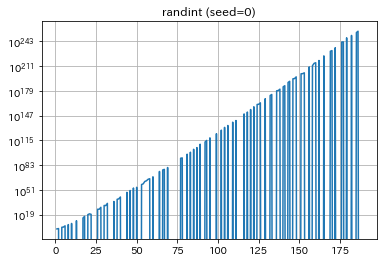

In [104]:
seed = 0
N = 188
np.random.seed(seed)
r = np.random.randint(10, size=N**2)

D = []
for n in range(N):
    A = getMat(r, n+1)
    D.append(np.linalg.det(A))
#     print(D[n])

plt.plot(range(1,N+1), D)
plt.yscale('log')
plt.grid()
plt.title(f'randint (seed={seed})')

x = np.argmax(D)
print(log10(D[x])/x)

In [105]:
from math import log10, log
x = np.argmax(D)
log10(D[x])/x

1.3846103892267916